# **REAL ESTATE ANALYSIS (Madrid)**

## I. PROJECT DESIGN

This case simulates a scenario in which we are a real estate company investing in major cities by purchasing properties to later rent them out as short-term tourist apartments.

The management team has decided to invest in Madrid and has assigned us the task of analyzing publicly available data from the market leader, Airbnb, in order to identify the types of properties with the greatest commercial potential for short-term rentals.

Although this case focuses on tourist rentals, the same approach can be extrapolated to other scenarios with a strong "location" component, such as franchise expansion, store openings and closures, etc.

### OBJECTIVE

Identify the property profile(s) that maximize commercial potential in the short-term rental market, as well as the main areas where they can be found.

### LEVERAGE POINTS

The investment team has indicated that the main levers impacting the profitability of this type of investment are:

* **Rental price**: The higher the nightly rate, the greater the profitability.
* **Occupancy**: Generally, the more days per year the property can be rented, the more profitable it is.
* **Purchase price**: The cheaper the property can be acquired, the higher the profitability.

### KPIs

The KPIs in this case are quite straightforward:

* **Occupancy** will be measured as the number of days per year the property can be rented.
* **Rental price** will be measured as the price per night in euros, according to Airbnb.
* **Property price** will be estimated by multiplying the number of square meters by the average price per m² in the area, applying a 25% discount on the official price due to our purchasing team's negotiation power.

### ENTITIES AND DATA

The relevant entities for our objective, for which we can access data, are:

* Properties
* Owners
* Districts

### SEED QUESTIONS

On rental price:

* What is the average price? What is the price range? What about by district? By neighborhood?

* What is the ranking of districts and neighborhoods by average rental price?

* What factors (besides location) influence the rental price?

* What is the relationship between property size and rental price?

* How does competition (number of available listings per neighborhood) affect rental price?

* How do prices vary by rental type (entire home, private room, shared room)?

On occupancy:

* What is the average occupancy? And by district? And by neighborhood?

* What is the probability distribution of occupancy levels in each district?

* What is the ranking of districts and neighborhoods by occupancy?

* What factors (besides location) influence occupancy?

* What is the relationship between property size and occupancy level?

* How does competition (number of available listings per neighborhood) affect occupancy?

On purchase price:

* What is the ranking of price per m² by district?

* What is the ranking of total property price (m² × average size) by district?

* What is the relationship between property price and rental price by district?

* What is the relationship between property price and occupancy by district?

## II. Initial File Analysis & Case Preparation

We will use real Airbnb data available at:  
🔗 [http://insideairbnb.com/get-the-data.html](http://insideairbnb.com/get-the-data.html)

We'll focus on the city of **Madrid**, although the site provides datasets for many other cities if you'd like to replicate the analysis elsewhere.

To prepare the case as it would be done in a real business environment, we will:

- Select only the tables that are relevant to our objective.
- Load all useful data into a **relational database** to practice working with that format, as it is standard in enterprise settings.

### SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### UNDERSTANDING THE FILES

The website provides a useful description of their datasets:

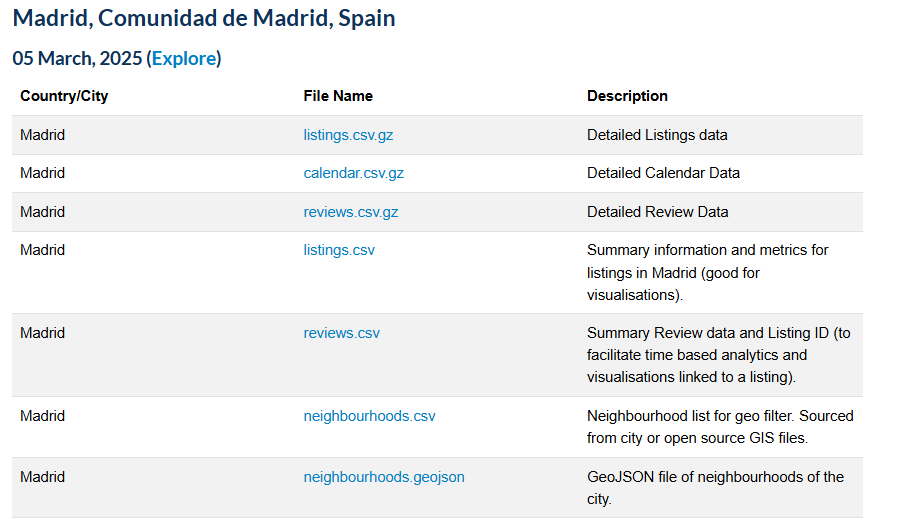

In [2]:
from IPython import display
display.Image("Data/airbnb_files.png")

We'll load each file one by one, understand its structure, and decide whether to use it.

#### `listings.csv` – Aggregated Listings

In [3]:
listings = pd.read_csv('Data/listings.csv')

In [4]:
listings.head()

id                                          name  host_id host_name  \
0  21853                          Bright and airy room    83531     Abdel   
1  30320                   Great Vacational Apartments   130907      Dana   
2  30959               Beautiful loft in Madrid Center   132883    Angela   
3  40916               Holiday Apartment Madrid Center   130907      Dana   
4  62423  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   303845    Arturo   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0              Latina      Cármenes  40.40381   -3.74130     Private room   
1              Centro           Sol  40.41476   -3.70418  Entire home/apt   
2              Centro   Embajadores  40.41259   -3.70105  Entire home/apt   
3              Centro   Universidad  40.42247   -3.70577  Entire home/apt   
4              Centro      Justicia  40.41884   -3.69655     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   29.0               4                 33  2018-07-15               0.26   
1    NaN               5                172  2022-09-26               0.96   
2    NaN               3                  8  2017-05-30               0.07   
3    NaN               5                 49  2021-12-11               0.28   
4   77.0               1                227  2025-02-20               2.73   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               233                      0   
1                               3                 0                      0   
2                               1                 0                      0   
3                               3                 0                      0   
4                               3               298                     46   

  license  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25288 non-null  int64  
 1   name                            25288 non-null  object 
 2   host_id                         25288 non-null  int64  
 3   host_name                       25269 non-null  object 
 4   neighbourhood_group             25288 non-null  object 
 5   neighbourhood                   25288 non-null  object 
 6   latitude                        25288 non-null  float64
 7   longitude                       25288 non-null  float64
 8   room_type                       25288 non-null  object 
 9   price                           19274 non-null  float64
 10  minimum_nights                  25288 non-null  int64  
 11  number_of_reviews               25288 non-null  int64  
 12  last_review                     

#### `listings.csv.gz` – Detailed Listings

In [6]:
listings_det = pd.read_csv('Data/listings.csv.gz',compression='gzip')

In [7]:
listings_det.head()

id                         listing_url       scrape_id last_scraped  \
0  21853  https://www.airbnb.com/rooms/21853  20250305023340   2025-03-11   
1  30320  https://www.airbnb.com/rooms/30320  20250305023340   2025-03-10   
2  30959  https://www.airbnb.com/rooms/30959  20250305023340   2025-03-10   
3  40916  https://www.airbnb.com/rooms/40916  20250305023340   2025-03-10   
4  62423  https://www.airbnb.com/rooms/62423  20250305023340   2025-03-12   

            source                                          name  \
0      city scrape                          Bright and airy room   
1  previous scrape                   Great Vacational Apartments   
2  previous scrape               Beautiful loft in Madrid Center   
3  previous scrape               Holiday Apartment Madrid Center   
4      city scrape  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   

                                         description  \
0  We have a quiet and sunny room with a good vie...   
1                                                NaN   
2  Beautiful Loft 60m2 size just in the historica...   
3                                                NaN   
4  INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...   

                               neighborhood_overview  \
0  We live in a leafy neighbourhood with plenty o...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/68483181/87bc...    83531  ...   
1  https://a0.muscache.com/pictures/336868/f67409...   130907  ...   
2  https://a0.muscache.com/pictures/78173471/835e...   132883  ...   
3  https://a0.muscache.com/pictures/336736/c3b486...   130907  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...   303845  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.82                   4.21                4.67   
1                        4.78                   4.90                4.69   
2                        4.63                   4.88                4.25   
3                        4.79                   4.88                4.55   
4                        4.85                   4.97                4.58   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              2   
1     NaN                f                              3   
2     NaN                f                              1   
3     NaN                f                              3   
4     NaN                f                              3   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           3   
2                                           1   
3                                           3   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            0   
2                                            0   
3                                            0   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.26  
1                                           0              0.96  
2                                           0              0.07  
3                                           0              0.28  
4                                           0              2.73  

[5 rows x 79 columns]

In [8]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25288 non-null  int64  
 1   listing_url                                   25288 non-null  object 
 2   scrape_id                                     25288 non-null  int64  
 3   last_scraped                                  25288 non-null  object 
 4   source                                        25288 non-null  object 
 5   name                                          25288 non-null  object 
 6   description                                   24375 non-null  object 
 7   neighborhood_overview                         11218 non-null  object 
 8   picture_url                                   25287 non-null  object 
 9   host_id                                       25288 non-null 

Findings: 

- Contains the same records as `listings.csv` but with **many more features**.
- Can be joined using the `id` field.

✅ **We will use this table as our main source of property data.**

#### `reviews.csv` – Aggregated Reviews

In [9]:
reviews = pd.read_csv('Data/reviews.csv')

In [10]:
reviews.head()

listing_id        date
0       21853  2014-10-10
1       21853  2014-10-13
2       21853  2014-11-09
3       21853  2014-11-11
4       21853  2014-11-16

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205947 entries, 0 to 1205946
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1205947 non-null  int64 
 1   date        1205947 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.4+ MB


#### `reviews.csv.gz` – Detailed Reviews

In [12]:
reviews_det = pd.read_csv('Data/reviews.csv.gz',compression = 'gzip')

In [13]:
reviews_det.head()

listing_id        id        date  reviewer_id reviewer_name  \
0       21853  21051116  2014-10-10      8506071    Pedro Abel   
1       21853  21268157  2014-10-13     19062863          Olga   
2       21853  22527396  2014-11-09      6099461          Hugh   
3       21853  22684525  2014-11-11     23357657         Sendy   
4       21853  22871843  2014-11-16      4072731          Nati   

                                            comments  
0  Mi experiencia en casa de Adel fue buena, aunq...  
1   Adel is a very warm person and thoughtful! He...  
2  Adel is an exceptionally welcoming host. I was...  
3  Adel fue muy amable, incluso el día de mi lleg...  
4  Abdel ha sido un magnífico anfitrión y la mejo...

In [14]:
reviews_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205947 entries, 0 to 1205946
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1205947 non-null  int64 
 1   id             1205947 non-null  int64 
 2   date           1205947 non-null  object
 3   reviewer_id    1205947 non-null  int64 
 4   reviewer_name  1205944 non-null  object
 5   comments       1205847 non-null  object
dtypes: int64(3), object(3)
memory usage: 55.2+ MB


Findings: 

- Same records; the detailed file has more columns.
- However, **review data is not essential** for our business goal.

❌ **Will not be used.**

#### `calendar.csv` – Availability & Pricing by Day

In [15]:
calendar = pd.read_csv('Data/calendar.csv.gz',compression = 'gzip')

C:\Users\Isaac\AppData\Local\Temp\ipykernel_4860\1891738466.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv('Data/calendar.csv.gz',compression = 'gzip')


In [16]:
calendar.head(30)

listing_id        date available   price adjusted_price  minimum_nights  \
0        21853  2025-03-11         f  $30.00            NaN             4.0   
1        21853  2025-03-12         f  $30.00            NaN             4.0   
2        21853  2025-03-13         f  $30.00            NaN             4.0   
3        21853  2025-03-14         f  $30.00            NaN             4.0   
4        21853  2025-03-15         f  $30.00            NaN             4.0   
5        21853  2025-03-16         f  $30.00            NaN             4.0   
6        21853  2025-03-17         f  $30.00            NaN             4.0   
7        21853  2025-03-18         f  $30.00            NaN             4.0   
8        21853  2025-03-19         f  $30.00            NaN             4.0   
9        21853  2025-03-20         f  $30.00            NaN             4.0   
10       21853  2025-03-21         f  $30.00            NaN             4.0   
11       21853  2025-03-22         f  $30.00            NaN             4.0   
12       21853  2025-03-23         f  $30.00            NaN             4.0   
13       21853  2025-03-24         f  $30.00            NaN             4.0   
14       21853  2025-03-25         f  $30.00            NaN             4.0   
15       21853  2025-03-26         f  $30.00            NaN             4.0   
16       21853  2025-03-27         f  $30.00            NaN             4.0   
17       21853  2025-03-28         f  $30.00            NaN             4.0   
18       21853  2025-03-29         f  $30.00            NaN             4.0   
19       21853  2025-03-30         f  $30.00            NaN             4.0   
20       21853  2025-03-31         f  $30.00            NaN             4.0   
21       21853  2025-04-01         f  $30.00            NaN             4.0   
22       21853  2025-04-02         f  $30.00            NaN             4.0   
23       21853  2025-04-03         f  $30.00            NaN             4.0   
24       21853  2025-04-04         f  $30.00            NaN             4.0   
25       21853  2025-04-05         f  $30.00            NaN             4.0   
26       21853  2025-04-06         f  $30.00            NaN             4.0   
27       21853  2025-04-07         f  $30.00            NaN             4.0   
28       21853  2025-04-08         f  $30.00            NaN             4.0   
29       21853  2025-04-09         f  $30.00            NaN             4.0   

    maximum_nights  
0             40.0  
1             40.0  
2             40.0  
3             40.0  
4             40.0  
5             40.0  
6             40.0  
7             40.0  
8             40.0  
9             40.0  
10            40.0  
11            40.0  
12            40.0  
13            40.0  
14            40.0  
15            40.0  
16            40.0  
17            40.0  
18            40.0  
19            40.0  
20            40.0  
21            40.0  
22            40.0  
23            40.0  
24            40.0  
25            40.0  
26            40.0  
27            40.0  
28            40.0  
29            40.0

In [17]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9236806 entries, 0 to 9236805
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 493.3+ MB


Findings:

- Shows future availability of listings (e.g., booked or available).
- **Not relevant** for profitability or acquisition decisions.

❌ **Will not be used.**

#### `neighbourhoods.csv` – Neighborhood Reference

In [18]:
neigh = pd.read_csv('Data/neighbourhoods.csv')

In [19]:
neigh.head(5)

neighbourhood_group neighbourhood
0          Arganzuela       Acacias
1          Arganzuela        Atocha
2          Arganzuela       Chopera
3          Arganzuela      Delicias
4          Arganzuela      Imperial

Findings:

- Simple lookup table.
- **Neighborhood info is already included** in other datasets.

❌ **Will not be used.**

#### `neighbourhoods.geojson` – Map Geometry

In [20]:
neigh_geo = pd.read_json('Data/neighbourhoods.geojson')

In [21]:
neigh_geo.head(5)

type                                           features
0  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Mult...
1  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Mult...
2  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Mult...
3  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Mult...
4  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Mult...

In [22]:
neigh_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      128 non-null    object
 1   features  128 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


Findings:

- Contains geospatial boundaries.
- **Geomap generation is out of scope** for this project.

❌ **Will not be used.**

#### ✅ FINAL SELECTION: Datasets to Use

We will use the following files:

- `listings.csv`
- `listings.csv.gz` *(preferred due to more detail)*

### CREATING A SQLITE DATABASE

We will load the selected tables into a database.

We’ll use a very simple solution: **SQLite**, which is self-contained, serverless, and requires no setup.

To create a database and load the tables using SQLite, we simply need to:

1. **Create a connection** to the SQLite database (as we've done before).
2. **Save the DataFrame** using `to_sql()` — if the target table doesn’t exist, it will be created automatically.

> 💡 **Note**: If the table already exists and you want to replace it, use the parameter:  
> `if_exists='replace'`

🔗 Creating the Connection  
We create the connection to the database.

In [23]:
import sqlalchemy as sa

con = sa.create_engine('sqlite:///Data/airbnb.db')

We create the tables and load the data into the database.

In [24]:
listings.to_sql('listings', con = con, if_exists = 'replace')
listings_det.to_sql('listings_det', con = con, if_exists = 'replace')

25288

## III. BUILDING THE ANALYTICAL DATAMART

The real business case begins here.

The data engineers or IT team have given us access to the **database containing all the raw information**.

As a best practice, we will first perform **individual data quality checks** on each table (especially important when working with large datasets, as joins could multiply errors or volume).

Once cleaned, we will join the tables to form the **analytical datamart**.

🔧 In this section, we will:

1. Access the database  
2. Import the data as Pandas DataFrames  
3. Perform data quality checks  
4. Build the analytical datamart  
5. Save it back to the database to avoid repeating the entire process

### DATA IMPORT

#### Internal Data

Create the database connection

In [25]:
#con = sa.create_engine('sqlite:///Data/airbnb.db')
'''--> we've done it before (see above)'''

"--> we've done it before (see above)"

If we don’t know the table names inside the database, the **SQLAlchemy documentation** suggests using the `inspect` function:

📖 https://docs.sqlalchemy.org/en/14/core/reflection.html#fine-grained-reflection-with-inspector

In [26]:
from sqlalchemy import inspect
insp = inspect(con)
tables = insp.get_table_names()
tables

['df', 'df_prepared', 'listings', 'listings_det']

Load the tables

In [27]:
#listings = pd.read_sql('listings', con)
#listings_det = pd.read_sql('listings_det', con)
'''--> we've done it before (see above)'''

"--> we've done it before (see above)"

💡 *Tip*:

Loading tables one-by-one is usually best. But if we had many tables, that wouldn’t be efficient.

We can **dynamically create DataFrames** using the table names stored in the `tables` list variable.

Use `exec()` inside a loop to automate the process.

In [28]:
# for table in tables:
#     exec(f'{table} = pd.read_sql(table, con)')

💡 *Tip*:

⚠️ **Note:** This trick only works if the tables were loaded dynamically (see previous tip).

We can also check the **dimensions of each table automatically** to ensure data was loaded properly.

Use `eval()` to interpret the table name as an object (rather than a string), so we can apply `.shape`.

In [29]:
# for each in tables:
#     print(each + ': ' + str(eval(each).shape))

#### External Data

Our Airbnb dataset does **not include purchase prices**, even though this is one of the main levers for profitability.

So we will source that information **externally**.

This page has exactly what we need:  
🔗 https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/

We can extract it using the **Instant Data Scraper Chrome extension**, and save it as `idealista_prices.csv` in our `Data` folder.

Steps:

1. Remove the first record (header row or aggregate).
2. Keep only the **price** and **district** columns.

In [30]:
price_m2 = pd.read_csv('Data/idealista_prices.csv') \
    .loc[1:,['table__cell 2','icon-elbow']] \
    .rename(columns = {'table__cell 2':'price_m2','icon-elbow':'district'})
price_m2

price_m2            district
1   5.669 €/m2          Arganzuela
2   4.373 €/m2             Barajas
3   3.231 €/m2         Carabanchel
4   7.198 €/m2              Centro
5   7.246 €/m2           Chamartín
6   8.099 €/m2            Chamberí
7   4.480 €/m2       Ciudad Lineal
8   4.829 €/m2          Fuencarral
9   4.950 €/m2           Hortaleza
10  5.691 €/m2             Moncloa
11  2.816 €/m2  Puente de Vallecas
12  7.286 €/m2              Retiro
13  9.687 €/m2           Salamanca
14  3.513 €/m2            San Blas
15  5.336 €/m2              Tetuán
16  2.998 €/m2               Usera
17  3.321 €/m2           Vicálvaro
18  3.231 €/m2   Villa de Vallecas

3. Clean the price column:
   - Remove units (e.g., €/m²)
   - Remove thousand separators (`.`)
   - Convert values to integer

In [31]:
price_m2['price_m2'] = price_m2.price_m2.str.split(expand = True)[0].str.replace('.','',regex=False).astype('int')
price_m2

price_m2            district
1       5669          Arganzuela
2       4373             Barajas
3       3231         Carabanchel
4       7198              Centro
5       7246           Chamartín
6       8099            Chamberí
7       4480       Ciudad Lineal
8       4829          Fuencarral
9       4950           Hortaleza
10      5691             Moncloa
11      2816  Puente de Vallecas
12      7286              Retiro
13      9687           Salamanca
14      3513            San Blas
15      5336              Tetuán
16      2998               Usera
17      3321           Vicálvaro
18      3231   Villa de Vallecas

### DATA QUALITY

#### `listings` Table

##### Overview

In [32]:
listings.head()

id                                          name  host_id host_name  \
0  21853                          Bright and airy room    83531     Abdel   
1  30320                   Great Vacational Apartments   130907      Dana   
2  30959               Beautiful loft in Madrid Center   132883    Angela   
3  40916               Holiday Apartment Madrid Center   130907      Dana   
4  62423  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   303845    Arturo   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0              Latina      Cármenes  40.40381   -3.74130     Private room   
1              Centro           Sol  40.41476   -3.70418  Entire home/apt   
2              Centro   Embajadores  40.41259   -3.70105  Entire home/apt   
3              Centro   Universidad  40.42247   -3.70577  Entire home/apt   
4              Centro      Justicia  40.41884   -3.69655     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   29.0               4                 33  2018-07-15               0.26   
1    NaN               5                172  2022-09-26               0.96   
2    NaN               3                  8  2017-05-30               0.07   
3    NaN               5                 49  2021-12-11               0.28   
4   77.0               1                227  2025-02-20               2.73   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               233                      0   
1                               3                 0                      0   
2                               1                 0                      0   
3                               3                 0                      0   
4                               3               298                     46   

  license  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [33]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25288 non-null  int64  
 1   name                            25288 non-null  object 
 2   host_id                         25288 non-null  int64  
 3   host_name                       25269 non-null  object 
 4   neighbourhood_group             25288 non-null  object 
 5   neighbourhood                   25288 non-null  object 
 6   latitude                        25288 non-null  float64
 7   longitude                       25288 non-null  float64
 8   room_type                       25288 non-null  object 
 9   price                           19274 non-null  float64
 10  minimum_nights                  25288 non-null  int64  
 11  number_of_reviews               25288 non-null  int64  
 12  last_review                     

##### Variables & Types

We’ll remove variables that are not directly useful for our analysis.

In [34]:
to_be_removed = ['host_name',
                 'number_of_reviews',
                 'last_review',
                 'reviews_per_month',
                 'number_of_reviews_ltm',
                 'license'
                ]

listings.drop(columns = to_be_removed, inplace=True)

listings

id                                          name  \
0                    21853                          Bright and airy room   
1                    30320                   Great Vacational Apartments   
2                    30959               Beautiful loft in Madrid Center   
3                    40916               Holiday Apartment Madrid Center   
4                    62423  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   
...                    ...                                           ...   
25283  1368985680426539467   Acogedor y nuevo ático con gran terraza (B)   
25284  1368986418960986344               Elegante apartamento en Madrid!   
25285  1368991577357063431                     Tropical apartment Madrid   
25286  1369034696848967860                Cama 1 de 04, no es hinchable.   
25287  1369048563458420692                Cama 2 de 04, No es hinchable.   

         host_id neighbourhood_group neighbourhood   latitude  longitude  \
0          83531              Latina      Cármenes  40.403810  -3.741300   
1         130907              Centro           Sol  40.414760  -3.704180   
2         132883              Centro   Embajadores  40.412590  -3.701050   
3         130907              Centro   Universidad  40.422470  -3.705770   
4         303845              Centro      Justicia  40.418840  -3.696550   
...          ...                 ...           ...        ...        ...   
25283   20803102           Hortaleza      Canillas  40.464110  -3.647130   
25284   52530675         Carabanchel    San Isidro  40.395983  -3.730953   
25285   52530675         Carabanchel    San Isidro  40.395621  -3.731533   
25286  543251626         Carabanchel      Abrantes  40.383990  -3.727290   
25287  543251626         Carabanchel      Abrantes  40.382994  -3.728070   

             room_type  price  minimum_nights  calculated_host_listings_count  \
0         Private room   29.0               4                               2   
1      Entire home/apt    NaN               5                               3   
2      Entire home/apt    NaN               3                               1   
3      Entire home/apt    NaN               5                               3   
4         Private room   77.0               1                               3   
...                ...    ...             ...                             ...   
25283  Entire home/apt  103.0               2                               3   
25284  Entire home/apt  100.0               5                              45   
25285  Entire home/apt   66.0               5                              45   
25286      Shared room   16.0               1                               4   
25287      Shared room   16.0               1                               4   

       availability_365  
0                   233  
1                     0  
2                     0  
3                     0  
4                   298  
...                 ...  
25283                 0  
25284               365  
25285                 3  
25286                71  
25287                 0  

[25288 rows x 12 columns]

We review the types of variable.

In [35]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25288 non-null  int64  
 1   name                            25288 non-null  object 
 2   host_id                         25288 non-null  int64  
 3   neighbourhood_group             25288 non-null  object 
 4   neighbourhood                   25288 non-null  object 
 5   latitude                        25288 non-null  float64
 6   longitude                       25288 non-null  float64
 7   room_type                       25288 non-null  object 
 8   price                           19274 non-null  float64
 9   minimum_nights                  25288 non-null  int64  
 10  calculated_host_listings_count  25288 non-null  int64  
 11  availability_365                25288 non-null  int64  
dtypes: float64(3), int64(5), object(

**Conclusion**: Convert `neighbourhood_group`, `neighbourhood`, and `room_type` to **categorical**.

In [36]:
for variable in ['neighbourhood_group','neighbourhood','room_type']:
    listings[variable] = listings[variable].astype('category')

We check.

In [37]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              25288 non-null  int64   
 1   name                            25288 non-null  object  
 2   host_id                         25288 non-null  int64   
 3   neighbourhood_group             25288 non-null  category
 4   neighbourhood                   25288 non-null  category
 5   latitude                        25288 non-null  float64 
 6   longitude                       25288 non-null  float64 
 7   room_type                       25288 non-null  category
 8   price                           19274 non-null  float64 
 9   minimum_nights                  25288 non-null  int64   
 10  calculated_host_listings_count  25288 non-null  int64   
 11  availability_365                25288 non-null  int64   
dtypes: category(3), fl

##### Missing Values Analysis

From the `.info()` output, we see that `price` has 6.014 missing values.

We will use the following strategy (imputing using the median by `neighbourhood_group`) because it is more robust to outliers and more general than using `neighbourhood` and the mean, which is useful in case some neighborhoods have few data points or extreme prices.

In [38]:
listings[listings.price.isna()]

id                                               name  \
1                    30320                        Great Vacational Apartments   
2                    30959                    Beautiful loft in Madrid Center   
3                    40916                    Holiday Apartment Madrid Center   
8                    82481                   Retiro Park, Stay at cosy studio   
11                  100411                                 Ático muy luminoso   
...                    ...                                                ...   
24786  1354556068197939987                     #StudioPlazaCastilla/wifi/A/C#   
24788  1354584586110919472                   # #StudioPlazaCastiilla/wifi/A/C   
24789  1354593678560108749                     # # #StudioPlazaCastilla/Wifi/   
24824  1355643402448451349                   apartamento con piscina y garaje   
24854  1355884220358251306  Habitación económica en el centro de Madrid (E...   

         host_id    neighbourhood_group  neighbourhood   latitude  longitude  \
1         130907                 Centro            Sol  40.414760  -3.704180   
2         132883                 Centro    Embajadores  40.412590  -3.701050   
3         130907                 Centro    Universidad  40.422470  -3.705770   
8         448981              Salamanca      Recoletos  40.423420  -3.681230   
11        527760  Fuencarral - El Pardo       Valverde  40.500440  -3.670320   
...          ...                    ...            ...        ...        ...   
24786  149217622                 Tetuán  Valdeacederas  40.466819  -3.705450   
24788  149217622                 Tetuán  Valdeacederas  40.467468  -3.706808   
24789  149217622                 Tetuán  Valdeacederas  40.465700  -3.705790   
24824  391810099             Villaverde     San Andrés  40.333596  -3.701003   
24854  574146644      Moncloa - Aravaca      Argüelles  40.423038  -3.713558   

             room_type  price  minimum_nights  calculated_host_listings_count  \
1      Entire home/apt    NaN               5                               3   
2      Entire home/apt    NaN               3                               1   
3      Entire home/apt    NaN               5                               3   
8      Entire home/apt    NaN               3                               1   
11     Entire home/apt    NaN               2                               1   
...                ...    ...             ...                             ...   
24786  Entire home/apt    NaN               1                               3   
24788  Entire home/apt    NaN               1                               3   
24789  Entire home/apt    NaN               1                               3   
24824  Entire home/apt    NaN               1                              85   
24854     Private room    NaN              15                              29   

       availability_365  
1                     0  
2                     0  
3                     0  
8                     0  
11                    0  
...                 ...  
24786               294  
24788               304  
24789               316  
24824               315  
24854                 0  

[6014 rows x 12 columns]

In [39]:
# Impute missing 'price' values using the median price of each neighbourhood_group

# Step 1: Replace missing values in 'price' with the median of the corresponding neighbourhood_group
listings['price'] = listings['price'].fillna(
    listings.groupby('neighbourhood_group', observed=True)['price'].transform('median')
)

# Step 2: Check for remaining missing values
print("Remaining missing values in 'price':", listings['price'].isnull().sum())

Remaining missing values in 'price': 0


##### Duplicates Analysis

We check if there are any duplicate records.

In [40]:
listings.duplicated().sum()

0

##### Categorical Variables Analysis

Analyze the **value counts** and **distributions**.

In [41]:
listings.neighbourhood_group.value_counts()

neighbourhood_group
Centro                   10499
Salamanca                 1684
Chamberí                  1643
Tetuán                    1575
Arganzuela                1378
Retiro                     965
Carabanchel                931
Chamartín                  852
Ciudad Lineal              828
Puente de Vallecas         810
Latina                     706
Moncloa - Aravaca          683
San Blas - Canillejas      557
Usera                      533
Hortaleza                  496
Fuencarral - El Pardo      331
Villaverde                 249
Moratalaz                  185
Barajas                    175
Villa de Vallecas          128
Vicálvaro                   80
Name: count, dtype: int64

In [42]:
listings.neighbourhood.value_counts()

neighbourhood
Embajadores       2801
Universidad       2240
Palacio           1818
Sol               1326
Justicia          1272
                  ... 
Cuatro Vientos       9
Fuentelareina        5
El Pardo             4
Horcajo              3
Atalaya              1
Name: count, Length: 128, dtype: int64

In [43]:
listings.room_type.value_counts()

room_type
Entire home/apt    16805
Private room        8281
Shared room          120
Hotel room            82
Name: count, dtype: int64

We notice that **hotels are included** in the listings. Since our company does **not plan to buy hotels**, we must **remove those records**.

In [44]:
listings = listings.loc[listings.room_type != 'Hotel room']

In [45]:
listings.room_type.value_counts()

room_type
Entire home/apt    16805
Private room        8281
Shared room          120
Hotel room             0
Name: count, dtype: int64

##### Numeric Variables Analysis

Focus on columns from `price` to `availability_365` (columns 8 to 11).

In [46]:
listings.iloc[:,8:12].describe().T

count        mean         std  min   25%  \
price                           25206.0  128.620408  379.614774  8.0  68.0   
minimum_nights                  25206.0    8.813774   31.229700  1.0   1.0   
calculated_host_listings_count  25206.0   36.308498   81.355959  1.0   1.0   
availability_365                25206.0  137.970801  132.863452  0.0   0.0   

                                  50%    75%      max  
price                           100.0  129.0  23124.0  
minimum_nights                    2.0    4.0   1125.0  
calculated_host_listings_count    3.0   19.0    341.0  
availability_365                 96.0  268.0    365.0

**Conclusions:**

- For `price`, review **min and max values**
- For `minimum_nights`, review **outliers**
- For `calculated_host_listings_count`, also review extreme values

**Check min and max values for price:**

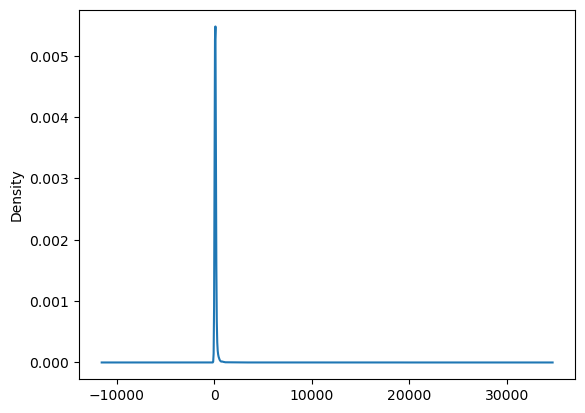

In [47]:
listings.price.plot.kde()
plt.show()

**Check high price values:**

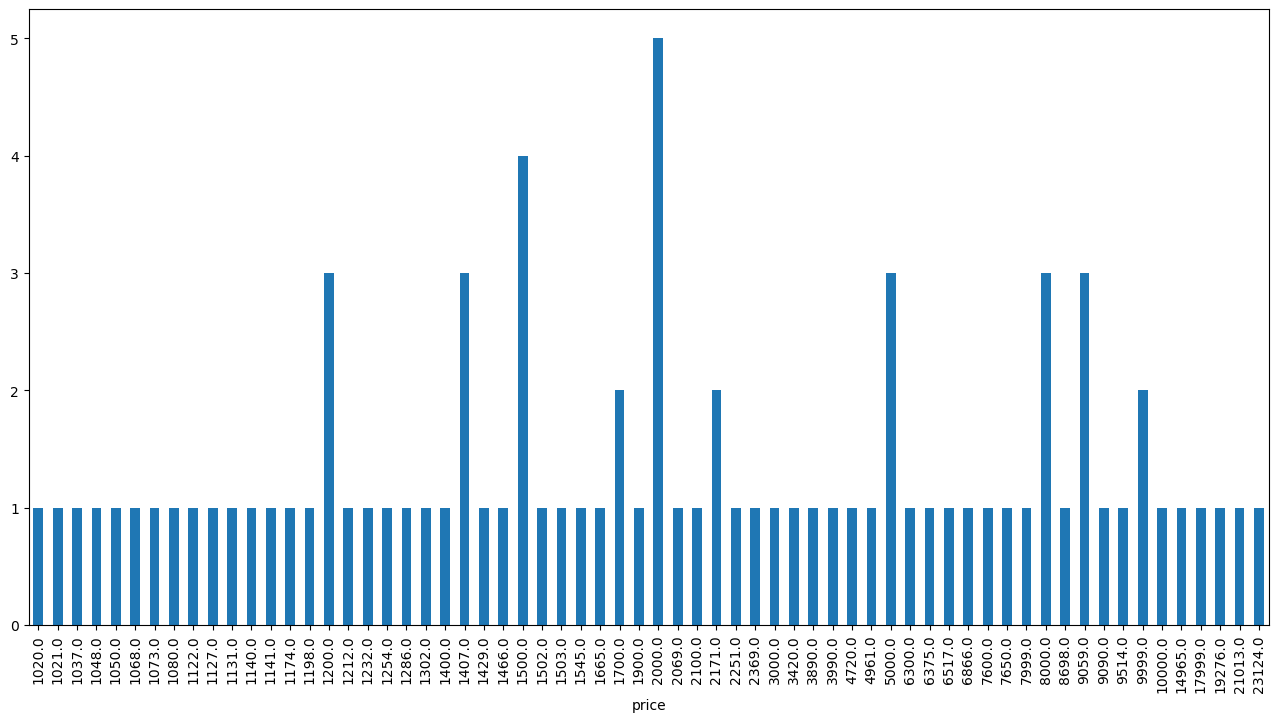

In [48]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price > 1000].value_counts().sort_index().plot.bar()
plt.xticks(size = 10)

plt.show()

In [49]:
listings[listings.price >= 8000]

id                                               name  \
355                2294171            Buhardilla en el Madrid de los Austrias   
2439              18816591                                   PUERTA DEL ANGEL   
4391              28299366                                    Cómo en tu casa   
7618              44174305                              Two-Bedroom Apartment   
7731              44305807                         Alquilo Apartamento Centro   
7948              46843887                                             Madrid   
8009              45249073  Captivating Apartment in Madrid near El Retiro...   
8348              48227429                                             Madrid   
8425              49742460               2 pièces 2 personnes Standard 165094   
10271   612030162376917657                        3 Pièces 6 Personnes 623384   
15041   942610520665563520                                       Piso en goya   
17049  1060272657994681485  Pierre&Vacances-Appartement 2 personnes-1 chambre   
17050  1060276046192183071  Pierre&Vacances-Appartement 4 personnes-1 chambre   
17051  1060276271097283207  Pierre&Vacances-Appartement 6 personnes-2 cham...   
17601  1087700981397177073     Stunning duplex | Terrace & BBQ | Free Parking   
21799  1250450623722567310                         Apart jardines San Vicente   
23837  1321793225986456129  Historic Center 3 bedroom apartment-1 min to m...   

         host_id neighbourhood_group     neighbourhood   latitude  longitude  \
355     11719928              Centro               Sol  40.417377  -3.706745   
2439     1408525              Latina  Puerta del Angel  40.409160  -3.732560   
4391   137289804              Latina            Aluche  40.392208  -3.760551   
7618    17011402              Centro       Universidad  40.423850  -3.709170   
7731   290977158          Arganzuela          Imperial  40.406730  -3.717570   
7948    17011402              Centro           Palacio  40.420050  -3.710680   
8009   362191258  Puente de Vallecas   Palomeras Bajas  40.391400  -3.664250   
8348    17011402              Centro           Palacio  40.421740  -3.708940   
8425   400123061              Tetuán       Castillejos  40.459370  -3.693970   
10271  400123061              Tetuán       Castillejos  40.459050  -3.695780   
15041  527436195              Retiro             Ibiza  40.421349  -3.675481   
17049  540456518              Tetuán       Castillejos  40.459108  -3.693862   
17050  540456518              Tetuán       Castillejos  40.457967  -3.695338   
17051  540456518              Tetuán       Castillejos  40.457818  -3.694022   
17601  225390196              Tetuán     Valdeacederas  40.467680  -3.708650   
21799  549699849   Moncloa - Aravaca         Argüelles  40.420472  -3.717716   
23837   47607603              Centro            Cortes  40.413740  -3.699030   

             room_type    price  minimum_nights  \
355    Entire home/apt   9514.0               4   
2439   Entire home/apt  19276.0               3   
4391      Private room   9090.0               3   
7618   Entire home/apt   8000.0               5   
7731   Entire home/apt   8698.0              40   
7948   Entire home/apt   8000.0               4   
8009   Entire home/apt  21013.0               1   
8348   Entire home/apt   8000.0               4   
8425   Entire home/apt   9999.0               1   
10271  Entire home/apt   9999.0               1   
15041  Entire home/apt  17999.0               1   
17049  Entire home/apt   9059.0               1   
17050  Entire home/apt   9059.0               1   
17051  Entire home/apt   9059.0               1   
17601  Entire home/apt  23124.0               3   
21799  Entire home/apt  10000.0               1   
23837  Entire home/apt  14965.0               3   

       calculated_host_listings_count  availability_365  
355                                 3                 0  
2439                               68                 0  
4391                           

**Conclusion:**

* Values above 8000, although they could be considered as potential nulls to remove or impute, will not be modified for now. In this case, their frequencies are not far from other values that could be valid, such as 5000, and considering that these properties are located in the heart of Madrid, it has been decided not to alter them for the time being.

**Check low price values:**

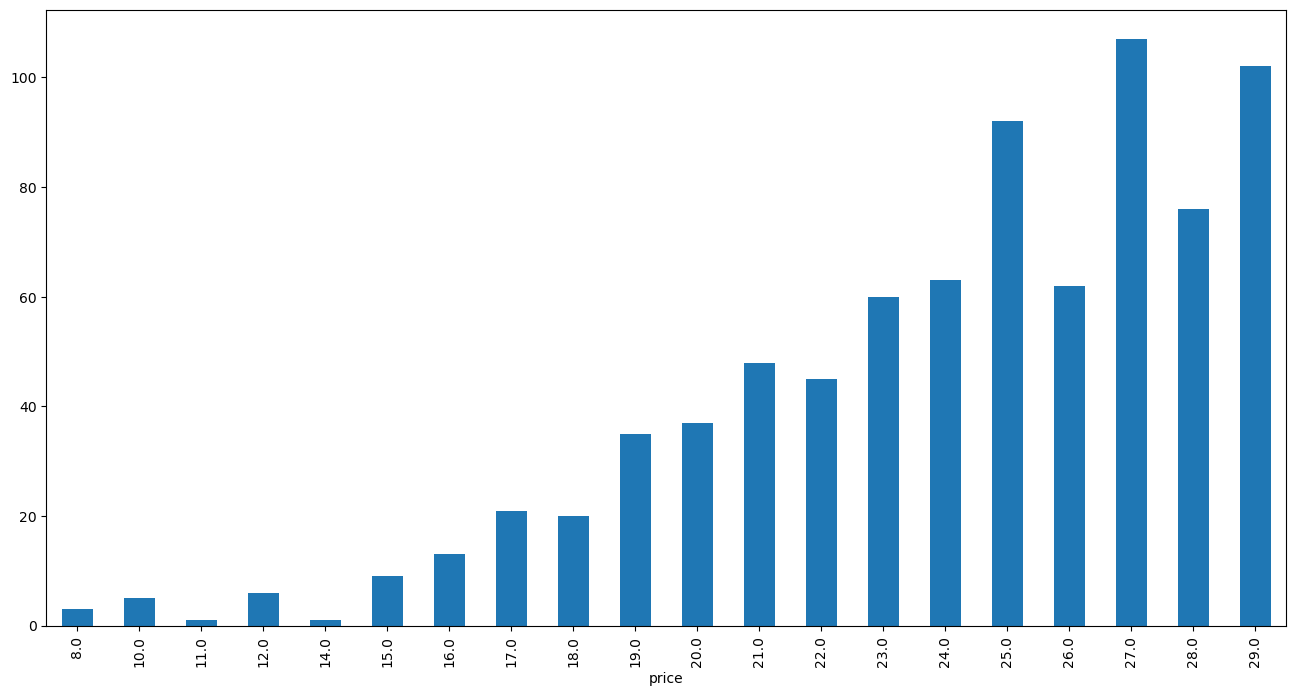

In [50]:
plt.figure(figsize=(16,8))
listings.price.loc[listings.price < 30].value_counts().sort_index().plot.bar()
plt.xticks(size = 10)

plt.show()

**Conclusion:**
    
* There is a peak around **€25/night**, and it seems unlikely to achieve profitability below that.

➡️ **We will exclude listings priced under €25/night.**

In [51]:
listings = listings.loc[listings.price > 24]
listings

id                                          name  \
0                    21853                          Bright and airy room   
1                    30320                   Great Vacational Apartments   
2                    30959               Beautiful loft in Madrid Center   
3                    40916               Holiday Apartment Madrid Center   
4                    62423  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   
...                    ...                                           ...   
25281  1368974630547284843                    Coqueto estudio en tetuan!   
25282  1368981094706864086                     Bonito estudio en Tetuán!   
25283  1368985680426539467   Acogedor y nuevo ático con gran terraza (B)   
25284  1368986418960986344               Elegante apartamento en Madrid!   
25285  1368991577357063431                     Tropical apartment Madrid   

        host_id neighbourhood_group  neighbourhood   latitude  longitude  \
0         83531              Latina       Cármenes  40.403810  -3.741300   
1        130907              Centro            Sol  40.414760  -3.704180   
2        132883              Centro    Embajadores  40.412590  -3.701050   
3        130907              Centro    Universidad  40.422470  -3.705770   
4        303845              Centro       Justicia  40.418840  -3.696550   
...         ...                 ...            ...        ...        ...   
25281  52530675              Tetuán  Valdeacederas  40.464951  -3.704578   
25282  52530675              Tetuán  Valdeacederas  40.468355  -3.706939   
25283  20803102           Hortaleza       Canillas  40.464110  -3.647130   
25284  52530675         Carabanchel     San Isidro  40.395983  -3.730953   
25285  52530675         Carabanchel     San Isidro  40.395621  -3.731533   

             room_type  price  minimum_nights  calculated_host_listings_count  \
0         Private room   29.0               4                               2   
1      Entire home/apt  112.0               5                               3   
2      Entire home/apt  112.0               3                               1   
3      Entire home/apt  112.0               5                               3   
4         Private room   77.0               1                               3   
...                ...    ...             ...                             ...   
25281  Entire home/apt   67.0               5                              45   
25282  Entire home/apt   63.0               5                              45   
25283  Entire home/apt  103.0               2                               3   
25284  Entire home/apt  100.0               5                              45   
25285  Entire home/apt   66.0               5                              45   

       availability_365  
0                   233  
1                     0  
2                     0  
3                     0  
4                   298  
...                 ...  
25281               355  
25282               360  
25283                 0  
25284               365  
25285                 3  

[24839 rows x 12 columns]

For `minimum_nights` and `calculated_host_listings_count`, similar analysis could be done — but it’s not core to our case, so we proceed.

#### `listings_det` Table

##### Overview

In [52]:
listings_det.head()

id                         listing_url       scrape_id last_scraped  \
0  21853  https://www.airbnb.com/rooms/21853  20250305023340   2025-03-11   
1  30320  https://www.airbnb.com/rooms/30320  20250305023340   2025-03-10   
2  30959  https://www.airbnb.com/rooms/30959  20250305023340   2025-03-10   
3  40916  https://www.airbnb.com/rooms/40916  20250305023340   2025-03-10   
4  62423  https://www.airbnb.com/rooms/62423  20250305023340   2025-03-12   

            source                                          name  \
0      city scrape                          Bright and airy room   
1  previous scrape                   Great Vacational Apartments   
2  previous scrape               Beautiful loft in Madrid Center   
3  previous scrape               Holiday Apartment Madrid Center   
4      city scrape  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   

                                         description  \
0  We have a quiet and sunny room with a good vie...   
1                                                NaN   
2  Beautiful Loft 60m2 size just in the historica...   
3                                                NaN   
4  INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...   

                               neighborhood_overview  \
0  We live in a leafy neighbourhood with plenty o...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/68483181/87bc...    83531  ...   
1  https://a0.muscache.com/pictures/336868/f67409...   130907  ...   
2  https://a0.muscache.com/pictures/78173471/835e...   132883  ...   
3  https://a0.muscache.com/pictures/336736/c3b486...   130907  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...   303845  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.82                   4.21                4.67   
1                        4.78                   4.90                4.69   
2                        4.63                   4.88                4.25   
3                        4.79                   4.88                4.55   
4                        4.85                   4.97                4.58   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              2   
1     NaN                f                              3   
2     NaN                f                              1   
3     NaN                f                              3   
4     NaN                f                              3   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           3   
2                                           1   
3                                           3   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            0   
2                                            0   
3                                            0   
4                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.26  
1                                           0              0.96  
2                                           0              0.07  
3                                           0              0.28  
4                                           0              2.73  

[5 rows x 79 columns]

In [53]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25288 non-null  int64  
 1   listing_url                                   25288 non-null  object 
 2   scrape_id                                     25288 non-null  int64  
 3   last_scraped                                  25288 non-null  object 
 4   source                                        25288 non-null  object 
 5   name                                          25288 non-null  object 
 6   description                                   24375 non-null  object 
 7   neighborhood_overview                         11218 non-null  object 
 8   picture_url                                   25287 non-null  object 
 9   host_id                                       25288 non-null 

##### Variables & Types

We’ll select only the variables that are **relevant to our business goals**.

In [54]:
to_be_included = ['id',
              'description',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location'
             ]

listings_det = listings_det.loc[:,to_be_included]

listings_det

id                                        description  \
0                    21853  We have a quiet and sunny room with a good vie...   
1                    30320                                                NaN   
2                    30959  Beautiful Loft 60m2 size just in the historica...   
3                    40916                                                NaN   
4                    62423  INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...   
...                    ...                                                ...   
25283  1368985680426539467  Cozy penthouse floor with large terrace, locat...   
25284  1368986418960986344  Have fun with the whole family at this stylish...   
25285  1368991577357063431  Get away from routine at this unique and relax...   
25286  1369034696848967860    Enjoy the comfort and tranquility of this home.   
25287  1369048563458420692   Enjoy the comfort and peace of mind of this home   

      host_is_superhost  accommodates  bathrooms  bedrooms  beds  \
0                     f             1        1.0       1.0   1.0   
1                     f             2        NaN       1.0   NaN   
2                     f             2        NaN       1.0   NaN   
3                     f             3        NaN       1.0   NaN   
4                     f             4        1.5       1.0   2.0   
...                 ...           ...        ...       ...   ...   
25283                 t             3        1.0       1.0   2.0   
25284                 f             5        1.0       2.0   3.0   
25285                 f             3        1.0       1.0   1.0   
25286                 f             1        1.0       1.0   4.0   
25287                 f             1        1.0       1.0   1.0   

       number_of_reviews  review_scores_rating  review_scores_communication  \
0                     33                  4.58                         4.82   
1                    172                  4.63                         4.78   
2                      8                  4.38                         4.63   
3                     49                  4.65                         4.79   
4                    227                  4.64                         4.85   
...                  ...                   ...                          ...   
25283                  0                   NaN                          NaN   
25284                  0                   NaN                          NaN   
25285                  0                   NaN                          NaN   
25286                  0                   NaN                          NaN   
25287                  0                   NaN                          NaN   

       review_scores_location  
0                        4.21  
1                        4.90  
2                        4.88  
3                        4.88  
4                        4.97  
...                       ...  
25283                     NaN  
25284                     NaN  
25285                     NaN  
25286                     NaN  
25287                     NaN  

[25288 rows x 11 columns]

We analyse the types

In [55]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           25288 non-null  int64  
 1   description                  24375 non-null  object 
 2   host_is_superhost            24496 non-null  object 
 3   accommodates                 25288 non-null  int64  
 4   bathrooms                    19270 non-null  float64
 5   bedrooms                     22737 non-null  float64
 6   beds                         19262 non-null  float64
 7   number_of_reviews            25288 non-null  int64  
 8   review_scores_rating         20091 non-null  float64
 9   review_scores_communication  20091 non-null  float64
 10  review_scores_location       20088 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.1+ MB


**Conclusion**: Convert `host_is_superhost` to **categorical**.

In [56]:
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].astype('category')
    
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           25288 non-null  int64   
 1   description                  24375 non-null  object  
 2   host_is_superhost            24496 non-null  category
 3   accommodates                 25288 non-null  int64   
 4   bathrooms                    19270 non-null  float64 
 5   bedrooms                     22737 non-null  float64 
 6   beds                         19262 non-null  float64 
 7   number_of_reviews            25288 non-null  int64   
 8   review_scores_rating         20091 non-null  float64 
 9   review_scores_communication  20091 non-null  float64 
 10  review_scores_location       20088 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 2.0+ MB


##### Missing Values Analysis

In [57]:
listings_det.isna().sum()

id                                0
description                     913
host_is_superhost               792
accommodates                      0
bathrooms                      6018
bedrooms                       2551
beds                           6026
number_of_reviews                 0
review_scores_rating           5197
review_scores_communication    5197
review_scores_location         5200
dtype: int64

**Findings:**

- `bathrooms` has quite a few missing values, but we will **keep it for now** in case we want to impute later.
- `description` can have missing values — it’s **not critical**, so we’ll keep it.
- `host_is_superhost` has some missing values and is **not a crucial variable**, so we’ll leave it as is.
- `beds` is potentially important, and we may be able to **impute it based on `accommodates`**.
- `bedrooms` is an **important variable**, so we will **attempt to impute nulls** using proxies such as `accommodates` or `beds`.

Let’s see if we can make a reasonable imputation of missing `beds` values based on the number of people the listing can accommodate.

In [58]:
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates    1     2     3     4    5    6   7    8   9   10  11  12  13  \
beds                                                                          
0.0             50   144    32    71   12   13   2    7   0   1   0   0   0   
1.0           2036  5562   359   644   18   31   1    0   1   2   0   0   0   
2.0             99   821  1280  3101  108  146   4    5   1   0   0   1   1   
3.0             24    63   192   985  474  762  16   34   1   1   1   1   0   
4.0             27    17    27   188  213  534  77  153   8   3   0   4   0   
5.0             11     3     2    17   41  134  68  103  22  26   2   4   0   
6.0             16     5     1     3    6   54  17   63   8  31   6  14   0   
7.0              0     1     0     1    0    4  15   15  19  18   4  13   1   
8.0              7     5     0     1    1    3   1   13   1  11   0   8   3   
9.0              0     0     0     0    0    0   1    4   4   4   0   3   0   
10.0             2     2     1     0    0    0   0    0   0   5   0   3   2   
11.0             0     0     0     0    0    0   0    0   0   1   0   0   0   
12.0             1     2     1     1    0    2   0    0   0   0   0   1   0   
13.0             0     0     0     0    0    0   0    0   0   0   0   2   1   
14.0             0     3     0     0    0    0   0    0   0   0   0   0   0   
15.0             0     0     0     0    0    0   0    0   0   0   0   0   0   
16.0             0     0     0     0    0    0   0    1   0   0   0   0   0   
18.0             0     0     0     0    0    0   0    0   0   0   0   0   0   
19.0             0     1     0     0    0    0   0    0   0   0   0   0   0   
20.0             1     0     0     0    0    0   0    0   0   0   0   0   0   
25.0             0     1     1     0    0    0   0    0   0   0   0   0   0   
40.0             0     0     0     0    0    0   0    0   0   0   0   0   0   

accommodates  14  15  16  
beds                      
0.0            0   0   0  
1.0            0   0   0  
2.0            0   0   0  
3.0            0   0   0  
4.0            0   0   0  
5.0            1   0   0  
6.0            2   0   0  
7.0            3   0   0  
8.0            2   0   2  
9.0            2   1   3  
10.0           1   4   5  
11.0           2   0   2  
12.0           0   0   2  
13.0           0   0   3  
14.0           1   0   4  
15.0           0   1   3  
16.0           0   0   3  
18.0           0   0   2  
19.0           0   0   0  
20.0           0   0   1  
25.0           0   0   0  
40.0           0   0   1

Looking at the vertical distribution of the matrix:

- 1–2 people → usually **1 bed**
- 3–4 people → usually **2 beds**
- 5–6 people → usually **3 beds**
- More than 6 → assign **4 beds**

Check Missing Values and Frequency Distribution

In [59]:
listings_det['beds'].value_counts(dropna = False)

beds
1.0     8654
NaN     6026
2.0     5567
3.0     2554
4.0     1251
5.0      434
0.0      332
6.0      226
7.0       94
8.0       58
10.0      25
9.0       22
12.0      10
14.0       8
13.0       6
11.0       5
15.0       4
16.0       4
20.0       2
18.0       2
25.0       2
19.0       1
40.0       1
Name: count, dtype: int64

We will now define a function to impute missing values in `beds` using the logic above.

In [60]:
def impute_nulls_beds(row): 
    # Define conditions based on the number of guests the listing accommodates
    conditions = [
        (row.accommodates <= 2), 
        (row.accommodates > 2) & (row.accommodates <= 4),
        (row.accommodates > 4) & (row.accommodates <= 6),
        (row.accommodates > 6)
    ]

    # Corresponding number of beds to assign
    results = [1, 2, 3, 4]
    
    # Return selected value based on the conditions
    return np.select(conditions, results, default=-999)

# Apply imputation to missing 'beds' values
listings_det.loc[listings_det.beds.isna(), 'beds'] = (
    listings_det.loc[listings_det.beds.isna()]
    .apply(impute_nulls_beds, axis=1)
    .astype('float64')
)

We check.

In [61]:
listings_det.beds.value_counts(dropna = False)

beds
1.0     12422
2.0      7097
3.0      3101
4.0      1432
5.0       434
0.0       332
6.0       226
7.0        94
8.0        58
10.0       25
9.0        22
12.0       10
14.0        8
13.0        6
11.0        5
16.0        4
15.0        4
20.0        2
18.0        2
25.0        2
19.0        1
40.0        1
Name: count, dtype: int64

Now we’ll explore whether we can impute missing values in the `bedrooms` column.

We start by comparing the number of bedrooms with the number of people the listing can accommodate.

In [62]:
pd.crosstab(listings_det.bedrooms, listings_det.accommodates)

accommodates    1     2     3     4    5     6    7    8   9   10  11  12  13  \
bedrooms                                                                        
0.0             67   803   166   321   15    15    4    3   0   2   0   0   0   
1.0           2332  6607  1519  3021  119   144   11   24   2   5   0   5   1   
2.0             98   214   597  2429  575  1023   37   70   6   8   2   3   0   
3.0             38    29    41   149  350   781  121  235  22  19   1  10   2   
4.0             29     9     2    10   19    37   63  148  28  46  12  14   1   
5.0             25     8     2     1    5     3    4    7  12  35   1  18   2   
6.0             16     7     0     1    0     2    0    2   4   2   1  10   0   
7.0              1     1     0     1    0     0    9    0   1   2   0   0   2   
8.0              3     3     0     0    0     0    0    0   0   0   0   0   0   
9.0              6     0     1     0    0     1    0    0   1   0   0   0   0   
10.0             5     1     0     0    0     0    0    0   0   0   0   0   0   
11.0             4     0     0     0    0     0    0    0   0   0   0   0   0   
12.0             2     0     0     0    0     0    0    0   0   0   0   0   0   
13.0             1     0     0     0    0     0    0    0   0   0   0   0   0   
15.0             0     0     0     0    0     0    0    0   0   0   0   0   0   
18.0             1     4     1     0    0     0    0    0   0   0   0   0   0   
25.0             0     0     0     0    0     1    0    0   0   0   0   0   0   

accommodates  14  15  16  
bedrooms                  
0.0            0   0   0  
1.0            0   0   3  
2.0            1   0   0  
3.0            2   0   0  
4.0            2   2   3  
5.0            2   2  11  
6.0            5   1   4  
7.0            2   0   9  
8.0            0   0   3  
9.0            0   0   0  
10.0           0   0   0  
11.0           0   0   0  
12.0           0   0   0  
13.0           0   0   0  
15.0           0   0   1  
18.0           0   0   0  
25.0           0   0   0

**Observation**:  
There doesn’t appear to be a strong or reliable pattern here.

So, let’s compare `bedrooms` with the number of **beds** instead.

In [63]:
pd.crosstab(listings_det.bedrooms, listings_det.beds, dropna=False)

beds      0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   ...  \
bedrooms                                                              ...   
0.0         35   821   466    40    28     4     1     0     0     0  ...   
1.0        218  8877  3971   481   148    30    21     7    21     1  ...   
2.0         53   245  2392  1696   540    90    33     9     3     1  ...   
3.0         19    45    80   849   506   201    67    21     9     2  ...   
4.0          5    25     3    18   170    83    66    32    11     6  ...   
5.0          1    26     1     3    26    26    11    11    12     8  ...   
6.0          1    11     1     0     4     0    21     3     1     2  ...   
7.0          0     2     2     0     0     0     2    11     1     0  ...   
8.0          0     4     2     0     0     0     0     0     0     1  ...   
9.0          0     6     0     1     1     0     0     0     0     1  ...   
10.0         0     4     0     0     0     0     0     0     0     0  ...   
11.0         0     4     0     0     0     0     0     0     0     0  ...   
12.0         0     2     0     0     0     0     0     0     0     0  ...   
13.0         0     1     0     0     0     0     0     0     0     0  ...   
15.0         0     0     0     0     0     0     0     0     0     0  ...   
18.0         0     4     0     0     0     0     0     0     0     0  ...   
25.0         0     0     0     0     0     0     1     0     0     0  ...   
NaN          0  2345   179    13     9     0     3     0     0     0  ...   

beds      12.0  13.0  14.0  15.0  16.0  18.0  19.0  20.0  25.0  40.0  
bedrooms                                                              
0.0          0     0     0     0     0     0     1     0     0     0  
1.0          9     0     0     0     1     0     0     1     0     1  
2.0          0     1     0     0     0     0     0     0     0     0  
3.0          0     0     0     0     0     0     0     0     0     0  
4.0          0     0     0     0     0     0     0     0     0     0  
5.0          0     3     1     0     0     0     0     0     0     0  
6.0          0     1     5     0     1     0     0     0     0     0  
7.0          1     1     2     2     1     2     0     0     0     0  
8.0          0     0     0     0     1     0     0     0     0     0  
9.0          0     0     0     0     0     0     0     0     0     0  
10.0         0     0     0     0     0     0     0     0     0     0  
11.0         0     0     0     0     0     0     0     0     0     0  
12.0         0     0     0     0     0     0     0     0     0     0  
13.0         0     0     0     0     0     0     0     0     0     0  
15.0         0     0     0     1     0     0     0     0     0     0  
18.0         0     0     0     0     0     0     0     0     2     0  
25.0         0     0     0     0     0     0     0     0     0     0  
NaN          0     0     0     1     0     0     0     1     0     0  

[18 rows x 22 columns]

🧠 Bedroom Imputation Strategy Based on Beds

During our analysis, we noticed that many listings with `bedrooms = 0` or `bedrooms = NaN` had valid `beds > 0`. This pattern was especially common in `'Entire home/apt'` listings, which are likely to be studios or lofts (you can verify this later in the combined dataframe `df`).  
To address this inconsistency, we developed a consistent imputation rule.


✅ **Finding**  
The relationship between number of beds and number of bedrooms seems much more consistent and shows a clear pattern. Based on the observed distribution, we can derive the following logic:

- 0, 1, or 2 beds → likely corresponds to **1 bedroom**
- 3 or 4 beds → likely corresponds to **2 bedrooms**
- 5 or 6 beds → likely corresponds to **3 bedrooms**
- More than 6 beds → assign **4 bedrooms**

🔧 Updating the Function for Bedroom Imputation

We'll update the function to impute not only missing `bedrooms` values, but also those set to `0`, based on `beds`.

First, we review the value counts for `bedrooms`, then apply the updated function:

In [64]:
listings_det.bedrooms.value_counts(dropna = False)

bedrooms
1.0     13793
2.0      5063
NaN      2551
3.0      1800
0.0      1396
4.0       425
5.0       138
6.0        55
7.0        28
9.0         9
8.0         9
10.0        6
18.0        6
11.0        4
12.0        2
13.0        1
15.0        1
25.0        1
Name: count, dtype: int64

We run the updated function.

In [65]:
def impute_bedrooms(row):
    # Apply only if bedrooms is NaN or zero and beds is not null
    if (pd.isna(row.bedrooms) or row.bedrooms == 0) and not pd.isna(row.beds):
        if row.beds <= 2:
            return 1
        elif row.beds <= 4:
            return 2
        elif row.beds <= 6:
            return 3
        else:
            return 4
    return row.bedrooms  # Keep original if not imputable

# Apply the function row-wise
listings_det['bedrooms'] = listings_det.apply(impute_bedrooms, axis=1).astype('float64')

We check.

In [66]:
listings_det.bedrooms.value_counts(dropna = False)

bedrooms
1.0     17639
2.0      5153
3.0      1808
4.0       428
5.0       138
6.0        55
7.0        28
8.0         9
9.0         9
10.0        6
18.0        6
11.0        4
12.0        2
13.0        1
15.0        1
25.0        1
Name: count, dtype: int64

In [67]:
listings_det

id                                        description  \
0                    21853  We have a quiet and sunny room with a good vie...   
1                    30320                                                NaN   
2                    30959  Beautiful Loft 60m2 size just in the historica...   
3                    40916                                                NaN   
4                    62423  INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...   
...                    ...                                                ...   
25283  1368985680426539467  Cozy penthouse floor with large terrace, locat...   
25284  1368986418960986344  Have fun with the whole family at this stylish...   
25285  1368991577357063431  Get away from routine at this unique and relax...   
25286  1369034696848967860    Enjoy the comfort and tranquility of this home.   
25287  1369048563458420692   Enjoy the comfort and peace of mind of this home   

      host_is_superhost  accommodates  bathrooms  bedrooms  beds  \
0                     f             1        1.0       1.0   1.0   
1                     f             2        NaN       1.0   1.0   
2                     f             2        NaN       1.0   1.0   
3                     f             3        NaN       1.0   2.0   
4                     f             4        1.5       1.0   2.0   
...                 ...           ...        ...       ...   ...   
25283                 t             3        1.0       1.0   2.0   
25284                 f             5        1.0       2.0   3.0   
25285                 f             3        1.0       1.0   1.0   
25286                 f             1        1.0       1.0   4.0   
25287                 f             1        1.0       1.0   1.0   

       number_of_reviews  review_scores_rating  review_scores_communication  \
0                     33                  4.58                         4.82   
1                    172                  4.63                         4.78   
2                      8                  4.38                         4.63   
3                     49                  4.65                         4.79   
4                    227                  4.64                         4.85   
...                  ...                   ...                          ...   
25283                  0                   NaN                          NaN   
25284                  0                   NaN                          NaN   
25285                  0                   NaN                          NaN   
25286                  0                   NaN                          NaN   
25287                  0                   NaN                          NaN   

       review_scores_location  
0                        4.21  
1                        4.90  
2                        4.88  
3                        4.88  
4                        4.97  
...                       ...  
25283                     NaN  
25284                     NaN  
25285                     NaN  
25286                     NaN  
25287                     NaN  

[25288 rows x 11 columns]

##### Duplicates Analysis

We check if there are any duplicate entries.

In [68]:
listings_det.duplicated().sum()

0

In [69]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           25288 non-null  int64   
 1   description                  24375 non-null  object  
 2   host_is_superhost            24496 non-null  category
 3   accommodates                 25288 non-null  int64   
 4   bathrooms                    19270 non-null  float64 
 5   bedrooms                     25288 non-null  float64 
 6   beds                         25288 non-null  float64 
 7   number_of_reviews            25288 non-null  int64   
 8   review_scores_rating         20091 non-null  float64 
 9   review_scores_communication  20091 non-null  float64 
 10  review_scores_location       20088 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 2.0+ MB


##### Categorical Variables Analysis

Analyze the **value counts** and **distributions**.

In [70]:
listings_det.host_is_superhost.value_counts()

host_is_superhost
f    18556
t     5940
Name: count, dtype: int64

##### Numeric Variables Analysis

In [71]:
listings_det.describe(include = 'number').T

count          mean           std      min  \
id                           25288.0  6.439293e+17  5.357949e+17  21853.0   
accommodates                 25288.0  3.159206e+00  1.905684e+00      1.0   
bathrooms                    19270.0  1.286897e+00  6.288570e-01      0.0   
bedrooms                     25288.0  1.452823e+00  8.990163e-01      1.0   
beds                         25288.0  1.875079e+00  1.341637e+00      0.0   
number_of_reviews            25288.0  4.768851e+01  8.927263e+01      0.0   
review_scores_rating         20091.0  4.645258e+00  4.893523e-01      1.0   
review_scores_communication  20091.0  4.747868e+00  4.746712e-01      1.0   
review_scores_location       20088.0  4.747256e+00  3.831829e-01      1.0   

                                     25%           50%           75%  \
id                           36760947.50  8.115619e+17  1.142574e+18   
accommodates                        2.00  2.000000e+00  4.000000e+00   
bathrooms                           1.00  1.000000e+00  1.500000e+00   
bedrooms                            1.00  1.000000e+00  2.000000e+00   
beds                                1.00  1.000000e+00  2.000000e+00   
number_of_reviews                   1.00  1.000000e+01  5.300000e+01   
review_scores_rating                4.55  4.760000e+00  4.930000e+00   
review_scores_communication         4.72  4.890000e+00  5.000000e+00   
review_scores_location              4.67  4.870000e+00  4.980000e+00   

                                      max  
id                           1.369179e+18  
accommodates                 1.600000e+01  
bathrooms                    1.500000e+01  
bedrooms                     2.500000e+01  
beds                         4.000000e+01  
number_of_reviews            1.080000e+03  
review_scores_rating         5.000000e+00  
review_scores_communication  5.000000e+00  
review_scores_location       5.000000e+00

➡️ **No anomalies detected.**

At this point, we have identified and addressed the main data quality issues, so we can proceed to build the **analytical datamart** by integrating our tables.

### ANALYTICAL DATAMART

We are working with two main tables:

- `listings`  
- `listings_det`

We know that both share the `id` field, so we can join them on that key.

The **main table is `listings`**, since `listings_det` simply provides additional attributes.

Therefore, the `listings` table will act as the **base table** in the integration process.

We also have a third table containing **price per square meter**. This table conceptually joins with `listings` through the **district** (`neighbourhood_group`).

But let's go step by step, and start by merging the two main tables.

In [72]:
listings.shape

(24839, 12)

In [73]:
listings_det.shape

(25288, 11)

🔗 Expected Join Logic

Since `listings` is the primary table, the **final result** should:

- Have the **same number of rows** as `listings`
- Contain the columns from **both tables**, except one `id` column (to avoid duplication)

📐 If done correctly, the final datamart will have **24,839 rows** and **22 columns**.

In [74]:
df = pd.merge(left = listings, right = listings_det, how = 'left', on = 'id')
df

id                                          name  \
0                    21853                          Bright and airy room   
1                    30320                   Great Vacational Apartments   
2                    30959               Beautiful loft in Madrid Center   
3                    40916               Holiday Apartment Madrid Center   
4                    62423  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   
...                    ...                                           ...   
24834  1368974630547284843                    Coqueto estudio en tetuan!   
24835  1368981094706864086                     Bonito estudio en Tetuán!   
24836  1368985680426539467   Acogedor y nuevo ático con gran terraza (B)   
24837  1368986418960986344               Elegante apartamento en Madrid!   
24838  1368991577357063431                     Tropical apartment Madrid   

        host_id neighbourhood_group  neighbourhood   latitude  longitude  \
0         83531              Latina       Cármenes  40.403810  -3.741300   
1        130907              Centro            Sol  40.414760  -3.704180   
2        132883              Centro    Embajadores  40.412590  -3.701050   
3        130907              Centro    Universidad  40.422470  -3.705770   
4        303845              Centro       Justicia  40.418840  -3.696550   
...         ...                 ...            ...        ...        ...   
24834  52530675              Tetuán  Valdeacederas  40.464951  -3.704578   
24835  52530675              Tetuán  Valdeacederas  40.468355  -3.706939   
24836  20803102           Hortaleza       Canillas  40.464110  -3.647130   
24837  52530675         Carabanchel     San Isidro  40.395983  -3.730953   
24838  52530675         Carabanchel     San Isidro  40.395621  -3.731533   

             room_type  price  minimum_nights  ...  \
0         Private room   29.0               4  ...   
1      Entire home/apt  112.0               5  ...   
2      Entire home/apt  112.0               3  ...   
3      Entire home/apt  112.0               5  ...   
4         Private room   77.0               1  ...   
...                ...    ...             ...  ...   
24834  Entire home/apt   67.0               5  ...   
24835  Entire home/apt   63.0               5  ...   
24836  Entire home/apt  103.0               2  ...   
24837  Entire home/apt  100.0               5  ...   
24838  Entire home/apt   66.0               5  ...   

                                             description  host_is_superhost  \
0      We have a quiet and sunny room with a good vie...                  f   
1                                                    NaN                  f   
2      Beautiful Loft 60m2 size just in the historica...                  f   
3                                                    NaN                  f   
4      INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...                  f   
...                                                  ...                ...   
24834  Disconnect from the routine in this charming a...                  f   
24835  Get away from routine at this unique and relax...                  f   
24836  Cozy penthouse floor with large terrace, locat...                  t   
24837  Have fun with the whole family at this stylish...                  f   
24838  Get away from routine at this unique and relax...                  f   

      accommodates bathrooms  bedrooms  beds  number_of_reviews  \
0                1       1.0       1.0   1.0                 33   
1                2       NaN       1.0   1.0                172   
2                2       NaN       1.0   1.0                  8   
3                3       NaN       1.0   2.0                 49   
4                4       1.5       1.0   2.0                227   
...            ...       ...       ...   ...                ...   
24834            2       1.0       1.0   1.0                  0   
24835            2       1.0       1.0   1.0                  0 

🧩 Integrating External Price Data

Now let's see how to incorporate the external **price per square meter** data.

The first step is to analyze the values in the **district variable** in both tables, as they need to match for the join to work correctly.

In `df`, the variable is categorical, so to extract the unique levels we need to use:

In [75]:
districts1 = pd.Series(df.neighbourhood_group.unique().categories).sort_values()
districts1

0                Arganzuela
1                   Barajas
2               Carabanchel
3                    Centro
4                 Chamartín
5                  Chamberí
6             Ciudad Lineal
7     Fuencarral - El Pardo
8                 Hortaleza
9                    Latina
10        Moncloa - Aravaca
11                Moratalaz
12       Puente de Vallecas
13                   Retiro
14                Salamanca
15    San Blas - Canillejas
16                   Tetuán
17                    Usera
18                Vicálvaro
19        Villa de Vallecas
20               Villaverde
dtype: object

In [76]:
districts2 = price_m2.district
districts2

1             Arganzuela
2                Barajas
3            Carabanchel
4                 Centro
5              Chamartín
6               Chamberí
7          Ciudad Lineal
8             Fuencarral
9              Hortaleza
10               Moncloa
11    Puente de Vallecas
12                Retiro
13             Salamanca
14              San Blas
15                Tetuán
16                 Usera
17             Vicálvaro
18     Villa de Vallecas
Name: district, dtype: object

When comparing the district values in the two datasets (`df` and `price_m2`), we noticed:

- Three districts in `df` are **not present** in the price dataset:  
  - `Latina`  
  - `Moratalaz`  
  - `Villaverde`

To allow for a successful join, we will **impute realistic prices per m²** for these missing districts based on neighboring and socioeconomically similar areas.

| **District** | **Imputed €/m²** | **Reasoning** |
|--------------|------------------|---------------|
| `Latina`     | 3,800 €/m²       | Between `Carabanchel` (3,231 €/m²) and `Usera` (2,998 €/m²), but includes more valuable zones like `Puerta del Ángel`. Slightly higher price than Carabanchel to reflect that blend. |
| `Moratalaz`  | 3,900 €/m²       | Comparable to `Ciudad Lineal` (4,480 €/m²) and `San Blas` (3,513 €/m²). Interpolated between both. |
| `Villaverde` | 2,700 €/m²       | Slightly below `Puente de Vallecas` (2,816 €/m²), reflects its peripheral and lower-demand profile. |

We also identified **three district names that differ slightly** and must be aligned for a successful join:

- `Fuencarral` → `Fuencarral - El Pardo`  
- `Moncloa` → `Moncloa - Aravaca`  
- `San Blas` → `San Blas - Canillejas`

We will now update the dataset accordingly.

In [77]:
# Impute missing districts with realistic €/m² values
price_m2 = pd.concat([
    price_m2,
    pd.DataFrame({
        'district': ['Latina', 'Moratalaz', 'Villaverde'],
        'price_m2': [3800, 3900, 2700]
    })
], ignore_index=True)

# Harmonize district names for a successful join
price_m2.district = price_m2.district.map({
    'Fuencarral': 'Fuencarral - El Pardo',
    'Moncloa': 'Moncloa - Aravaca',
    'San Blas': 'San Blas - Canillejas'
}).fillna(price_m2.district)

# Sort alphabetically by district
price_m2 = price_m2.sort_values('district').reset_index(drop=True)

price_m2

price_m2               district
0       5669             Arganzuela
1       4373                Barajas
2       3231            Carabanchel
3       7198                 Centro
4       7246              Chamartín
5       8099               Chamberí
6       4480          Ciudad Lineal
7       4829  Fuencarral - El Pardo
8       4950              Hortaleza
9       3800                 Latina
10      5691      Moncloa - Aravaca
11      3900              Moratalaz
12      2816     Puente de Vallecas
13      7286                 Retiro
14      9687              Salamanca
15      3513  San Blas - Canillejas
16      5336                 Tetuán
17      2998                  Usera
18      3321              Vicálvaro
19      3231      Villa de Vallecas
20      2700             Villaverde

Now we can finally merge them.

`df` leads the join. 

In [78]:
df = pd.merge(left = df, right = price_m2, how = 'left', left_on='neighbourhood_group', right_on='district')
df

id                                          name  \
0                    21853                          Bright and airy room   
1                    30320                   Great Vacational Apartments   
2                    30959               Beautiful loft in Madrid Center   
3                    40916               Holiday Apartment Madrid Center   
4                    62423  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   
...                    ...                                           ...   
24834  1368974630547284843                    Coqueto estudio en tetuan!   
24835  1368981094706864086                     Bonito estudio en Tetuán!   
24836  1368985680426539467   Acogedor y nuevo ático con gran terraza (B)   
24837  1368986418960986344               Elegante apartamento en Madrid!   
24838  1368991577357063431                     Tropical apartment Madrid   

        host_id neighbourhood_group  neighbourhood   latitude  longitude  \
0         83531              Latina       Cármenes  40.403810  -3.741300   
1        130907              Centro            Sol  40.414760  -3.704180   
2        132883              Centro    Embajadores  40.412590  -3.701050   
3        130907              Centro    Universidad  40.422470  -3.705770   
4        303845              Centro       Justicia  40.418840  -3.696550   
...         ...                 ...            ...        ...        ...   
24834  52530675              Tetuán  Valdeacederas  40.464951  -3.704578   
24835  52530675              Tetuán  Valdeacederas  40.468355  -3.706939   
24836  20803102           Hortaleza       Canillas  40.464110  -3.647130   
24837  52530675         Carabanchel     San Isidro  40.395983  -3.730953   
24838  52530675         Carabanchel     San Isidro  40.395621  -3.731533   

             room_type  price  minimum_nights  ...  accommodates  bathrooms  \
0         Private room   29.0               4  ...             1        1.0   
1      Entire home/apt  112.0               5  ...             2        NaN   
2      Entire home/apt  112.0               3  ...             2        NaN   
3      Entire home/apt  112.0               5  ...             3        NaN   
4         Private room   77.0               1  ...             4        1.5   
...                ...    ...             ...  ...           ...        ...   
24834  Entire home/apt   67.0               5  ...             2        1.0   
24835  Entire home/apt   63.0               5  ...             2        1.0   
24836  Entire home/apt  103.0               2  ...             3        1.0   
24837  Entire home/apt  100.0               5  ...             5        1.0   
24838  Entire home/apt   66.0               5  ...             3        1.0   

      bedrooms beds  number_of_reviews  review_scores_rating  \
0          1.0  1.0                 33                  4.58   
1          1.0  1.0                172                  4.63   
2          1.0  1.0                  8                  4.38   
3          1.0  2.0                 49                  4.65   
4          1.0  2.0                227                  4.64   
...        ...  ...                ...                   ...   
24834      1.0  1.0                  0                   NaN   
24835      1.0  1.0                  0                   NaN   
24836      1.0  2.0                  0                   NaN   
24837      2.0  3.0                  0                   NaN   
24838      1.0  1.0                  0                   NaN   

       review_scores_communication  review_scores_location  price_m2  \
0                             4.82                    4.21      3800   
1                             4.78                    4.90      7198   
2                             4.63                    4.88      7198   
3                             4.79                    4.88      7198   
4                             4.85                    4.97      7198   
...                            ...              

Let’s check that no nulls were generated during the join.

In [79]:
print("Number of missing price_m2 values after merge:", df.price_m2.isna().sum())

Number of missing price_m2 values after merge: 0


### SAVING TO THE DATABASE

Now that we have the analytical table ready, we will save it to the database so that we don't have to repeat all the processing in this notebook every time we want to perform an analysis.

In [80]:
df.to_sql('df', con = con, if_exists = 'replace')

24839

## IV. DATA PREPARATION

In this phase, we will create new variables or transform existing ones to better respond to our objective.

We’ll provide examples of how to use internal variables as well as how to enrich the dataset with external variables.

### SET UP

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Autocomplete quickly
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

### DATA LOADING

In [82]:
con = sa.create_engine('sqlite:///Data/airbnb.db')

df = pd.read_sql('df', con = con)

df.head()

index     id                                          name  host_id  \
0      0  21853                          Bright and airy room    83531   
1      1  30320                   Great Vacational Apartments   130907   
2      2  30959               Beautiful loft in Madrid Center   132883   
3      3  40916               Holiday Apartment Madrid Center   130907   
4      4  62423  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   303845   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0              Latina      Cármenes  40.40381   -3.74130     Private room   
1              Centro           Sol  40.41476   -3.70418  Entire home/apt   
2              Centro   Embajadores  40.41259   -3.70105  Entire home/apt   
3              Centro   Universidad  40.42247   -3.70577  Entire home/apt   
4              Centro      Justicia  40.41884   -3.69655     Private room   

   price  minimum_nights  calculated_host_listings_count  availability_365  \
0   29.0               4                               2               233   
1  112.0               5                               3                 0   
2  112.0               3                               1                 0   
3  112.0               5                               3                 0   
4   77.0               1                               3               298   

                                         description host_is_superhost  \
0  We have a quiet and sunny room with a good vie...                 f   
1                                               None                 f   
2  Beautiful Loft 60m2 size just in the historica...                 f   
3                                               None                 f   
4  INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...                 f   

   accommodates  bathrooms  bedrooms  beds  number_of_reviews  \
0             1        1.0       1.0   1.0                 33   
1             2        NaN       1.0   1.0                172   
2             2        NaN       1.0   1.0                  8   
3             3        NaN       1.0   2.0                 49   
4             4        1.5       1.0   2.0                227   

   review_scores_rating  review_scores_communication  review_scores_location  \
0                  4.58                         4.82                    4.21   
1                  4.63                         4.78                    4.90   
2                  4.38                         4.63                    4.88   
3                  4.65                         4.79                    4.88   
4                  4.64                         4.85                    4.97   

   price_m2 district  
0      3800   Latina  
1      7198   Centro  
2      7198   Centro  
3      7198   Centro  
4      7198   Centro

### VARIABLE PREPARATION

#### Creation of KPI levers

First, we’ll create the analysis variables — that is, those we identified as KPIs that influence the business levers.

We had mentioned three:

* **Price per night**: we already have this directly in the `price` variable, but we’ll review it to ensure we understand it correctly.
* **Occupancy**: we have `availability_365`, but it needs transformation.
* **Property price**: this must be created using external variables, so we’ll address it later.

**Let’s start with the price.**

The documentation doesn’t clarify whether the price refers to the entire property, or in the case of renting a room, if it’s the price per room.

This is a key data point for estimating the potential income of a property.

Let’s try to understand it by analyzing the average price by room type.

It’s important to filter by only one district to avoid including the "location effect".

So first, we choose a district with plenty of data.

In [83]:
df.district.value_counts()

district
Centro                   10377
Salamanca                 1676
Chamberí                  1615
Tetuán                    1549
Arganzuela                1361
Retiro                     958
Carabanchel                889
Chamartín                  843
Ciudad Lineal              803
Puente de Vallecas         788
Latina                     670
Moncloa - Aravaca          661
San Blas - Canillejas      555
Usera                      510
Hortaleza                  486
Fuencarral - El Pardo      326
Villaverde                 229
Barajas                    173
Moratalaz                  169
Villa de Vallecas          123
Vicálvaro                   78
Name: count, dtype: int64

In [84]:
df.loc[df.district == 'Centro',:].groupby('room_type').price.mean()

room_type
Entire home/apt    158.328054
Private room        94.118010
Shared room         64.339623
Name: price, dtype: float64

**Conclusion:**

* Renting the entire apartment has an average price of €158.
* Renting a room costs about €64 or €94 depending on whether it’s shared or private.
* Therefore, to estimate the "income" of a property, we should multiply the price by the number of rooms when the type is `Private room` or `Shared room`.

However, multiplying the price by the total number of rooms could artificially overestimate a property’s income potential.

Because if rented by room, it’s unlikely to be occupied at 100% capacity.

So we should weight it by the average occupancy rate per room.

We don’t have that data, but let’s assume the business lead told us it’s about 80%.

We can now create the total price variable by applying a custom function.

In [85]:
def create_total_price(record):
    if (record.beds > 1) & ((record.room_type == 'Private room') | (record.room_type == 'Shared room')):
        result = record.price * record.beds * 0.8
    else:
        result = record.price
    return result

df['total_price'] = df.apply(create_total_price, axis=1)

We check.

In [86]:
df[['room_type','price','beds','total_price']].head(30)

room_type  price  beds  total_price
0      Private room   29.0   1.0         29.0
1   Entire home/apt  112.0   1.0        112.0
2   Entire home/apt  112.0   1.0        112.0
3   Entire home/apt  112.0   2.0        112.0
4      Private room   77.0   2.0        123.2
5   Entire home/apt   66.0   1.0         66.0
6   Entire home/apt   89.0   2.0         89.0
7   Entire home/apt  173.0   5.0        173.0
8   Entire home/apt  130.0   1.0        130.0
9   Entire home/apt   72.0   1.0         72.0
10  Entire home/apt  189.0   3.0        189.0
11  Entire home/apt   70.0   1.0         70.0
12     Private room   68.5   1.0         68.5
13  Entire home/apt   87.0   2.0         87.0
14  Entire home/apt  108.0   2.0        108.0
15     Private room   86.0   2.0        137.6
16  Entire home/apt   82.0   1.0         82.0
17  Entire home/apt  170.0   3.0        170.0
18     Private room   48.0   1.0         48.0
19     Private room  120.0   1.0        120.0
20  Entire home/apt  130.0   4.0        130.0
21  Entire home/apt  177.0   2.0        177.0
22  Entire home/apt   86.0   1.0         86.0
23     Private room   68.0   1.0         68.0
24  Entire home/apt  112.0   2.0        112.0
25     Private room  108.0   1.0        108.0
26  Entire home/apt   57.0   2.0         57.0
27  Entire home/apt   71.0   2.0         71.0
28     Private room  113.0   8.0        723.2
29  Entire home/apt  110.0   1.0        110.0

**Now let’s look at occupancy**

The variable we use to measure this is `availability_365`.

This tells us the number of days in a year that the property is **available**, not necessarily booked.

So we need to transform it into a more direct occupancy metric — for example, the **percentage of the year the property is actually occupied**.

We can do this with a simple transformation:

In [87]:
df['occupancy'] = ((365 - df.availability_365) / 365 * 100).astype('int')
df.head()

index     id                                          name  host_id  \
0      0  21853                          Bright and airy room    83531   
1      1  30320                   Great Vacational Apartments   130907   
2      2  30959               Beautiful loft in Madrid Center   132883   
3      3  40916               Holiday Apartment Madrid Center   130907   
4      4  62423  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   303845   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0              Latina      Cármenes  40.40381   -3.74130     Private room   
1              Centro           Sol  40.41476   -3.70418  Entire home/apt   
2              Centro   Embajadores  40.41259   -3.70105  Entire home/apt   
3              Centro   Universidad  40.42247   -3.70577  Entire home/apt   
4              Centro      Justicia  40.41884   -3.69655     Private room   

   price  minimum_nights  calculated_host_listings_count  availability_365  \
0   29.0               4                               2               233   
1  112.0               5                               3                 0   
2  112.0               3                               1                 0   
3  112.0               5                               3                 0   
4   77.0               1                               3               298   

                                         description host_is_superhost  \
0  We have a quiet and sunny room with a good vie...                 f   
1                                               None                 f   
2  Beautiful Loft 60m2 size just in the historica...                 f   
3                                               None                 f   
4  INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...                 f   

   accommodates  bathrooms  bedrooms  beds  number_of_reviews  \
0             1        1.0       1.0   1.0                 33   
1             2        NaN       1.0   1.0                172   
2             2        NaN       1.0   1.0                  8   
3             3        NaN       1.0   2.0                 49   
4             4        1.5       1.0   2.0                227   

   review_scores_rating  review_scores_communication  review_scores_location  \
0                  4.58                         4.82                    4.21   
1                  4.63                         4.78                    4.90   
2                  4.38                         4.63                    4.88   
3                  4.65                         4.79                    4.88   
4                  4.64                         4.85                    4.97   

   price_m2 district  total_price  occupancy  
0      3800   Latina         29.0         36  
1      7198   Centro        112.0        100  
2      7198   Centro        112.0        100  
3      7198   Centro        112.0        100  
4      7198   Centro        123.2         18

#### Transformation of analysis variables

Some of the seed questions are meant to explore how price or occupancy behave depending on other variables such as the number of rooms, the average rating, etc.

Usually, these analyses are more effective when we **discretize the analysis variables**.

In our case, the most suitable candidates for this are: `accommodates`, `bedrooms`, `beds`, and `number_of_reviews`.

For `bedrooms`, a **custom discretization** makes more sense. For the others, we can apply automatic binning.

**Discretizing `bedrooms`**

We start by evaluating the distribution of the data.  

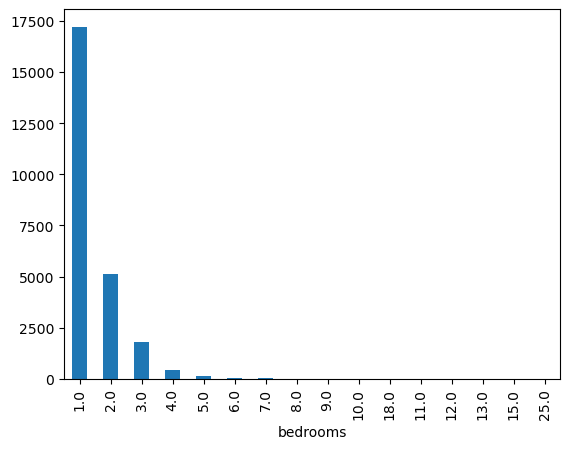

In [88]:
df.bedrooms.value_counts().plot.bar()

plt.show()

We will discretize into 1, 2, 3, and more than 3.

We can use `np.select` for this.

In [89]:
conditions = [
    df.bedrooms == 1,
    df.bedrooms == 2,
    df.bedrooms == 3,
    df.bedrooms > 3
]

labels = ['01_One', '02_Two', '03_Three', '04_Four or more']

df['bedrooms_disc'] = np.select(conditions, labels, default = -999)

We check.

In [90]:
df.bedrooms_disc.value_counts()

bedrooms_disc
01_One             17221
02_Two              5143
03_Three            1797
04_Four or more      678
Name: count, dtype: int64

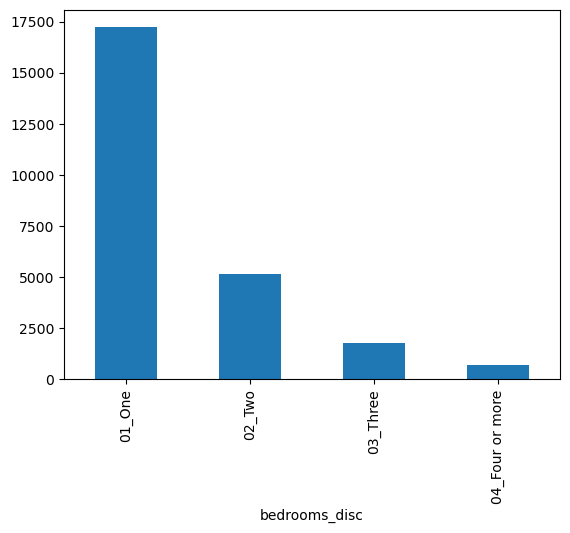

In [91]:
df.bedrooms_disc.value_counts().plot.bar()

plt.show();

**Discretizing `accommodates`, `beds` and `number_of_reviews`**

We’ll use `qcut` to create bins (discretize) based on percentiles: 0.5, 0.8, and 1.

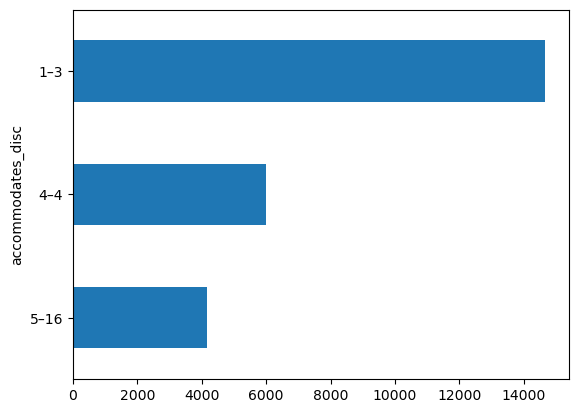

In [92]:
# Step 1: Create the quantile-based bins without labels
accommodates_cut = pd.qcut(df.accommodates, [0, 0.5, 0.8, 1])

# Step 2: Get the actual intervals generated by qcut
actual_intervals = accommodates_cut.cat.categories

# Step 3: Create dynamic labels based on the real interval edges
labels = [f"{int(interval.left)+1}–{int(interval.right)}" for interval in actual_intervals]

# Step 4: Apply qcut again with the dynamic labels
df['accommodates_disc'] = pd.qcut(df.accommodates, [0, 0.5, 0.8, 1], labels=labels)

# Plot the distribution
df['accommodates_disc'].value_counts().sort_index(ascending=False).plot.barh();
plt.show()

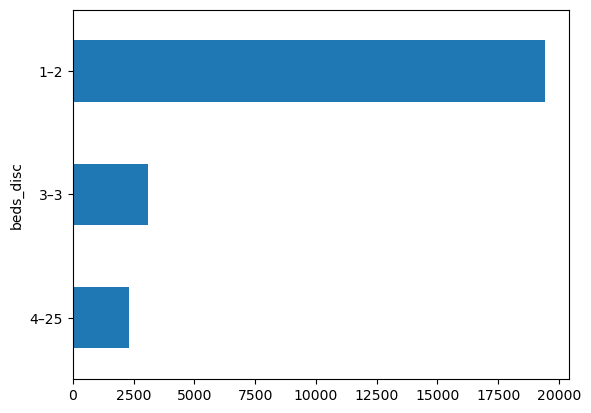

In [93]:
# Step 1: Discretize beds using quantile-based bins
beds_cut = pd.qcut(df.beds, [0, 0.5, 0.8, 1])

# Step 2: Extract real intervals and create dynamic labels
beds_labels = [f"{int(interval.left)+1}–{int(interval.right)}" for interval in beds_cut.cat.categories]

# Step 3: Reapply qcut with those labels
df['beds_disc'] = pd.qcut(df.beds, [0, 0.5, 0.8, 1], labels=beds_labels)

# Plot the distribution
df['beds_disc'].value_counts().sort_index(ascending=False).plot.barh()
plt.show()

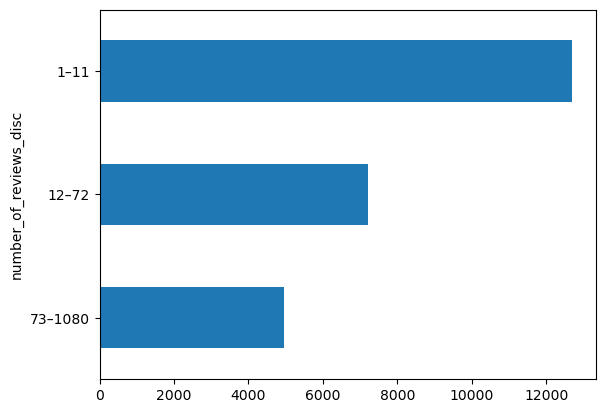

In [94]:
# Step 1: Create the quantile-based bins (without labels)
reviews_cut = pd.qcut(df.number_of_reviews, [0, 0.5, 0.8, 1])

# Step 2: Generate labels from the actual interval values
reviews_labels = [f"{int(interval.left)+1}–{int(interval.right)}" for interval in reviews_cut.cat.categories]

# Step 3: Apply qcut again with the dynamic labels
df['number_of_reviews_disc'] = pd.qcut(df.number_of_reviews, [0, 0.5, 0.8, 1], labels=reviews_labels)

# Step 4: Simple plot
df['number_of_reviews_disc'].value_counts().sort_index(ascending=False).plot.barh()
plt.show()

#### Creating Variables with External Data

In this specific case, there are many possible ways to enrich the data with external information.

The first, which we’ve already partially included, is the **property price lever**.

We said we could estimate the property’s purchase price by **multiplying the surface area in square meters by the €/m² value**.

We already obtained `price_m2`, but we don’t have the actual surface area in the dataset.

So we’ll approximate it using the **number of bedrooms**.

Not perfect, but it’s a practical approach.

**Estimate of the square metres of the property**

We'll use the following algorithm:

- 1 bedroom → 50 m²  
- 2 bedrooms → 70 m²  
- 3 bedrooms → 90 m²  
- 4 bedrooms → 120 m²  
- 5 or more bedrooms → 150 m²

In [95]:
conditions = [
    df.bedrooms == 1,
    df.bedrooms == 2,
    df.bedrooms == 3,
    df.bedrooms == 4,
    df.bedrooms > 4
]

results = [50,70,90,120,150]

df['m2'] = np.select(conditions, results, default = -999)

We check.

In [96]:
df['m2'].value_counts()

m2
50     17221
70      5143
90      1797
120      421
150      257
Name: count, dtype: int64

With this, we can now estimate the **property purchase price**.

Remember, we apply a **25% discount** to account for negotiation leverage.

In [97]:
df['purchase_price'] = df.m2 * df.price_m2 * 0.75

We check.

In [98]:
df[['bedrooms','m2','district','price_m2','purchase_price']].head(20)

bedrooms  m2               district  price_m2  purchase_price
0        1.0  50                 Latina      3800        142500.0
1        1.0  50                 Centro      7198        269925.0
2        1.0  50                 Centro      7198        269925.0
3        1.0  50                 Centro      7198        269925.0
4        1.0  50                 Centro      7198        269925.0
5        1.0  50                 Centro      7198        269925.0
6        1.0  50                 Centro      7198        269925.0
7        3.0  90                 Centro      7198        485865.0
8        1.0  50              Salamanca      9687        363262.5
9        1.0  50                 Centro      7198        269925.0
10       3.0  90                 Centro      7198        485865.0
11       1.0  50  Fuencarral - El Pardo      4829        181087.5
12       1.0  50          Ciudad Lineal      4480        168000.0
13       1.0  50               Chamberí      8099        303712.5
14       1.0  50               Chamberí      8099        303712.5
15       1.0  50              Hortaleza      4950        185625.0
16       1.0  50                 Centro      7198        269925.0
17       2.0  70                 Centro      7198        377895.0
18       1.0  50                 Centro      7198        269925.0
19       1.0  50                 Centro      7198        269925.0

Next, let’s look at another type of variable we can construct.

In this case, we can do a lot with the `latitude` and `longitude` coordinates.

Since location is crucial in tourism, we could compute the distance to various points of interest such as:

- Monuments  
- Leisure venues  
- Sports arenas  
- Historic sites, etc.

As a basic example, let’s calculate the **distance from each listing to Puerta del Sol**.

Coordinates obtained from Google:  
[Source_coordinates](https://www.123coordenadas.com/coordinates/81497-puerta-del-sol-madrid)

- **Latitude:** `40.4167278`  
- **Longitude:** `-3.7033387`

**Calculating the Distance from each listing to Puerta del Sol**

Because of the Earth’s curvature, the distance between two coordinates is calculated using the **Haversine formula**.

You can find ready-to-use code on Stack Overflow:  
[Haversine Formula in Python](https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points)

In [99]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 # In kilometers — if you're using miles, replace it with 3959.87433

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

Now we create the new variable:

In [100]:
# The coordinates of Puerta del Sol will be lat1 and lon1
lat1 = 40.4167278
lon1 = -3.7033387

df['poi_sol'] = df.apply(lambda record: haversine(lat1,lon1,record.latitude,record.longitude),axis = 1)

We can then check the average distance by district to validate.

In [101]:
df.groupby('district').poi_sol.mean().sort_values()

district
Centro                    0.730572
Arganzuela                1.934132
Chamberí                  2.140843
Retiro                    2.509861
Salamanca                 2.756115
Moncloa - Aravaca         3.118306
Latina                    3.744576
Carabanchel               3.893862
Usera                     3.949663
Puente de Vallecas        4.492101
Chamartín                 4.570730
Tetuán                    4.688105
Moratalaz                 5.075526
Ciudad Lineal             5.133013
Villaverde                7.699735
Fuencarral - El Pardo     7.934461
Hortaleza                 8.079011
San Blas - Canillejas     8.461972
Vicálvaro                 9.032168
Villa de Vallecas         9.114483
Barajas                  11.539057
Name: poi_sol, dtype: float64

### SAVE TO THE DATAMART

Let’s save this version as `df_prepared`:

In [102]:
df.to_sql('df_prepared', con = con, if_exists = 'replace')

24839

## V. ANALYSIS AND INSIGHTS

### DATA LOADING

In [103]:
con = sa.create_engine('sqlite:///Data/airbnb.db')

df = pd.read_sql('df_prepared', con = con)

df.head()

level_0  index     id                                          name  \
0        0      0  21853                          Bright and airy room   
1        1      1  30320                   Great Vacational Apartments   
2        2      2  30959               Beautiful loft in Madrid Center   
3        3      3  40916               Holiday Apartment Madrid Center   
4        4      4  62423  MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID   

   host_id neighbourhood_group neighbourhood  latitude  longitude  \
0    83531              Latina      Cármenes  40.40381   -3.74130   
1   130907              Centro           Sol  40.41476   -3.70418   
2   132883              Centro   Embajadores  40.41259   -3.70105   
3   130907              Centro   Universidad  40.42247   -3.70577   
4   303845              Centro      Justicia  40.41884   -3.69655   

         room_type  price  minimum_nights  calculated_host_listings_count  \
0     Private room   29.0               4                               2   
1  Entire home/apt  112.0               5                               3   
2  Entire home/apt  112.0               3                               1   
3  Entire home/apt  112.0               5                               3   
4     Private room   77.0               1                               3   

   availability_365                                        description  \
0               233  We have a quiet and sunny room with a good vie...   
1                 0                                               None   
2                 0  Beautiful Loft 60m2 size just in the historica...   
3                 0                                               None   
4               298  INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...   

  host_is_superhost  accommodates  bathrooms  bedrooms  beds  \
0                 f             1        1.0       1.0   1.0   
1                 f             2        NaN       1.0   1.0   
2                 f             2        NaN       1.0   1.0   
3                 f             3        NaN       1.0   2.0   
4                 f             4        1.5       1.0   2.0   

   number_of_reviews  review_scores_rating  review_scores_communication  \
0                 33                  4.58                         4.82   
1                172                  4.63                         4.78   
2                  8                  4.38                         4.63   
3                 49                  4.65                         4.79   
4                227                  4.64                         4.85   

   review_scores_location  price_m2 district  total_price  occupancy  \
0                    4.21      3800   Latina         29.0         36   
1                    4.90      7198   Centro        112.0        100   
2                    4.88      7198   Centro        112.0        100   
3                    4.88      7198   Centro        112.0        100   
4                    4.97      7198   Centro        123.2         18   

  bedrooms_disc accommodates_disc beds_disc number_of_reviews_disc  m2  \
0        01_One               1–3       1–2                  12–72  50   
1        01_One               1–3       1–2                73–1080  50   
2        01_One               1–3       1–2                   1–11  50   
3        01_One               1–3       1–2                  12–72  50   
4        01_One               4–4       1–2                73–1080  50   

   purchase_price   poi_sol  
0        142500.0  3.521406  
1        269925.0  0.230175  
2        269925.0  0.499379  
3        269925.0  0.671046  
4        269925.0  0.621024

### ANALYSIS

#### Price Analysis

**What is the average price? What is the price range? What about by district? By neighborhood?**

**What is the ranking of districts and neighborhoods by average rental price?**

In [104]:
df.total_price.describe()

count    24839.000000
mean       137.040473
std        407.659965
min         25.000000
25%         71.000000
50%        103.000000
75%        131.000000
max      23124.000000
Name: total_price, dtype: float64

We observe at least one outlier on the upper end that skews the mean, so we’ll use the **median** as a more reliable measure of central tendency.

In [105]:
df.total_price.median()

103.0

In [106]:
df.groupby('district').total_price.median().sort_values(ascending = False)

district
Salamanca                130.0
Centro                   112.0
Chamberí                 108.0
Chamartín                107.0
Retiro                   103.0
Moncloa - Aravaca        100.0
Tetuán                    91.0
Arganzuela                88.0
Hortaleza                 80.0
San Blas - Canillejas     73.0
Fuencarral - El Pardo     70.0
Ciudad Lineal             68.5
Carabanchel               65.0
Barajas                   64.0
Puente de Vallecas        63.0
Usera                     60.0
Villaverde                60.0
Latina                    58.0
Villa de Vallecas         58.0
Moratalaz                 45.0
Vicálvaro                 45.0
Name: total_price, dtype: float64

🧠 **District Ranking by Median Total Price**

The ranking of districts based on the median `total_price` reveals expected patterns but also some noteworthy deviations:

---

✅ Expected trends:

- **Salamanca (130 €)**, **Centro (112 €)**, **Chamberí (108 €)**, and **Chamartín (107 €)** lead the ranking, which is fully aligned with their premium status and high demand, both residential and tourist.
- **Retiro (103 €)** and **Moncloa - Aravaca (100 €)** also remain in the upper tier, reflecting their centrality, green spaces, and diverse housing options.

---

⚠️ Notable observations:

- **San Blas – Canillejas** appears in **10th position (73 €)**, ahead of **Fuencarral**, **Ciudad Lineal**, **Barajas**, and **Carabanchel** — which might seem counterintuitive at first.

  However, further analysis (*see below*) shows:
  - A **standard deviation of 172 €**, which is relatively high.
  - An **IQR of only 26.5 €**, suggesting that most listings are tightly clustered, but a few listings are priced significantly higher than the rest.
  - Although **Puente de Vallecas** shows the most extreme outliers (above 10,000 €), **San Blas** also presents a long upper tail in the boxplot.
  - San Blas has only **555 listings**, so even a handful of expensive rentals (e.g., near Wanda or IFEMA) could skew the median.

  ✅ This reinforces the idea that **event-driven demand** (concerts, sports, conventions) can distort median pricing in otherwise mid-range districts.

---

🟠 Additional comments:

- **Tetuán (91 €)** ranks notably high for a non-premium district, likely driven by gentrification and proximity to business hubs.
- **The price gap between Retiro (103 €) and Tetuán (91 €)** is surprisingly small considering their very different profiles.
- **Southern districts** like **Puente de Vallecas (63 €)**, **Usera (60 €)**, **Villaverde (60 €)**, and **Vicálvaro (45 €)** remain at the bottom, as expected based on socioeconomic and touristic factors.

---

Let’s take a closer look at **San Blas - Canillejas**, providing justification for our analysis.

In [107]:
df.loc[df.district == 'San Blas - Canillejas'].sort_values('total_price',ascending = False).head(10)

level_0  index                   id  \
5789      5789   5789             35155733   
11034    11034  11034   700011597005161293   
5362      5362   5362             34569100   
5763      5763   5763             35137335   
5562      5562   5562             34796669   
7993      7993   7993             46653997   
11991    11991  11991   774773851284478554   
5749      5749   5749             35011833   
16220    16220  16220  1029047360999100969   
5416      5416   5416             34707598   

                                                   name    host_id  \
5789          Cosy apartment near Metropolitano Stadium   78241549   
11034                              Habitación reformada  144457564   
5362   Final Champions close of Wanda Stadium.Two Rooms  231479865   
5763                     Bedrooms Champion League Final  124425621   
5562              Bedrooms close to Wanda Metropolitano   49642755   
7993          LUXURY PENTHOUSE. TERRACE + SWIMMING POOL  376377623   
11991                   Casa acogedora e piso reformado  195950344   
5749                                 Only 4 champions!!   47460057   
16220    Beatifull apartement in the center of the city  528957573   
5416         Habitaciones para la final de la Champions  261779839   

         neighbourhood_group neighbourhood   latitude  longitude  \
5789   San Blas - Canillejas        Hellín  40.431270  -3.612340   
11034  San Blas - Canillejas         Arcos  40.424480  -3.620770   
5362   San Blas - Canillejas         Rosas  40.430000  -3.606940   
5763   San Blas - Canillejas         Arcos  40.426580  -3.611960   
5562   San Blas - Canillejas         Rosas  40.425620  -3.604900   
7993   San Blas - Canillejas        Hellín  40.433160  -3.619620   
11991  San Blas - Canillejas       Amposta  40.428033  -3.619205   
5749   San Blas - Canillejas      Salvador  40.438820  -3.635110   
16220  San Blas - Canillejas         Rejas  40.446989  -3.596043   
5416   San Blas - Canillejas         Rosas  40.430110  -3.603610   

             room_type   price  minimum_nights  \
5789      Private room  1050.0               1   
11034     Private room  1000.0               2   
5362      Private room   950.0               1   
5763      Private room   500.0               1   
5562      Private room   700.0               1   
7993   Entire home/apt  1000.0               2   
11991     Private room  1000.0             365   
5749   Entire home/apt   913.0               3   
16220  Entire home/apt   901.0               1   
5416      Private room   500.0               1   

       calculated_host_listings_count  availability_365  \
5789                                1                 0   
11034                               1                89   
5362                                1               365   
5763                                1               365   
5562                                2                 0   
7993                                4               116   
11991                               1                 1   
5749                                1               179   
16220                               1               270   
5416                                1                88   

                                             description host_is_superhost  \
5789   A cosy apartment with two bedrooms, two bathro...                 f   
11034  Surrender to the charms of this modern home fu...                 f   
5362   Two rooms very close of Wanda Stadium. Tres hu...                 f   
5763   I rent rooms for Champions League Final<br />3...                 f   
5562                                                None                 f   
7993   Penthouse decorated in detail with high qualit...                 t   
11991  Break up with your day-to-day life and relax i...                 f   
5749                                                None                 f   
16220  This is a very beatiful house. You will enjoy it.                 f   

In [108]:
# Filter data for San Blas - Canillejas
sb = df[df['district'] == 'San Blas - Canillejas']

# Standard deviation
std_price = sb['total_price'].std()

# IQR (Interquartile Range)
q1 = sb['total_price'].quantile(0.25)
q3 = sb['total_price'].quantile(0.75)
iqr = q3 - q1

print(f"Standard deviation: {std_price:.2f} €")
print(f"IQR (Q3 - Q1): {iqr:.2f} €")


Standard deviation: 172.19 €
IQR (Q3 - Q1): 26.50 €


In [109]:
df['district'].value_counts().sort_values(ascending=False)

district
Centro                   10377
Salamanca                 1676
Chamberí                  1615
Tetuán                    1549
Arganzuela                1361
Retiro                     958
Carabanchel                889
Chamartín                  843
Ciudad Lineal              803
Puente de Vallecas         788
Latina                     670
Moncloa - Aravaca          661
San Blas - Canillejas      555
Usera                      510
Hortaleza                  486
Fuencarral - El Pardo      326
Villaverde                 229
Barajas                    173
Moratalaz                  169
Villa de Vallecas          123
Vicálvaro                   78
Name: count, dtype: int64

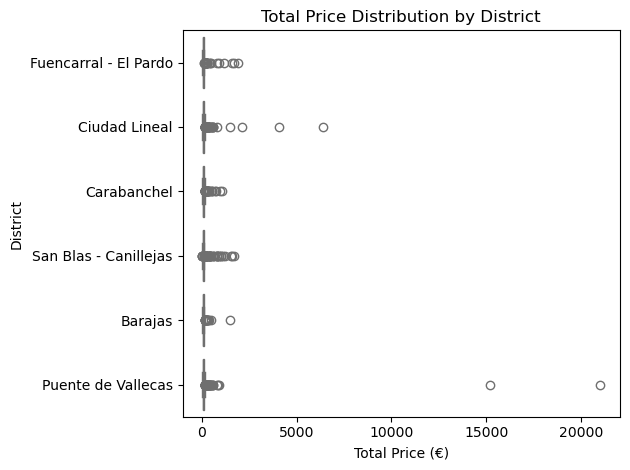

In [110]:
selected_districts = ['San Blas - Canillejas', 'Ciudad Lineal', 'Fuencarral - El Pardo',
                      'Carabanchel', 'Puente de Vallecas', 'Barajas']

# Filter data
subset = df[df['district'].isin(selected_districts)]

# Boxplot
sns.boxplot(data=subset,
            x='total_price', y='district',
            hue='district', palette='pastel', legend=False)

plt.title('Total Price Distribution by District')
plt.xlabel('Total Price (€)')
plt.ylabel('District')
plt.tight_layout()
plt.show()

We can clearly see the idea we previously justified — that **event-driven demand** (concerts, sports, conventions) can distort median pricing in districts that are otherwise mid-range in value.

When reading the listing descriptions, it's evident that these high prices are influenced by proximity to the **Wanda Metropolitano stadium**, which frequently hosts major events such as the **Champions League Final** or large concerts.

This leads to a valuable insight:

💡 **Insight 1:     
Some properties may have a regular, low-to-moderate baseline value, but experience sharp increases in value during specific high-demand periods tied to sports or entertainment events.**

---

❓ Could this justify a new rental product?  
A model where the apartment is rented at a **below-market long-term rate**, with the **condition that the tenant temporarily vacates the property** during key dates — allowing the owner to list it as a **high-yield short-term rental** during events?

In the rest of the ranking, there were no surprises — districts like **Salamanca**, **Centro**, and **Chamartín** clearly remain at the top.

However, an interesting detail emerges:

- The **difference in median price** between **Retiro** and **Tetuán** is surprisingly small.

This leads us to compare the average rental price by district with the average purchase price by district as well.

In [111]:
temp = df.groupby('district')[['total_price','purchase_price']].median()
temp

total_price  purchase_price
district                                          
Arganzuela                    88.0        212587.5
Barajas                       64.0        163987.5
Carabanchel                   65.0        121162.5
Centro                       112.0        269925.0
Chamartín                    107.0        271725.0
Chamberí                     108.0        303712.5
Ciudad Lineal                 68.5        168000.0
Fuencarral - El Pardo         70.0        181087.5
Hortaleza                     80.0        185625.0
Latina                        58.0        142500.0
Moncloa - Aravaca            100.0        213412.5
Moratalaz                     45.0        146250.0
Puente de Vallecas            63.0        105600.0
Retiro                       103.0        273225.0
Salamanca                    130.0        363262.5
San Blas - Canillejas         73.0        131737.5
Tetuán                        91.0        200100.0
Usera                         60.0        112425.0
Vicálvaro                     45.0        124537.5
Villa de Vallecas             58.0        121162.5
Villaverde                    60.0        101250.0

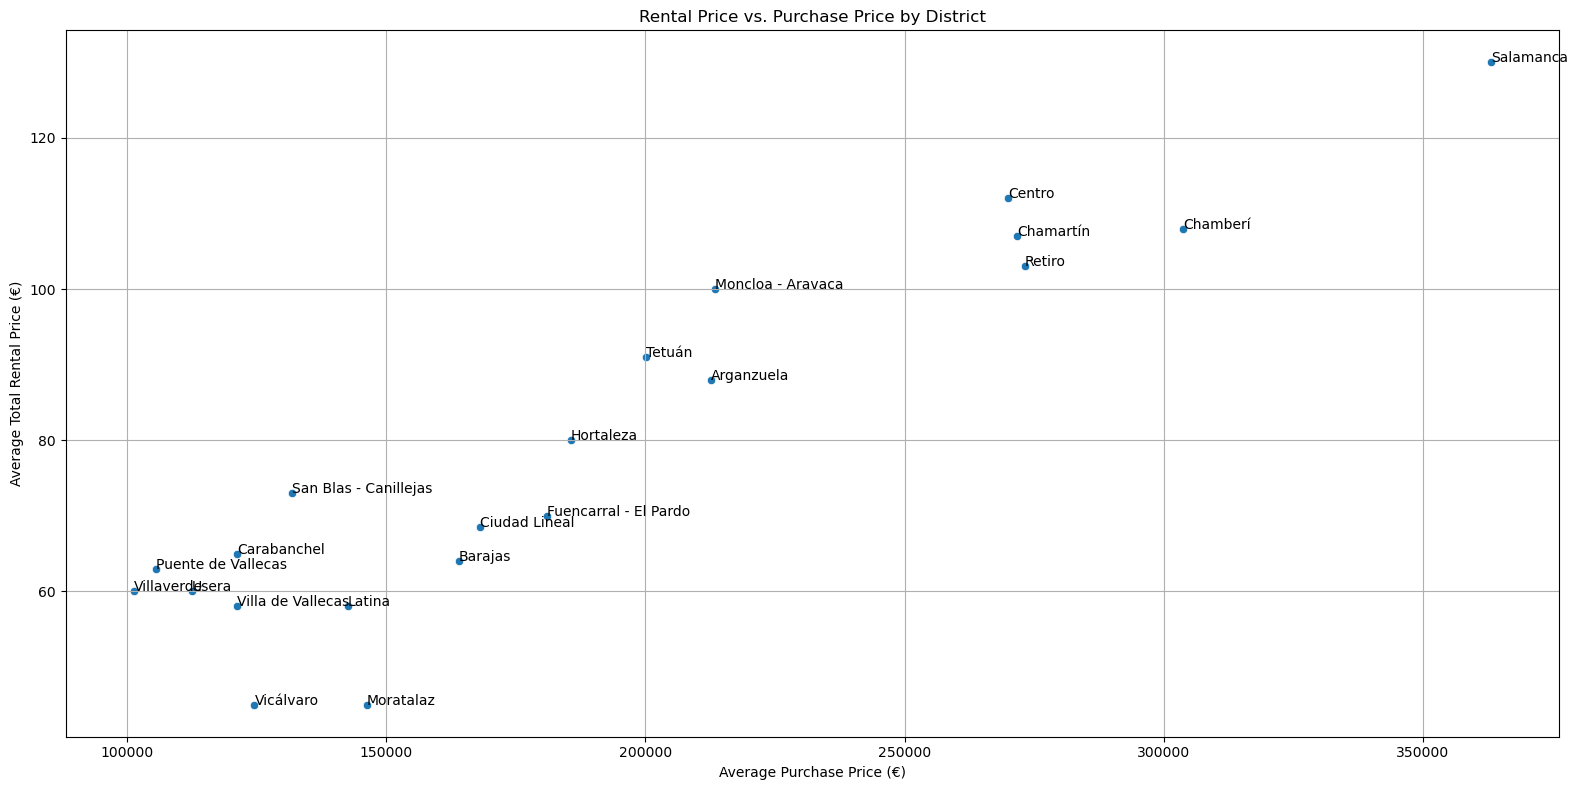

In [112]:
plt.figure(figsize=(16, 8))

sns.scatterplot(data=temp, x='purchase_price', y='total_price')

# Attach district names as labels
for i in range(temp.shape[0]):
    plt.text(temp.purchase_price.iloc[i], temp.total_price.iloc[i], temp.index[i])

plt.title('Rental Price vs. Purchase Price by District')
plt.xlabel('Average Purchase Price (€)')
plt.ylabel('Average Total Rental Price (€)')
plt.grid(True)

plt.tight_layout()
plt.show()

The updated scatter plot reinforces a clear **positive correlation** between the average purchase price and the average total rental price across Madrid’s districts.

🧩 Emerging Clusters

We observe three broad clusters:

- **Low Purchase – Low Rent**  
  _Examples: Villaverde, Usera, Moratalaz, Vicálvaro_

- **Mid Purchase – Mid Rent**  
  _Examples: Tetuán, Arganzuela, Hortaleza, Carabanchel_

- **High Purchase – High Rent**  
  _Examples: Salamanca, Centro, Chamberí, Chamartín_

🔎 Noteworthy Outlier

- **San Blas - Canillejas** appears slightly elevated in rental price relative to its average purchase price, confirming our earlier hypothesis:

  > **Event-driven demand** (e.g. concerts, sports finals at Wanda Metropolitano) can temporarily inflate rental prices, especially for short-term listings.

🧠 Conclusion

No "clear bargains" are evident at the district level — the relationship between purchase and rental price is mostly proportional. However, **San Blas** could attract speculative interest for **event-driven short-term rental strategies**.

➡️ **Next step**: Perform a more detailed analysis at the **neighbourhood** level to uncover micro-opportunities.

In [113]:
temp = df.groupby('neighbourhood')[['total_price','purchase_price']].median()
temp

total_price  purchase_price
neighbourhood                             
Abrantes              65.0        121162.5
Acacias               88.0        212587.5
Adelfas              103.0        273225.0
Aeropuerto            61.0        163987.5
Aguilas               58.0        142500.0
...                    ...             ...
Valverde              70.0        181087.5
Ventas                68.5        168000.0
Vinateros             45.0        146250.0
Vista Alegre          65.0        121162.5
Zofío                 60.0        112425.0

[128 rows x 2 columns]

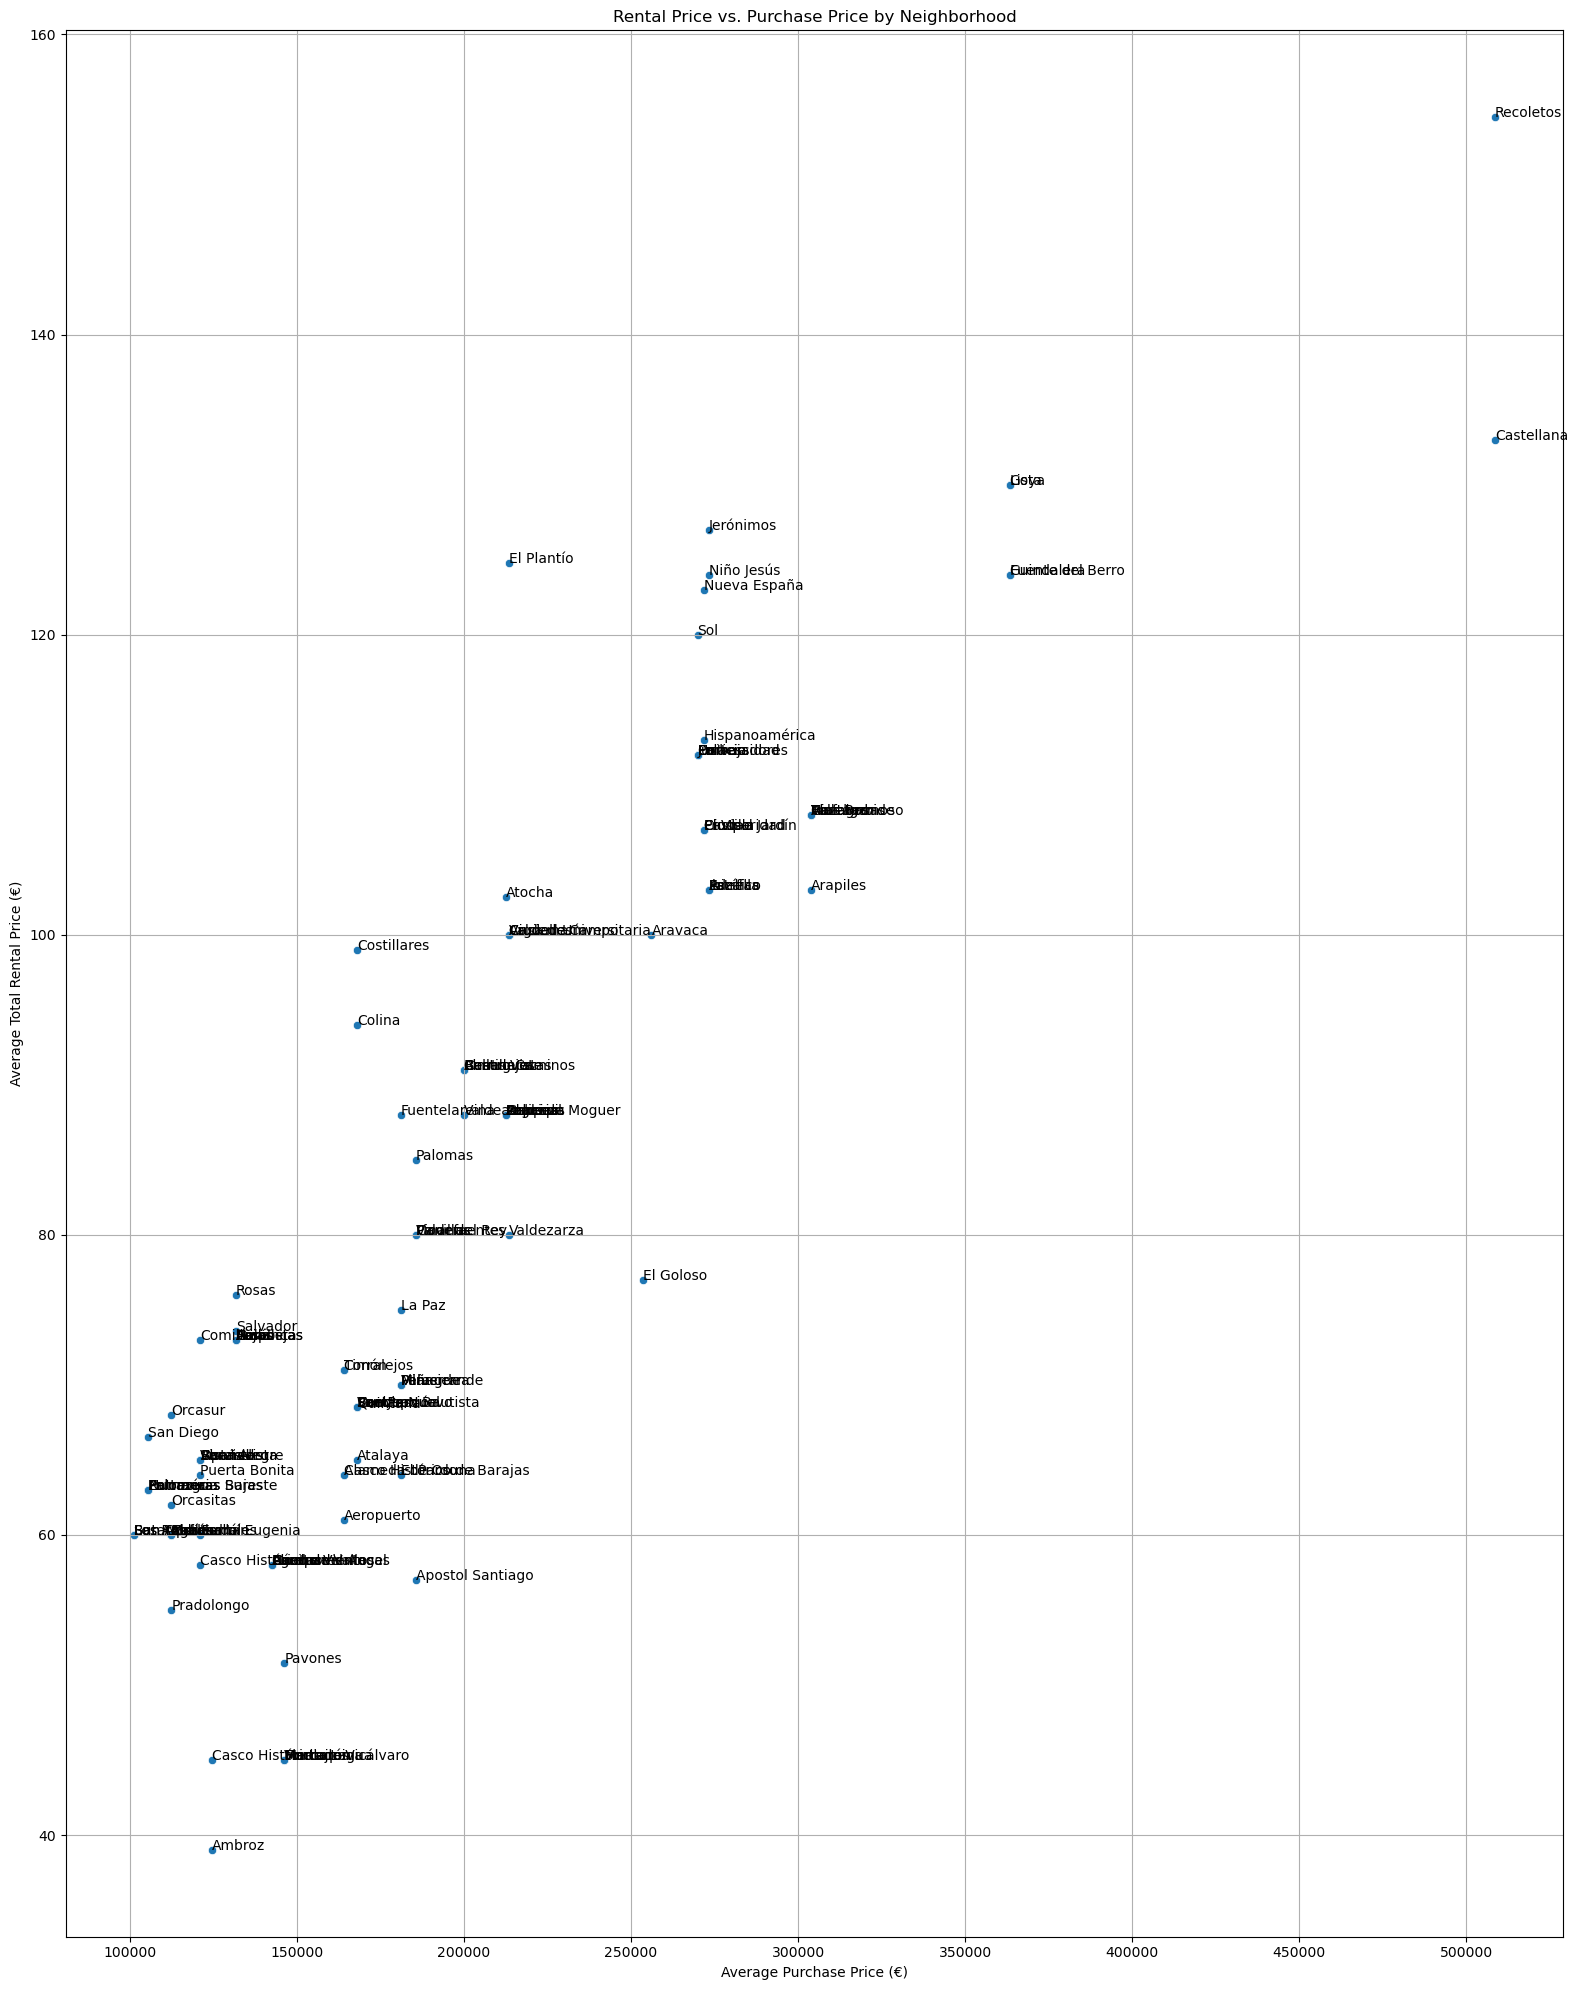

In [114]:
plt.figure(figsize=(16, 20))

# Scatterplot for neighborhood-level analysis
sns.scatterplot(data=temp, x='purchase_price', y='total_price')

# Attach neighborhood names as labels
for i in range(temp.shape[0]):
    plt.text(temp.purchase_price.iloc[i], temp.total_price.iloc[i], temp.index[i])

plt.title('Rental Price vs. Purchase Price by Neighborhood')
plt.xlabel('Average Purchase Price (€)')
plt.ylabel('Average Total Rental Price (€)')
plt.grid(True)

plt.tight_layout()
plt.show()

Now that we’ve moved from the district-level to the neighborhood-level, we see the following:

* There are outliers like **Recoletos** or **Castellana**, but they align with their high purchase prices.

* **Stronger correlation, still no bargains**  
  There remains a **clear positive correlation** between average purchase price and rental income.  
  This confirms the idea that, in general, higher purchase prices correspond to higher rental potential.

* We can now **segment more precisely** based on both cost and rental return:

  - **High-end:**  
    *Recoletos*, *Castellana*, *Goya* – high purchase, high rent

  - **Mid-high:**  
    *Jerónimos*, *Niño Jesús*, *Nueva España* – relatively strong rent-income for their cost

  - **Mid-low value:**  
    *Atocha*, *Valdezarza*, *Quintana* – average values but more scattered returns

  - **Cost-efficient (Potential ROI hotspots):**  
    *El Plantío*, *Rosas*, *Canillejas* – low to mmid purchase price, surprisingly decent rent

💡 **Insight 2: Micro-optimizations are possible**  
In contrast to the district view, this view allows **more granular investment strategy**:  
some neighborhoods outperform their expected rental return based on purchase price (e.g., **Jerónimos**, **El Plantío**, **Rosas**),  
which could make them **investment gems**. And we can also segment it based on the type or quality of the property we are interested in investing in.

In [115]:
# List of neighborhoods you want to check
neighborhoods = ['Recoletos', 
                 'El Plantío', 
                 'Jerónimos', 
                 'Costillares', 
                 'Colina', 
                 'Rosas', 
                 'Salvador', 
                 'Arcos', 
                 'Amposta', 
                 'Hellín', 
                 'Comillas', 
                 'Simancas', 
                 'Rejas', 
                 'Canillejas', 
                 'Sol', 
                 'Niño Jesús', 
                 'Nueva España'
                 ]

# Print the corresponding district for each neighborhood
for n in neighborhoods:
    district = df.loc[df['neighbourhood'] == n, 'district'].unique()
    print(f"{n}: {district}")

Recoletos: ['Salamanca']
El Plantío: ['Moncloa - Aravaca']
Jerónimos: ['Retiro']
Costillares: ['Ciudad Lineal']
Colina: ['Ciudad Lineal']
Rosas: ['San Blas - Canillejas']
Salvador: ['San Blas - Canillejas']
Arcos: ['San Blas - Canillejas']
Amposta: ['San Blas - Canillejas']
Hellín: ['San Blas - Canillejas']
Comillas: ['Carabanchel']
Simancas: ['San Blas - Canillejas']
Rejas: ['San Blas - Canillejas']
Canillejas: ['San Blas - Canillejas']
Sol: ['Centro']
Niño Jesús: ['Retiro']
Nueva España: ['Chamartín']


**What factors (besides location) influence the rental price?**

To answer this question, we can build a mini data cube, since we’ve already discretized our analysis variables.

In [116]:
#  Step 1: Choose which variables will be metrics and which will be dimensions
metrics = ['total_price','purchase_price']
dimensions = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicube_price = df[dimensions + metrics]
minicube_price

bedrooms_disc accommodates_disc beds_disc number_of_reviews_disc  \
0            01_One               1–3       1–2                  12–72   
1            01_One               1–3       1–2                73–1080   
2            01_One               1–3       1–2                   1–11   
3            01_One               1–3       1–2                  12–72   
4            01_One               4–4       1–2                73–1080   
...             ...               ...       ...                    ...   
24834        01_One               1–3       1–2                   1–11   
24835        01_One               1–3       1–2                   1–11   
24836        01_One               1–3       1–2                   1–11   
24837        02_Two              5–16       3–3                   1–11   
24838        01_One               1–3       1–2                   1–11   

       total_price  purchase_price  
0             29.0        142500.0  
1            112.0        269925.0  
2            112.0        269925.0  
3            112.0        269925.0  
4            123.2        269925.0  
...            ...             ...  
24834         67.0        200100.0  
24835         63.0        200100.0  
24836        103.0        185625.0  
24837        100.0        169627.5  
24838         66.0        121162.5  

[24839 rows x 6 columns]

In [117]:
# Step 2: Convert the dimensions into a transactional format
minicube_price = minicube_price.melt(id_vars=['total_price','purchase_price'])
minicube_price

total_price  purchase_price                variable   value
0             29.0        142500.0           bedrooms_disc  01_One
1            112.0        269925.0           bedrooms_disc  01_One
2            112.0        269925.0           bedrooms_disc  01_One
3            112.0        269925.0           bedrooms_disc  01_One
4            123.2        269925.0           bedrooms_disc  01_One
...            ...             ...                     ...     ...
99351         67.0        200100.0  number_of_reviews_disc    1–11
99352         63.0        200100.0  number_of_reviews_disc    1–11
99353        103.0        185625.0  number_of_reviews_disc    1–11
99354        100.0        169627.5  number_of_reviews_disc    1–11
99355         66.0        121162.5  number_of_reviews_disc    1–11

[99356 rows x 4 columns]

In [118]:
# Step 3: Aggregate the metrics by "variable" and "value" using the desired aggregation functions
minicube_price = minicube_price.groupby(['variable','value'])[['total_price','purchase_price']].agg('median')
minicube_price

total_price  purchase_price
variable               value                                       
accommodates_disc      1–3                     87.0        269925.0
                       4–4                    112.0        269925.0
                       5–16                   157.0        377895.0
bedrooms_disc          01_One                  90.0        269925.0
                       02_Two                 126.0        377895.0
                       03_Three               162.0        485865.0
                       04_Four or more        220.0        647820.0
beds_disc              1–2                     93.0        269925.0
                       3–3                    130.0        377895.0
                       4–25                   183.0        425197.5
number_of_reviews_disc 12–72                  100.0        269925.0
                       1–11                   106.0        269925.0
                       73–1080                104.0        269925.0

Analyzing the Mini Cube Variable by Variable.

In [119]:
minicube_price.loc['bedrooms_disc']

total_price  purchase_price
value                                       
01_One                  90.0        269925.0
02_Two                 126.0        377895.0
03_Three               162.0        485865.0
04_Four or more        220.0        647820.0

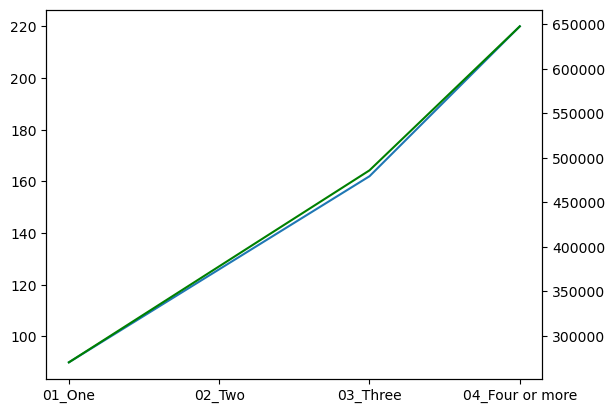

In [120]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['bedrooms_disc'].total_price)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['bedrooms_disc'].purchase_price, color ='green')

plt.show();

There is nothing particularly noteworthy regarding the number of bedrooms.

There is an almost perfect relationship between the purchase price and the total price that can be charged.

However, part of this effect may be artificial, since we use the number of bedrooms to estimate the total price from the purchase price.

In [121]:
minicube_price.loc['beds_disc']

total_price  purchase_price
value                             
1–2           93.0        269925.0
3–3          130.0        377895.0
4–25         183.0        425197.5

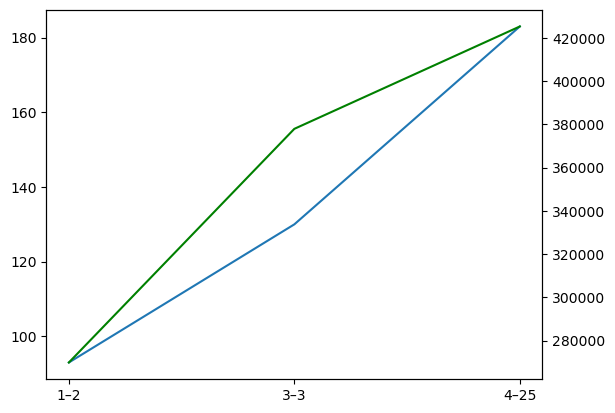

In [122]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['beds_disc'].total_price)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['beds_disc'].purchase_price, color = 'green')

plt.show();

There is indeed an actionable insight when it comes to the number of beds:

**💡 Insight 3: Avoid having exactly 3 beds.** Either opt for 1–2 beds, which tend to be more efficient, or maximize the number of beds if you can ensure high occupancy.

This pattern does not appear when analyzing the number of bedrooms,
which suggests that some owners may be trying to add more beds than bedrooms,
possibly without truly optimizing income.

This raises an interesting question:
Could it be that hosts are trying to fit many more beds than rooms in order to boost income?

Let’s take a look, for example, at one-bedroom apartments:

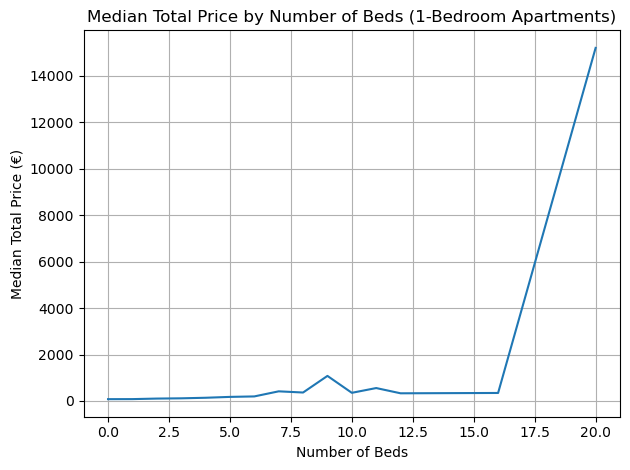

In [123]:
df[df.bedrooms == 1].groupby('beds').total_price.median().plot(kind='line')
plt.title('Median Total Price by Number of Beds (1-Bedroom Apartments)')
plt.xlabel('Number of Beds')
plt.ylabel('Median Total Price (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

Indeed, there’s something interesting going on here —
some 1-bedroom apartments appear to have up to 20 beds!

This suggests that certain hosts may be cramming as many beds as possible into small units to boost rental income — a practice that may or may not align with occupancy rates or guest comfort.

👉 This is definitely worth exploring further, ideally with someone who understands the operational side of the short-term rental business.

Let's look at some examples:

In [124]:
df.loc[(df.bedrooms == 1)& (df.beds > 8)]

level_0  index                   id  \
9943      9943   9943   609912450623640129   
9995      9995   9995   600789912630118943   
10280    10280  10280   644726267441640007   
10913    10913  10913   678839511440564589   
10954    10954  10954   681807241664662257   
10959    10959  10959   682390524307350727   
12599    12599  12599   830274755647339249   
12685    12685  12685   839123661155092383   
15098    15098  15098   957823891253947353   
15883    15883  15883  1010913977559613777   
15884    15884  15884  1010923546759626871   
15885    15885  15885  1010940551699508357   
15962    15962  15962  1011536728079924456   
17271    17271  17271  1082721006892214528   
23880    23880  23880  1338199361097963208   
23888    23888  23888  1338355735013084708   

                                                    name    host_id  \
9943          Cama en Habitación compartida  12 personas  453229690   
9995          Cama en habitación compartida x 10 (mixta)  453229690   
10280                 habitación compartida.12 Personas.  453229690   
10913   Art Seven Hostel - Cápsula habitación compartida  451189684   
10954           CAMA EN HABITACIÓN COMPARTIDA 10PERSONAS  453229690   
10959  CAMA EN HABITACIÓN COMPARTIDA 6 HUESPEDES MUJE...  453229690   
12599        Habitación privada 7 camas, Gran Vía/Centro  493916828   
12685  3 Camas en hab. compartida-baño privado, 5 lit...  493916828   
15098                                    Hostel Velvet 6  523167824   
15883             Habitacion privada 4 personas con baño  493916828   
15884  2 Camas en hab. compartida-baño privado, 6 lit...  493916828   
15885  2 Camas en hab. compartida-baño privado, 2 lit...  493916828   
15962  3 Camas en hab. compartida-baño privado, 6 lit...  493916828   
17271                          Harli10 Amazing apartment   22089497   
23880  Cama en Habitación Compartida Mixta de 8 personas  550955957   
23888  Cama en Habitación Compartida Mixta de 6 personas  550955957   

      neighbourhood_group    neighbourhood   latitude  longitude  \
9943               Centro      Universidad  40.422730  -3.703310   
9995               Centro      Universidad  40.422500  -3.704960   
10280              Centro      Universidad  40.421320  -3.703090   
10913              Centro      Embajadores  40.413121  -3.704288   
10954              Centro      Universidad  40.422270  -3.702820   
10959              Centro      Universidad  40.420970  -3.703530   
12599              Centro      Universidad  40.421444  -3.704856   
12685              Centro      Universidad  40.421046  -3.703336   
15098  Puente de Vallecas         Portazgo  40.387009  -3.646423   
15883              Centro      Universidad  40.421100  -3.704830   
15884              Centro      Universidad  40.421891  -3.703881   
15885              Centro      Universidad  40.421891  -3.703881   
15962              Centro      Universidad  40.421891  -3.703881   
17271              Centro      Embajadores  40.409497  -3.703641   
23880          Arganzuela  Palos de Moguer  40.404603  -3.694616   
23888          Arganzuela  Palos de Moguer  40.404603  -3.694616   

             room_type  price  minimum_nights  calculated_host_listings_count  \
9943       Shared room   29.0               1                              12   
9995       Shared room   29.0               1                              12   
10280      Shared room   28.0               1                              12   
10913     Private room   66.0               1                               6   
10954      Shared room   29.0               1                              12   
10959      Shared room   29.0               1                              12   
12599     Private room  150.0               1                              16   
12685      Shared room   59.0               1                              16   
15098      Shared room  950.0               1                               2   
15883     Private room  103.0               1    

Now let’s analyze based on the number of guests accepted

In [125]:
minicube_price.loc['accommodates_disc']

total_price  purchase_price
value                             
1–3           87.0        269925.0
4–4          112.0        269925.0
5–16         157.0        377895.0

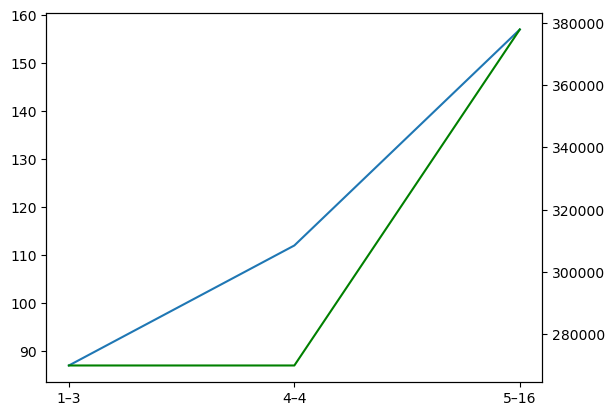

In [126]:
f, ax = plt.subplots()
ax.plot(minicube_price.loc['accommodates_disc'].total_price)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['accommodates_disc'].purchase_price, color = 'green')

plt.show();

**💡 Insight 4: The optimal number of guests is 4, since the property price for accommodating 4 guests is the same as for accommodating 1, 2 or 3. From 4 guests onward, the apartment needs to be larger, and the purchase price increases significantly.**

Finally, let’s analyze the variable we created for proximity to a point of interest, to see if it has any effect on the price of the apartments.

In a real-world situation, we would have created many such variables and repeated the analysis with all of them.

In this case, since we’ve built the distance to Puerta del Sol, we’ll evaluate only the districts for which this might be relevant—i.e., the most central ones.

To do this, we’ll first calculate the average distance by district and choose a cutoff point.

In [127]:
df.groupby('district').poi_sol.median().sort_values()

district
Centro                    0.734410
Arganzuela                1.786540
Moncloa - Aravaca         1.963251
Chamberí                  2.071117
Retiro                    2.449982
Salamanca                 2.809172
Latina                    3.296217
Carabanchel               3.531358
Usera                     3.742724
Puente de Vallecas        4.217214
Chamartín                 4.441231
Tetuán                    4.658970
Moratalaz                 5.053155
Ciudad Lineal             5.130408
Fuencarral - El Pardo     7.521814
Villaverde                7.530735
Hortaleza                 8.123429
San Blas - Canillejas     8.132380
Vicálvaro                 8.454763
Villa de Vallecas         8.753753
Barajas                  11.630708
Name: poi_sol, dtype: float64

We’ll include Latina as the cutoff.

Based on that selection, we’ll visualize using a scatter plot.

In [128]:
df.groupby('district').poi_sol.median().sort_values()[0:7].index.to_list()

['Centro',
 'Arganzuela',
 'Moncloa - Aravaca',
 'Chamberí',
 'Retiro',
 'Salamanca',
 'Latina']

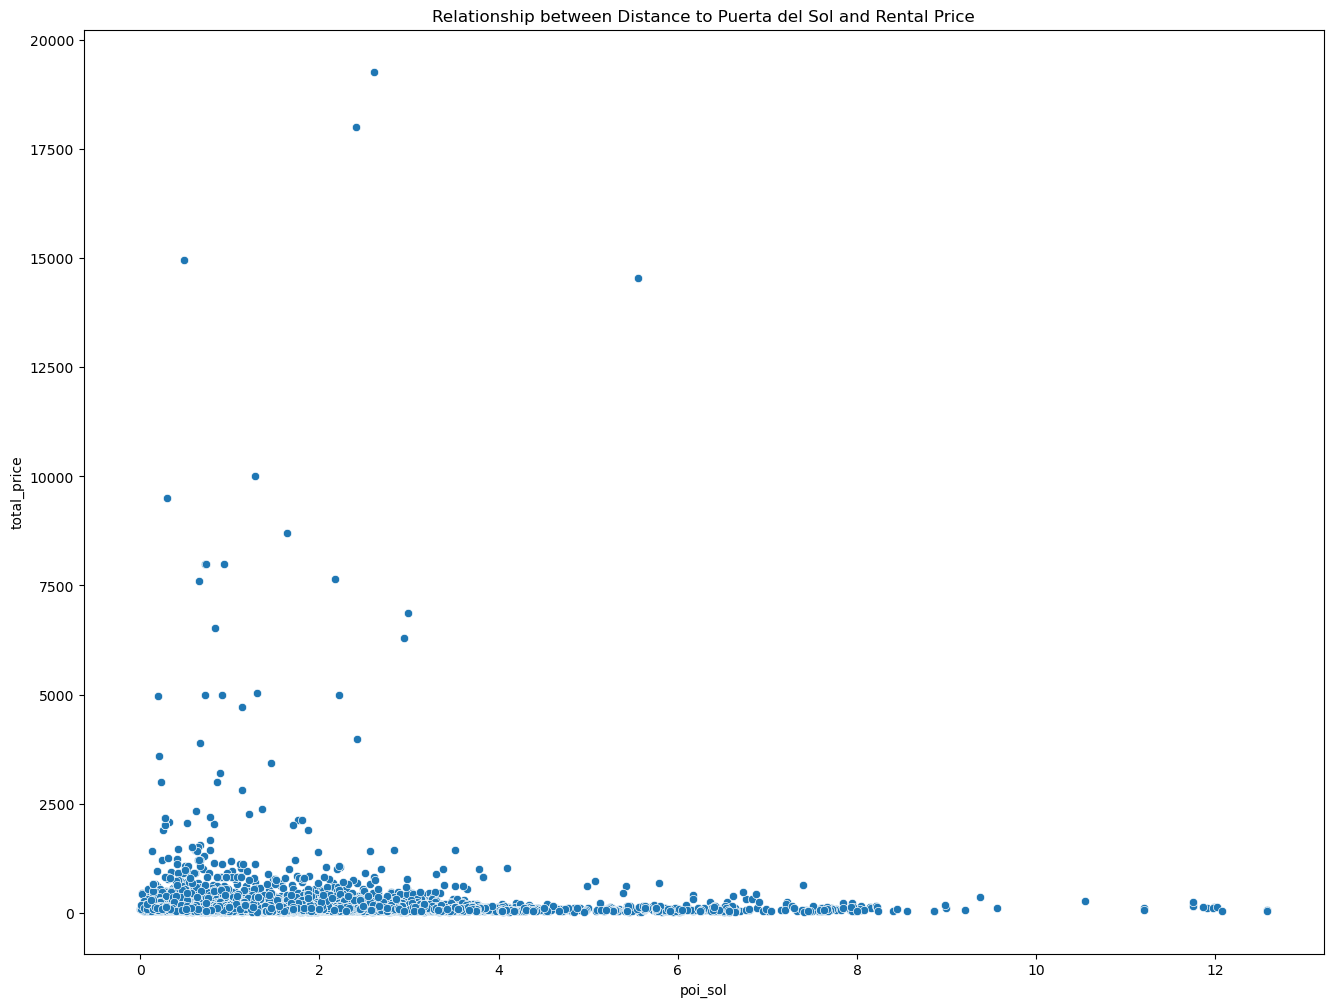

In [129]:
selection = df.groupby('district').poi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize=(16, 12))
sns.scatterplot(data=df[df.district.isin(selection)], x='poi_sol', y='total_price')
plt.title('Relationship between Distance to Puerta del Sol and Rental Price')
plt.show()

There doesn’t appear to be a direct relationship—at least not as strong as expected—between the distance to Puerta del Sol and the rental price.

**💡 Insight 5: Within central districts, proximity to points of interest doesn't seem to have as much impact as one might expect.
This opens the door to searching for properties that, while located in a central district, are not right next to the point of interest—and therefore, are likely to have a lower purchase price.**

**What is the ranking of price per m² by district?**

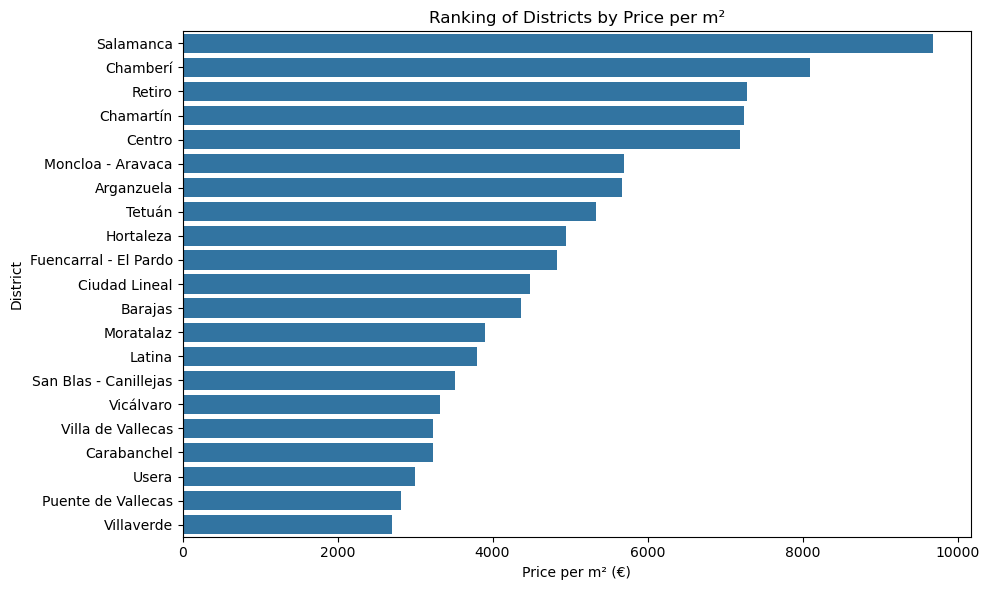

In [130]:
# Show ranking
price_m2_ranking = df[['district', 'price_m2']].drop_duplicates().sort_values(by='price_m2', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=price_m2_ranking, x='price_m2', y='district')
plt.title('Ranking of Districts by Price per m²')
plt.xlabel('Price per m² (€)')
plt.ylabel('District')
plt.tight_layout()
plt.show()

**💡 Insight 6: Salamanca, Chamberí and Retiro clearly dominate the price per m² ranking — exceeding €7,000–€9,500/m² — confirming their premium and consolidated status. However, districts like Tetuán, Hortaleza and Fuencarral – El Pardo, priced between €4,500–€5,500/m², may offer capital appreciation potential. Meanwhile, southern districts such as Villaverde and Puente de Vallecas (under €4,000/m²) could represent high-yield opportunities if rental prices are not equally discounted.**

**What is the ranking of total property price (m² × average size) by district?**

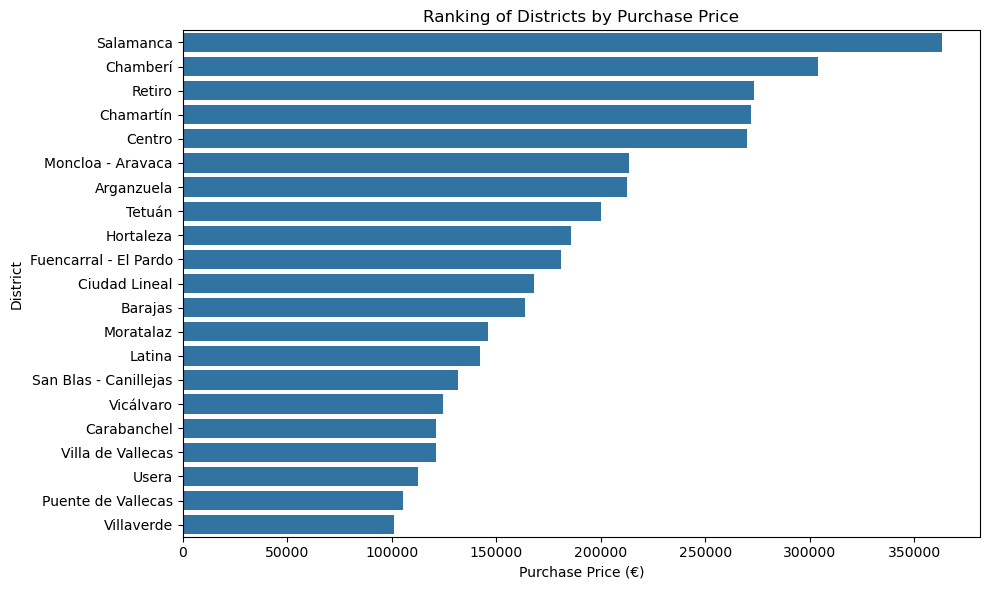

In [131]:
# Show ranking
purchase_price_ranking = df.groupby('district')['purchase_price'].median().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=purchase_price_ranking, x='purchase_price', y='district')
plt.title('Ranking of Districts by Purchase Price')
plt.xlabel('Purchase Price (€)')
plt.ylabel('District')
plt.tight_layout()
plt.show()

**💡 Insight 7: When using the median purchase price as a more robust measure, Salamanca, Chamberí and Retiro remain the most expensive districts to acquire property, all hovering above €300,000. In contrast, Villaverde, Puente de Vallecas and Usera show typical acquisition prices below €120,000 — confirming their potential as low-cost entry points for investors seeking high rental yield, especially if occupancy rates remain solid.**

**What is the relationship between property price and occupancy by district?**

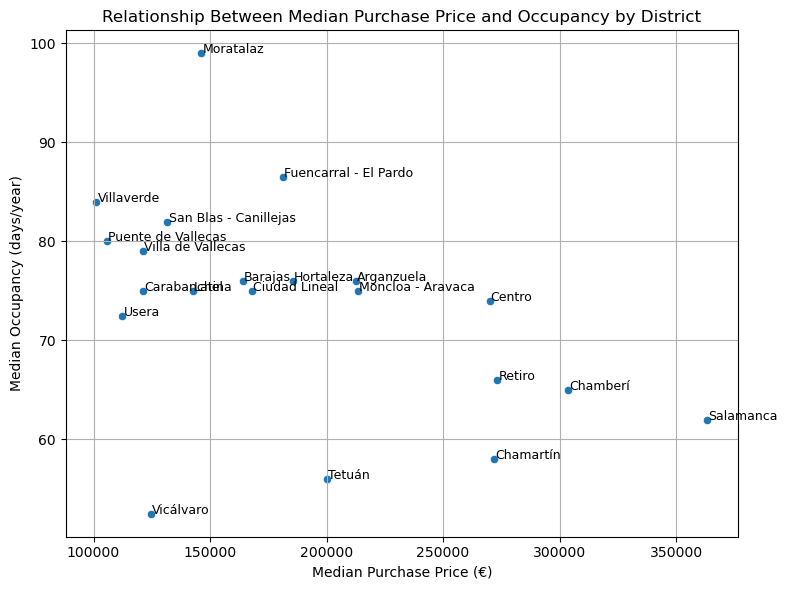

purchase_price  occupancy
purchase_price        1.000000  -0.459836
occupancy            -0.459836   1.000000

In [132]:
# Group by district and calculate median purchase price and median occupancy
price_occupancy_relation = df.groupby('district')[['purchase_price', 'occupancy']].median().reset_index()

# Plot scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=price_occupancy_relation, x='purchase_price', y='occupancy')

# Annotate points with district names
for i in range(price_occupancy_relation.shape[0]):
    plt.text(x=price_occupancy_relation.purchase_price[i]+500, 
             y=price_occupancy_relation.occupancy[i], 
             s=price_occupancy_relation.district[i], 
             fontsize=9)

plt.title('Relationship Between Median Purchase Price and Occupancy by District')
plt.xlabel('Median Purchase Price (€)')
plt.ylabel('Median Occupancy (days/year)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Check correlation
price_occupancy_relation.corr(numeric_only=True)

**💡 Insight 9: There is a moderately negative correlation (r = –0.46) between purchase price and occupancy. In general, more affordable districts such as Villaverde, Puente de Vallecas, and San Blas – Canillejas tend to achieve higher occupancy rates, while premium districts like Salamanca, Chamberí, and Chamartín show lower utilization. This suggests that lower-cost areas may offer better rental efficiency, especially for investors focused on maximizing usage and short-term yield.**

📌 **District-Level Strategic Notes**:

- **Tetuán**: Offers relatively high rental prices compared to purchase cost, but suffers from low occupancy. This suggests potential for yield *if* utilization can be improved — ideal for selective investment based on micro-location and property type.

- **Vicálvaro**: Despite being among the cheapest districts for acquisition, it performs poorly in both rental price and occupancy. With no clear compensating factor, it is likely to be excluded under most profitability-focused strategies.

- **San Blas – Canillejas**: Demonstrates high occupancy and rental price spikes driven by proximity to venues like IFEMA or the Wanda stadium. This makes it suitable for opportunistic, event-driven strategies but risky for investors seeking stable, year-round income.

#### Occupancy analysis

**What is the average occupancy? And by district? And by neighborhood?**

Overall occupancy (days/year):
count    24839.000000
mean        61.959499
std         36.541888
min          0.000000
25%         26.000000
50%         73.000000
75%        100.000000
max        100.000000
Name: occupancy, dtype: float64


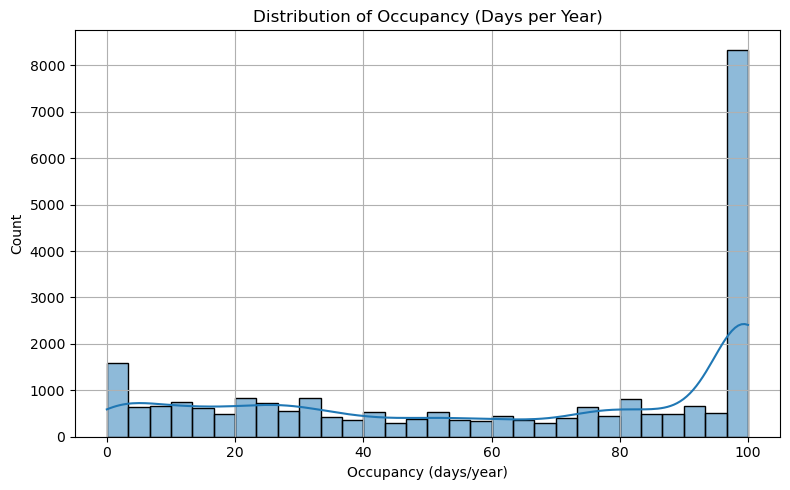

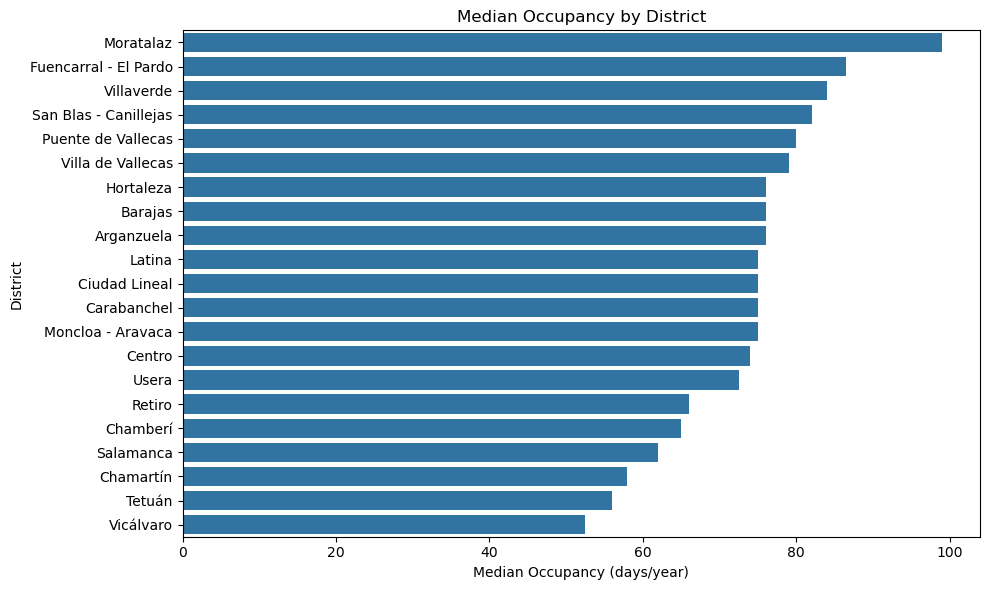

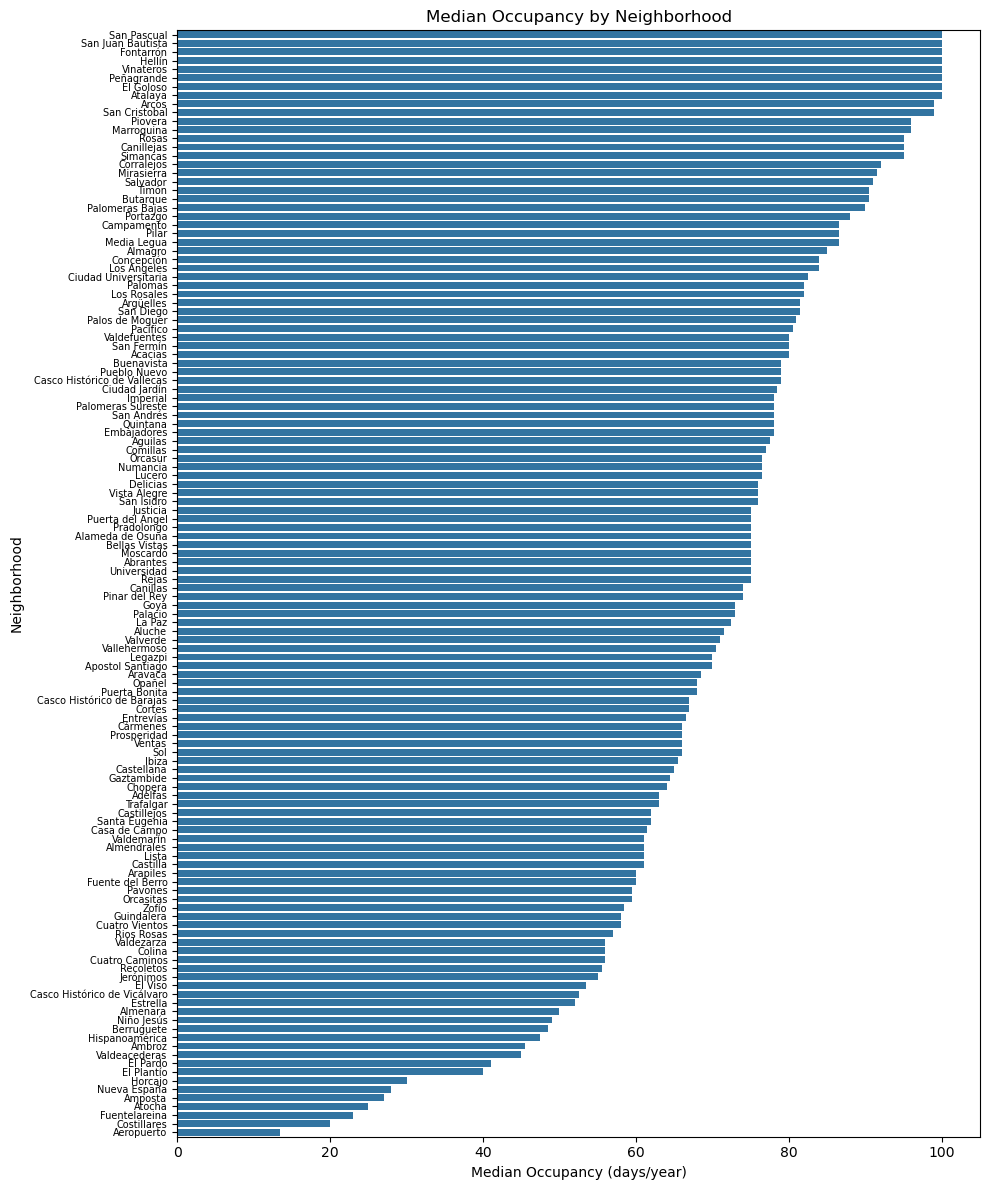

In [133]:
# General stats
print("Overall occupancy (days/year):")
print(df['occupancy'].describe())

# Histogram of overall occupancy distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['occupancy'], bins=30, kde=True)
plt.title('Distribution of Occupancy (Days per Year)')
plt.xlabel('Occupancy (days/year)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- Median Occupancy by District ----
occupancy_by_district = df.groupby('district')['occupancy'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=occupancy_by_district, x='occupancy', y='district')
plt.title('Median Occupancy by District')
plt.xlabel('Median Occupancy (days/year)')
plt.ylabel('District')
plt.tight_layout()
plt.show()

# ---- Median Occupancy by Neighborhood ----
occupancy_by_neigh = df.groupby('neighbourhood')['occupancy'].median().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,12))
sns.barplot(data=occupancy_by_neigh, x='occupancy', y='neighbourhood')
plt.title('Median Occupancy by Neighborhood')
plt.xlabel('Median Occupancy (days/year)')
plt.ylabel('Neighborhood')
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

**💡 Insight 10: Our occupancy variable, inferred as the percentage of the year a property is unavailable for booking (i.e., likely in use), reveals a dual market structure. A large portion of listings are rarely active (<10%), suggesting inactive or secondary-use properties, while a significant share operate close to 100% occupancy — indicating professional management or sustained mid-to-long-term demand. Districts like Moratalaz, Villaverde, and San Blas – Canillejas consistently show ≥85% occupancy, translating into highly efficient asset utilization. In contrast, premium areas like Salamanca and Chamartín exhibit lower occupancy rates despite high property values, raising questions about underutilized capital and the need for sharper yield management in top-tier zones.**

**What is the probability distribution of occupancy levels in each district?**

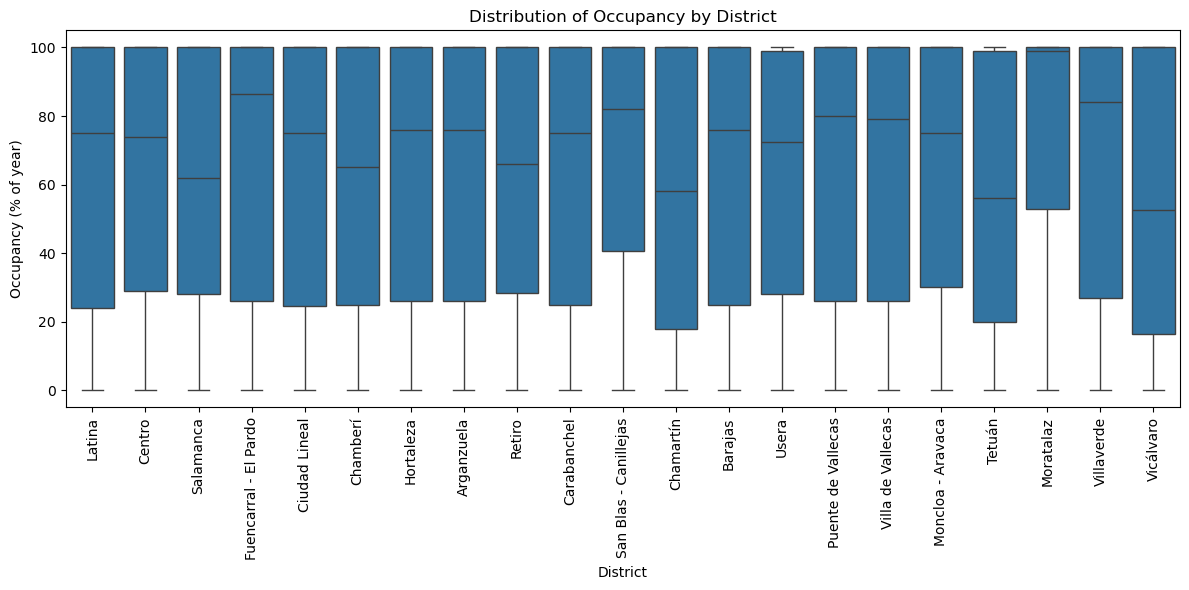

In [134]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='district', y='occupancy')
plt.title('Distribution of Occupancy by District')
plt.xlabel('District')
plt.ylabel('Occupancy (% of year)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**💡 Insight 11: Even in high-occupancy districts, listing performance varies dramatically — reinforcing the need for property-level optimization.  
Districts like Villaverde, Puente de Vallecas, or Moratalaz achieve high median occupancy, but their wide interquartile ranges reveal significant dispersion among listings.  
Premium areas like Salamanca or Chamberí show lower median occupancy and equally wide spreads.  
This suggests that while some units perform very well, many others underperform — regardless of district. Smart investors should dig deeper into listing-level factors (photos, reviews, price, host status) to drive consistent returns, rather than relying solely on location.**

**What is the ranking of districts and neighborhoods by occupancy?**

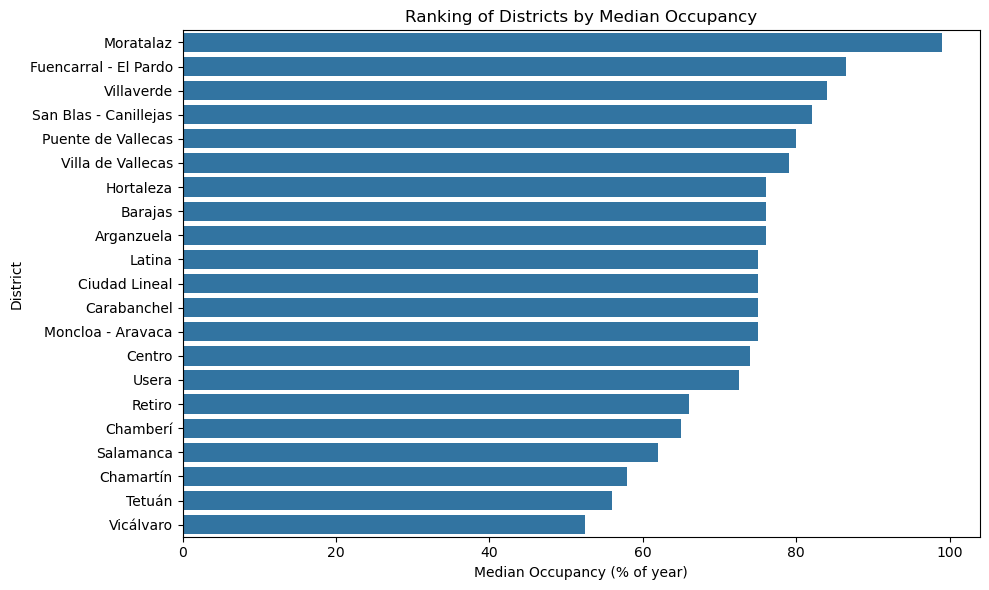

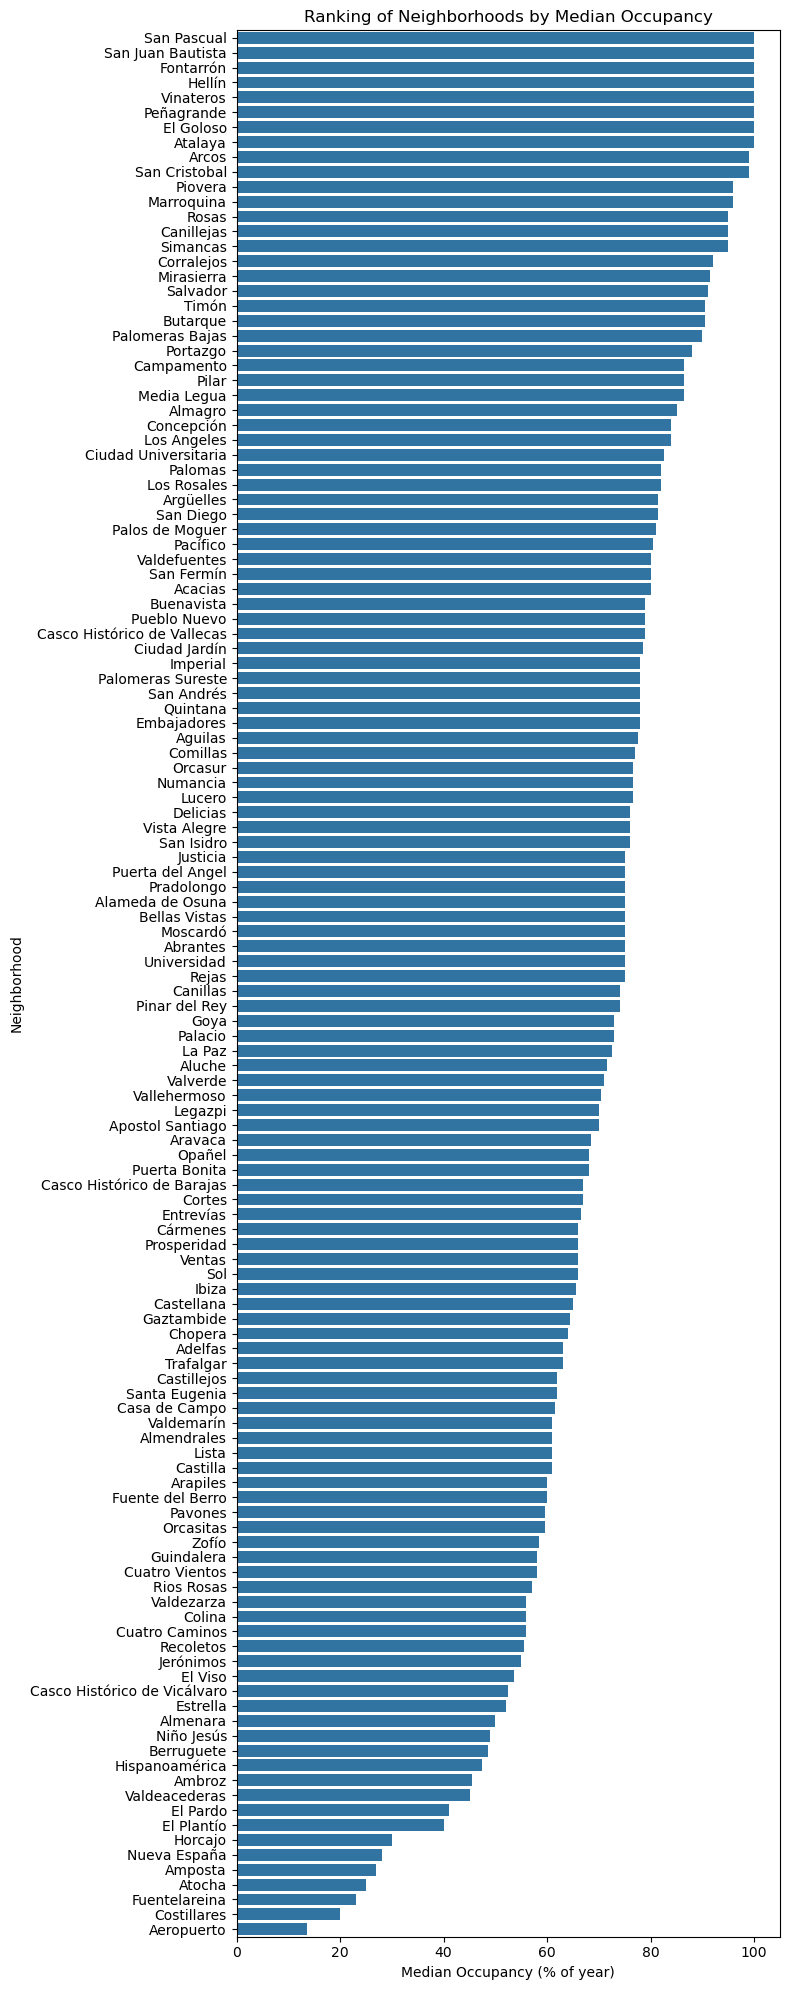

In [135]:
# Ranking by district
district_occupancy = df.groupby('district')['occupancy'].median().sort_values(ascending=False).reset_index()

# Plot for district
plt.figure(figsize=(10, 6))
sns.barplot(data=district_occupancy, x='occupancy', y='district')
plt.title('Ranking of Districts by Median Occupancy')
plt.xlabel('Median Occupancy (% of year)')
plt.ylabel('District')
plt.tight_layout()
plt.show()

# Ranking by neighborhood
neighborhood_occupancy = df.groupby('neighbourhood')['occupancy'].median().sort_values(ascending=False).reset_index()

# Plot for neighborhood
plt.figure(figsize=(8, 20))
sns.barplot(data=neighborhood_occupancy, x='occupancy', y='neighbourhood')
plt.title('Ranking of Neighborhoods by Median Occupancy')
plt.xlabel('Median Occupancy (% of year)')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

**💡 Insight 12: Peripheral districts outperform in occupancy — a demand opportunity beyond the city core**

Contrary to expectations, peripheral and less expensive districts such as **Moratalaz, Fuencarral – El Pardo, and Villaverde** top the ranking for **median occupancy** across Madrid, often exceeding 80–90% usage throughout the year. Meanwhile, traditionally premium zones like **Salamanca, Chamberí, and Chamartín** fall in the lower half of the list, with significantly lower occupancy levels despite their high property prices.

This suggests a **strong and consistent demand for rentals in outer districts**, possibly driven by affordability, longer stays, or better value-per-euro dynamics. For investors and operators, these areas may offer **more stable occupancy and less seasonal volatility**, translating into **higher utilization rates and better risk-adjusted returns**.

Neighborhood-level data confirms this trend, with top-performing areas such as **San Pascual, San Juan Bautista, and Fontarrón** (all outside the city center) reinforcing the idea that **occupancy efficiency is decoupled from traditional prestige or centrality** — and more aligned with real, unmet rental demand.

**What factors (besides location) influence occupancy?**

To answer this question, we can again build a mini data cube, since we’ve already discretized our analysis variables before.

In [136]:
# STEP 1: Define metrics and dimensions
metrics_occ = ['occupancy']
dimensions_occ = ['bedrooms_disc', 'accommodates_disc', 'beds_disc', 'number_of_reviews_disc', 'room_type']

minicube_occ = df[dimensions_occ + metrics_occ]
minicube_occ

bedrooms_disc accommodates_disc beds_disc number_of_reviews_disc  \
0            01_One               1–3       1–2                  12–72   
1            01_One               1–3       1–2                73–1080   
2            01_One               1–3       1–2                   1–11   
3            01_One               1–3       1–2                  12–72   
4            01_One               4–4       1–2                73–1080   
...             ...               ...       ...                    ...   
24834        01_One               1–3       1–2                   1–11   
24835        01_One               1–3       1–2                   1–11   
24836        01_One               1–3       1–2                   1–11   
24837        02_Two              5–16       3–3                   1–11   
24838        01_One               1–3       1–2                   1–11   

             room_type  occupancy  
0         Private room         36  
1      Entire home/apt        100  
2      Entire home/apt        100  
3      Entire home/apt        100  
4         Private room         18  
...                ...        ...  
24834  Entire home/apt          2  
24835  Entire home/apt          1  
24836  Entire home/apt        100  
24837  Entire home/apt          0  
24838  Entire home/apt         99  

[24839 rows x 6 columns]

In [137]:
# STEP 2: Convert dimensions into transactional format
minicube_occ = minicube_occ.melt(id_vars=['occupancy'])
minicube_occ

occupancy       variable            value
0              36  bedrooms_disc           01_One
1             100  bedrooms_disc           01_One
2             100  bedrooms_disc           01_One
3             100  bedrooms_disc           01_One
4              18  bedrooms_disc           01_One
...           ...            ...              ...
124190          2      room_type  Entire home/apt
124191          1      room_type  Entire home/apt
124192        100      room_type  Entire home/apt
124193          0      room_type  Entire home/apt
124194         99      room_type  Entire home/apt

[124195 rows x 3 columns]

In [138]:
# STEP 3: Aggregate median occupancy by variable and value
minicube_occ = minicube_occ.groupby(['variable', 'value'])[['occupancy']].median()
minicube_occ

occupancy
variable               value                     
accommodates_disc      1–3                   78.0
                       4–4                   63.0
                       5–16                  61.0
bedrooms_disc          01_One                75.0
                       02_Two                67.0
                       03_Three              61.0
                       04_Four or more       66.0
beds_disc              1–2                   76.0
                       3–3                   65.0
                       4–25                  50.0
number_of_reviews_disc 12–72                 66.0
                       1–11                  75.0
                       73–1080               75.0
room_type              Entire home/apt       64.0
                       Private room          86.0
                       Shared room           30.0

Analyzing the Mini Cube Variable by Variable.

In [139]:
minicube_occ.loc['bedrooms_disc']

occupancy
value                     
01_One                75.0
02_Two                67.0
03_Three              61.0
04_Four or more       66.0

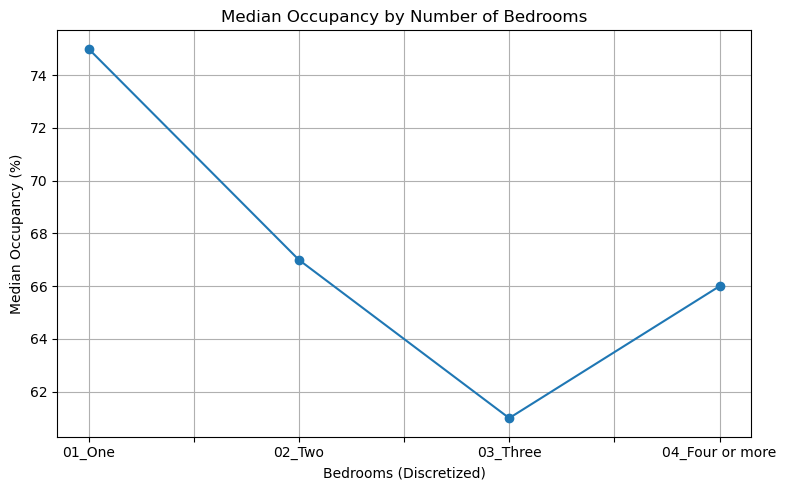

In [140]:
plt.figure(figsize=(8,5))
minicube_occ.loc['bedrooms_disc'].occupancy.plot(kind='line', marker='o')
plt.title('Median Occupancy by Number of Bedrooms')
plt.xlabel('Bedrooms (Discretized)')
plt.ylabel('Median Occupancy (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**💡 Insight 13: 1-bedroom apartments maximize occupancy efficiency**

Median occupancy drops steadily from 1 to 3 bedrooms, with a slight rebound for larger units.  
**1-bedroom units are the most efficient**, reaching 75% occupancy — likely due to their appeal to solo travelers and couples.  
This suggests a strategic opportunity for investors to focus on **smaller units with consistently high utilization**.

In [141]:
minicube_occ.loc['beds_disc']

occupancy
value           
1–2         76.0
3–3         65.0
4–25        50.0

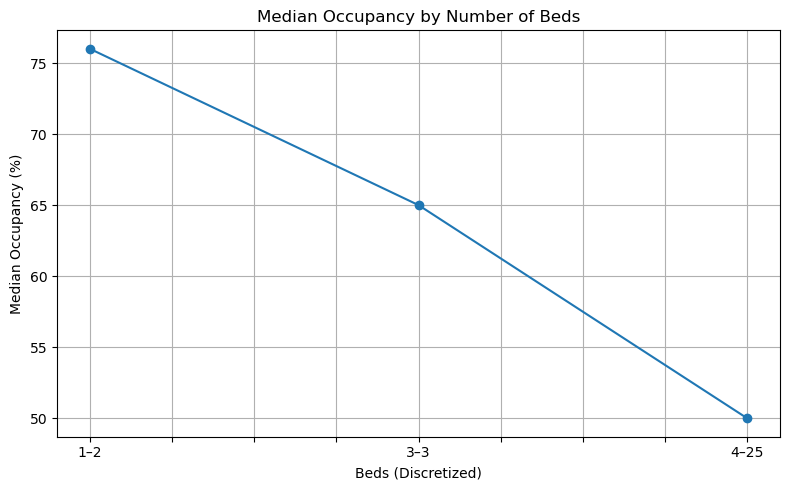

In [142]:
plt.figure(figsize=(8,5))
minicube_occ.loc['beds_disc'].occupancy.plot(kind='line', marker='o')
plt.title('Median Occupancy by Number of Beds')
plt.xlabel('Beds (Discretized)')
plt.ylabel('Median Occupancy (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**💡 Insight 14: Less is more — units with fewer beds achieve significantly higher occupancy**

Listings with **1–2 beds** show the **highest median occupancy**, consistently exceeding **75%**. In contrast, properties with **4 or more beds** see a **sharp decline**, dropping below **55%**.

This suggests that **increasing bed count does not necessarily translate into higher utilization** — in fact, it may **discourage bookings** if it compromises comfort, layout, or pricing flexibility. Smaller units appear to align better with **core demand segments** like couples or solo travelers, which dominate short-term rental markets in urban areas like Madrid.

For operators, this points to a clear strategy: **optimize for comfort, not capacity**, as overfitting space can lead to underperformance in occupancy.

Let’s take a look again, for example, at one-bedroom apartments:

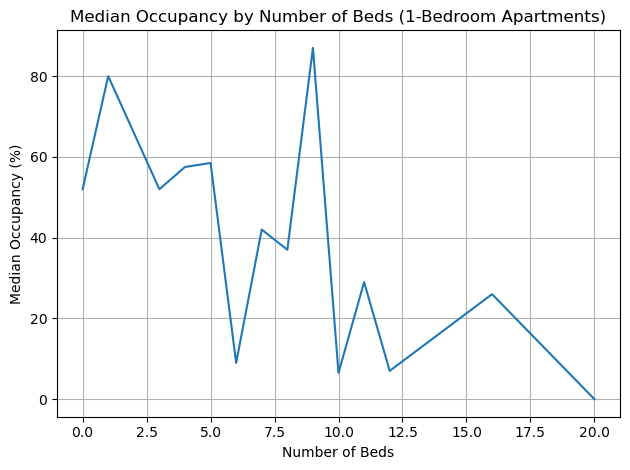

In [143]:
df[df.bedrooms == 1].groupby('beds')['occupancy'].median().plot(kind='line')
plt.title('Median Occupancy by Number of Beds (1-Bedroom Apartments)')
plt.xlabel('Number of Beds')
plt.ylabel('Median Occupancy (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**💡 Insight 15: Overfitting beds kills occupancy — more beds in 1-bedroom apartments lead to lower utilization**

In 1-bedroom units, adding more than 2–3 beds results in a **clear and erratic drop in occupancy**, with many listings falling below 30%, and some nearing 0%.

This suggests that **cramming extra beds into small units backfires**, likely due to discomfort, poor layout, or misalignment with guest expectations. While some hosts may attempt to increase capacity to boost revenue, this strategy seems counterproductive from an occupancy standpoint.

For hosts and investors, the takeaway is clear: **optimize for comfort, not maximum capacity**. In urban markets like Madrid, guests prioritize livability over raw bed count — and overcrowded listings tend to stay empty.

Now let’s analyze based on the number of guests accepted

In [144]:
minicube_occ.loc['accommodates_disc']

occupancy
value           
1–3         78.0
4–4         63.0
5–16        61.0

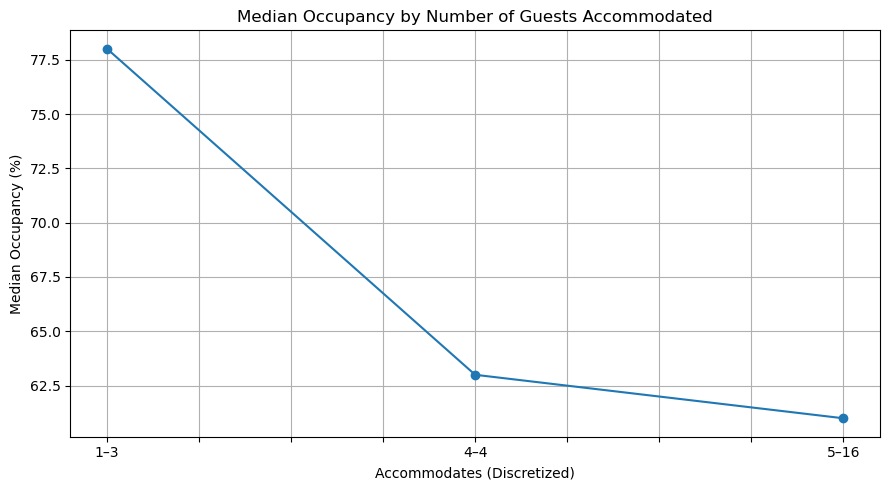

In [145]:
plt.figure(figsize=(9, 5))
minicube_occ.loc['accommodates_disc'].occupancy.plot(kind='line', marker='o')
plt.title('Median Occupancy by Number of Guests Accommodated')
plt.xlabel('Accommodates (Discretized)')
plt.ylabel('Median Occupancy (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**💡 Insight 16: Focus on 1–3 guests to maximize occupancy**

Units designed for **1–3 guests** consistently achieve the **highest occupancy rates (~78%)**, while larger capacities (4+) experience a significant drop, falling below **62%**.

👉 For most operators, **smaller units align better with market demand** (couples, solo travelers) and deliver stronger utilization. Expanding guest capacity beyond 3 may lead to diminishing returns unless you target group bookings explicitly.

Finally, let’s analyze the variable we created for proximity to a point of interest, to see if it has any effect on the occupancy of the apartments.

Again, in a real-world situation, we would have created many such variables and repeated the analysis with all of them.

In this case, since we’ve built the distance to Puerta del Sol, we’ll evaluate only the districts for which this might be relevant—i.e., the most central ones (we've already done this when creating our variable 'selection').

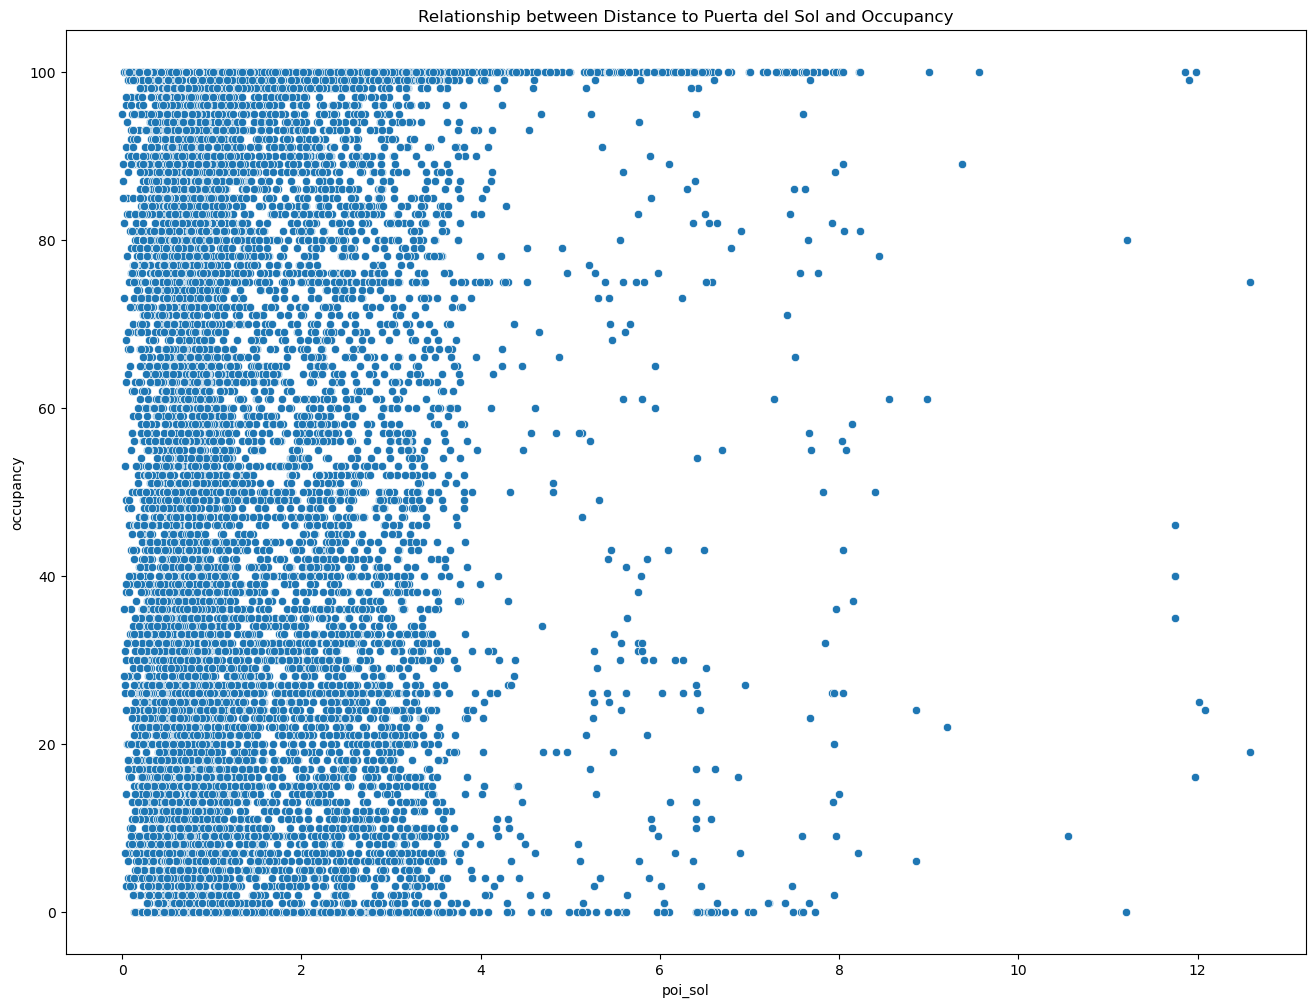

In [146]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df[df.district.isin(selection)], x='poi_sol', y='occupancy')
plt.title('Relationship between Distance to Puerta del Sol and Occupancy')
plt.show()

There isn’t a direct relationship between the distance to Puerta del Sol and occupancy.

**💡 Insight 17: Proximity to Puerta del Sol does not guarantee higher occupancy**

While centrality is often seen as a driver of demand, the data shows **no strong correlation between distance to Puerta del Sol and occupancy levels**.

This suggests that **other factors—such as amenities, comfort, or pricing—may play a more decisive role** in booking behavior than sheer proximity to iconic landmarks.

👉 Location matters, but not in isolation. A well-located unit still needs to meet guest expectations in value and experience to perform well in occupancy.

Now let’s analyze based on the number of reviews

In [147]:
minicube_occ.loc['number_of_reviews_disc']

occupancy
value             
12–72         66.0
1–11          75.0
73–1080       75.0

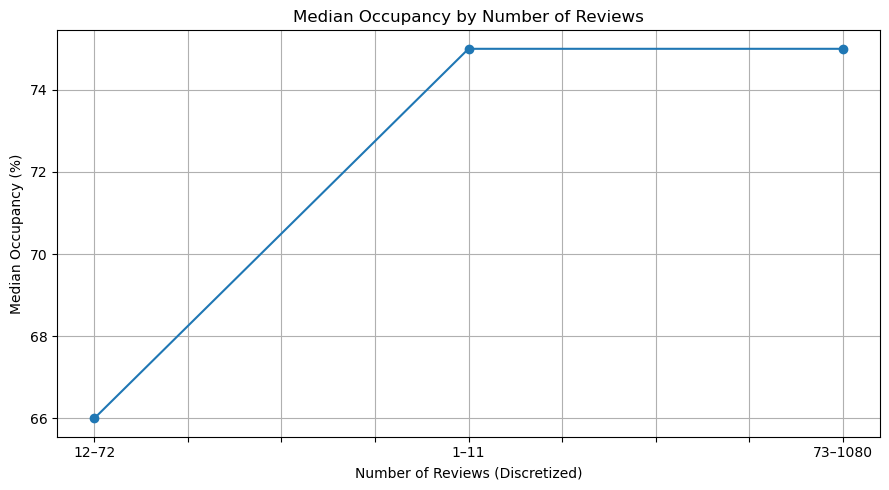

In [148]:
plt.figure(figsize=(9, 5))
minicube_occ.loc['number_of_reviews_disc'].occupancy.plot(kind='line', marker='o')
plt.title('Median Occupancy by Number of Reviews')
plt.xlabel('Number of Reviews (Discretized)')
plt.ylabel('Median Occupancy (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**💡 Insight 18: Reviews alone don’t guarantee higher occupancy**

Although listings with **1–11 reviews** and **73+ reviews** have the **highest median occupancy (~75%)**, those with **12–72 reviews** show a drop (~66%).  
This pattern suggests that **early or highly-reviewed listings** benefit from either novelty or strong reputational pull, while mid-range listings may struggle to stand out in a crowded market.

👉 Operators should focus on either building strong traction early or maintaining a consistent review strategy to stay attractive over time.

And finally, let’s analyze based on the room type

In [149]:
minicube_occ.loc['room_type']

occupancy
value                     
Entire home/apt       64.0
Private room          86.0
Shared room           30.0

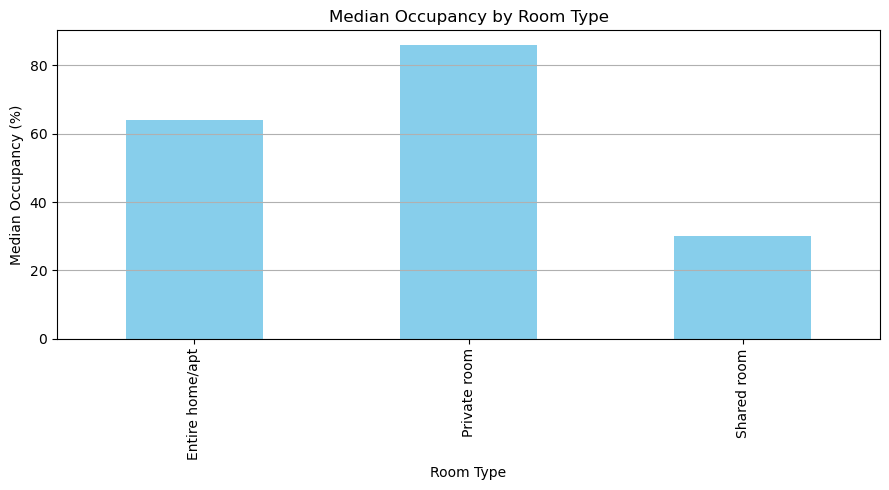

In [150]:
plt.figure(figsize=(9, 5))
minicube_occ.loc['room_type'].occupancy.plot(kind='bar', color='skyblue')
plt.title('Median Occupancy by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Median Occupancy (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**💡 Insight 19: Private rooms outperform entire apartments in occupancy**

**Private rooms** achieve a **median occupancy over 85%**, significantly outperforming **entire homes/apartments (~64%)** and especially **shared rooms (~30%)**.

This reflects strong demand from **budget-conscious travelers** or **solo guests**, especially in dense urban centers like Madrid.  
While entire units may yield higher revenue per stay, **private rooms offer greater utilization**—a crucial factor in maximizing total monthly returns.

👉 For high-occupancy strategies, private room offerings may provide a more consistent revenue stream with lower vacancy risk.

**What is the relationship between property size and occupancy level?**

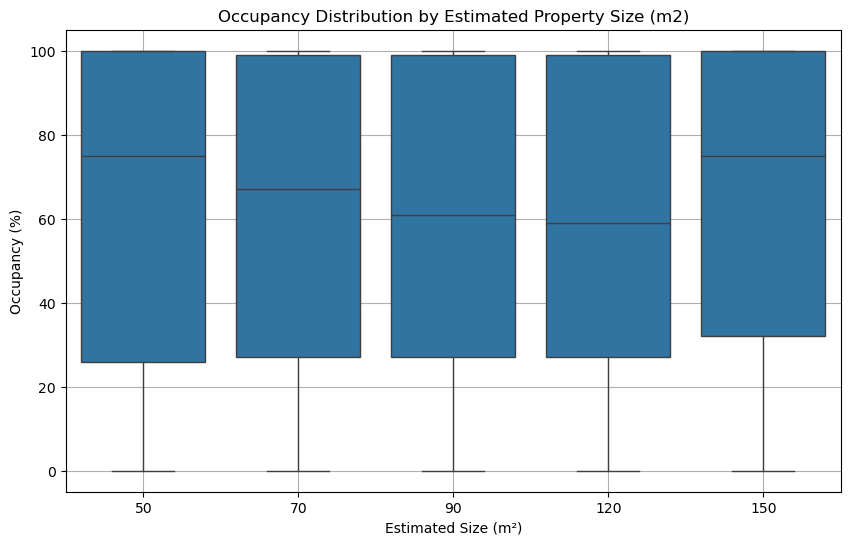

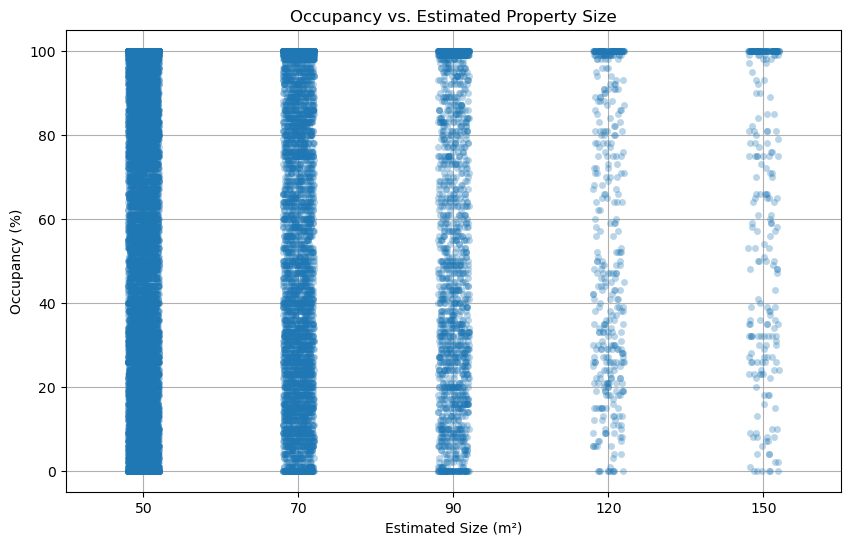

In [151]:
# Boxplot to visualize the distribution of occupancy by estimated size (m²)
plt.figure(figsize=(10, 6))
sns.boxplot(x='m2', y='occupancy', data=df)
plt.title('Occupancy Distribution by Estimated Property Size (m2)')
plt.xlabel('Estimated Size (m²)')
plt.ylabel('Occupancy (%)')
plt.grid(True)
plt.show()

# Scatterplot to observe the overall trend
plt.figure(figsize=(10, 6))
sns.stripplot(x='m2', y='occupancy', data=df, jitter=True, alpha=0.3)
plt.title('Occupancy vs. Estimated Property Size')
plt.xlabel('Estimated Size (m²)')
plt.ylabel('Occupancy (%)')
plt.grid(True)
plt.show()

**💡 Insight 20: No clear linear relationship between property size and occupancy**

Using the estimated property size (based on number of bedrooms), we examined whether larger properties tend to have higher occupancy.

📊 Both the boxplot and scatter plot show that **there is no clear linear relationship between estimated size and occupancy**.

- Smaller apartments (~50 m²) exhibit a slightly higher median occupancy.
- However, occupancy distributions across all sizes are wide and overlapping.
- This suggests that **factors other than property size**, such as location, price, amenities, or room type, might be more influential in determining occupancy rates.

👉 **Conclusion:** While property size is a relevant feature, it does not appear to be a strong driver of occupancy on its own.

**How does competition (number of available listings per neighborhood) affect occupancy?**

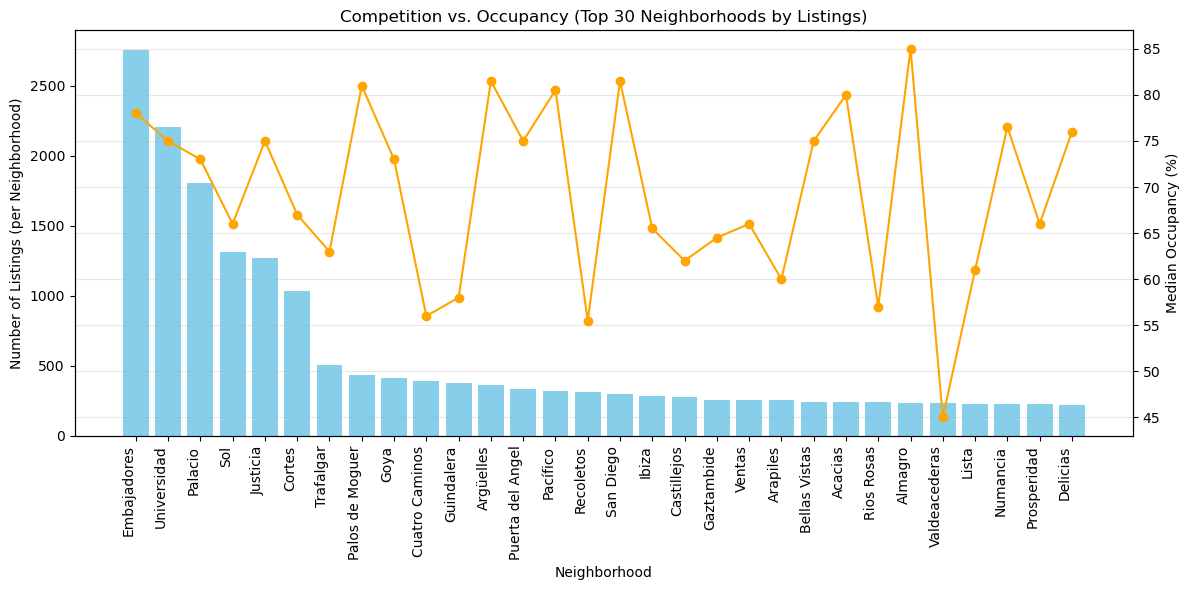

In [152]:
# Group by neighborhood: number of listings and median occupancy
competition_occupancy = df.groupby('neighbourhood').agg(
    listings_count=('id', 'count'),
    median_occupancy=('occupancy', 'median')
).reset_index()

# Filter top 30 neighborhoods by number of listings
top_competition = competition_occupancy.sort_values(by='listings_count', ascending=False).head(30)

# Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart: number of listings
ax1.bar(top_competition['neighbourhood'], top_competition['listings_count'], color='skyblue')
ax1.set_ylabel('Number of Listings (per Neighborhood)')
ax1.set_xlabel('Neighborhood')
ax1.set_xticks(range(len(top_competition['neighbourhood'])))
ax1.set_xticklabels(top_competition['neighbourhood'], rotation=90, ha='right')
ax1.set_title('Competition vs. Occupancy (Top 30 Neighborhoods by Listings)')

# Line chart: median occupancy
ax2 = ax1.twinx()
ax2.plot(top_competition['neighbourhood'], top_competition['median_occupancy'], color='orange', marker='o')
ax2.set_ylabel('Median Occupancy (%)')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

To explore this, we analyzed the **top 30 neighborhoods** by number of listings as a proxy for competition and compared them against their **median occupancy**.

📊 The chart shows that:

- Some neighborhoods like **Universidad**, **Justicia**, or **Pacifico** combine **high competition with high occupancy**, likely due to location, amenities, or room type preferences.
- Others like **Sol**, **Embajadores**, or **Valdeacederas** exhibit **high listing volume but moderate or low occupancy**, indicating possible saturation or lower relative appeal.
- Conversely, some mid-range competition neighborhoods such as **Ríos Rosas** and **Acacias** perform strongly in terms of occupancy.

💡 **Conclusion:**  
There is **no clear linear relationship** between the number of listings and occupancy. High competition **does not automatically imply lower occupancy**. Strategic factors like **location appeal**, **property characteristics**, and **market positioning** may outweigh pure listing volume when it comes to maintaining high occupancy.

However, since this exploration is based on absolute listing counts, it would be more informative to analyze it in relative terms, as follows:

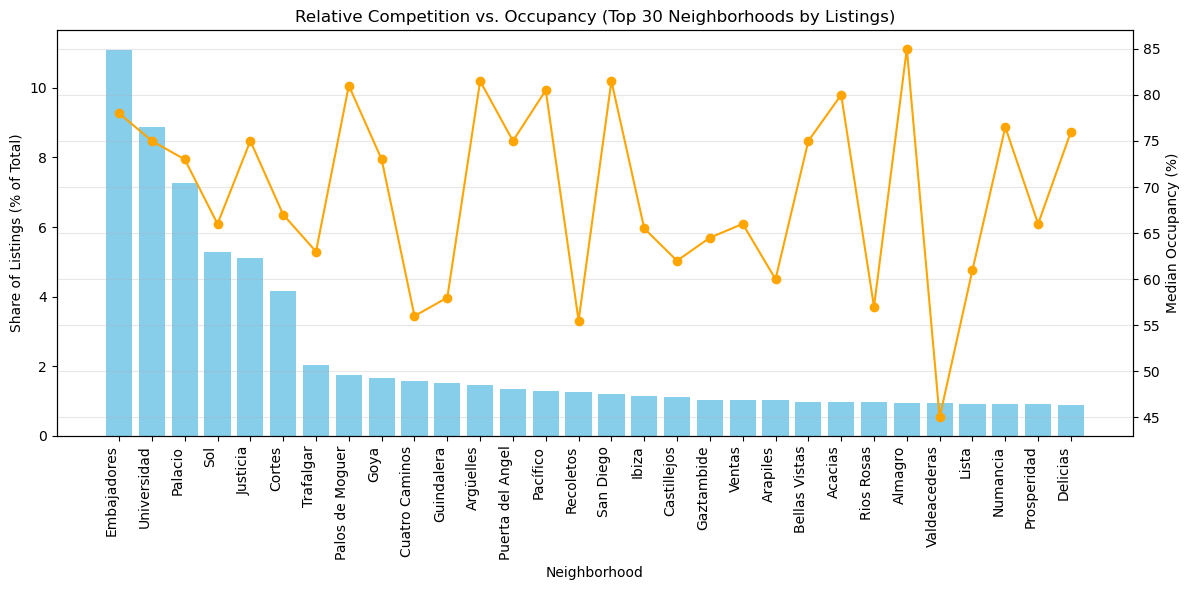

In [153]:
# Group by neighborhood: percentage of listings and median occupancy
competition_occupancy = df.groupby('neighbourhood').agg(
    listings_count=('id', 'count'),
    median_occupancy=('occupancy', 'median')
).reset_index()

# Calculate relative competition (% of total listings)
total_listings = competition_occupancy['listings_count'].sum()
competition_occupancy['relative_competition'] = 100 * competition_occupancy['listings_count'] / total_listings

# Filter top 30 neighborhoods by number of listings
top_competition = competition_occupancy.sort_values(by='listings_count', ascending=False).head(30)

# Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart: relative competition (% of total listings)
ax1.bar(top_competition['neighbourhood'], top_competition['relative_competition'], color='skyblue')
ax1.set_ylabel('Share of Listings (% of Total)')
ax1.set_xlabel('Neighborhood')
ax1.set_xticks(range(len(top_competition['neighbourhood'])))
ax1.set_xticklabels(top_competition['neighbourhood'], rotation=90, ha='right')
ax1.set_title('Relative Competition vs. Occupancy (Top 30 Neighborhoods by Listings)')

# Line chart: median occupancy
ax2 = ax1.twinx()
ax2.plot(top_competition['neighbourhood'], top_competition['median_occupancy'], color='orange', marker='o')
ax2.set_ylabel('Median Occupancy (%)')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

We reach the same conclusion as with the absolute approach.

💡 **Conclusion:**  
There is **no clear linear relationship** between the number of listings and occupancy. High competition **does not automatically imply lower occupancy**. Strategic factors like **location appeal**, **property characteristics**, and **market positioning** may outweigh pure listing volume when it comes to maintaining high occupancy.

**How does competition (number of available listings per district) affect occupancy?**

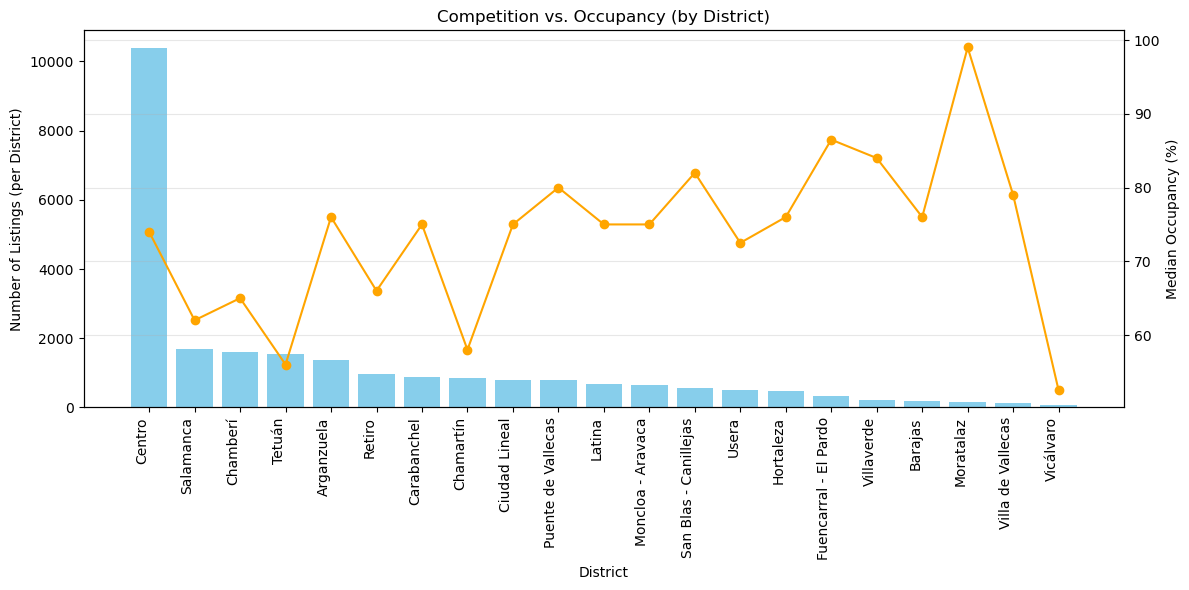

In [154]:
# Group by district: number of listings and median occupancy
competition_occupancy_district = df.groupby('district').agg(
    listings_count=('id', 'count'),
    median_occupancy=('occupancy', 'median')
).sort_values('listings_count', ascending=False).reset_index()

# Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart: number of listings
ax1.bar(competition_occupancy_district['district'], competition_occupancy_district['listings_count'], color='skyblue')
ax1.set_ylabel('Number of Listings (per District)')
ax1.set_xlabel('District')
ax1.set_xticks(range(len(competition_occupancy_district['district'])))
ax1.set_xticklabels(competition_occupancy_district['district'], rotation=90, ha='right')
ax1.set_title('Competition vs. Occupancy (by District)')

# Line chart: median occupancy
ax2 = ax1.twinx()
ax2.plot(competition_occupancy_district['district'], competition_occupancy_district['median_occupancy'], color='orange', marker='o')
ax2.set_ylabel('Median Occupancy (%)')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

To explore this, we analyzed the **number of listings per district** (proxy for competition) and compared it with the **median occupancy** rate in each district.

📊 The chart reveals several insights:

- **Centro**, with the highest number of listings by far, maintains a **median occupancy above 70%**, indicating **strong demand** that absorbs the high supply.
- Districts like **Salamanca** and **Chamartín** show **moderate to high competition** but **lower occupancy**, suggesting that **supply might outpace demand** or that units are less attractive to guests.
- On the other hand, **Moratalaz** and **Fuencarral - El Pardo** have **low listing volumes** but **very high occupancy**, hinting at **niche, underserved markets**.
- The relationship is clearly **non-linear**: high competition does not necessarily imply lower occupancy, and low supply does not guarantee high demand.

💡 **Conclusion:** While competition (measured by the number of listings) is an important factor, **occupancy is heavily influenced by district-specific factors**, such as location appeal, pricing strategy, and unit quality. Some highly competitive districts thrive due to strong demand, while others with low competition struggle to attract guests.

However, since this exploration is based on absolute listing counts, it would be more informative to analyze it in relative terms, as follows:

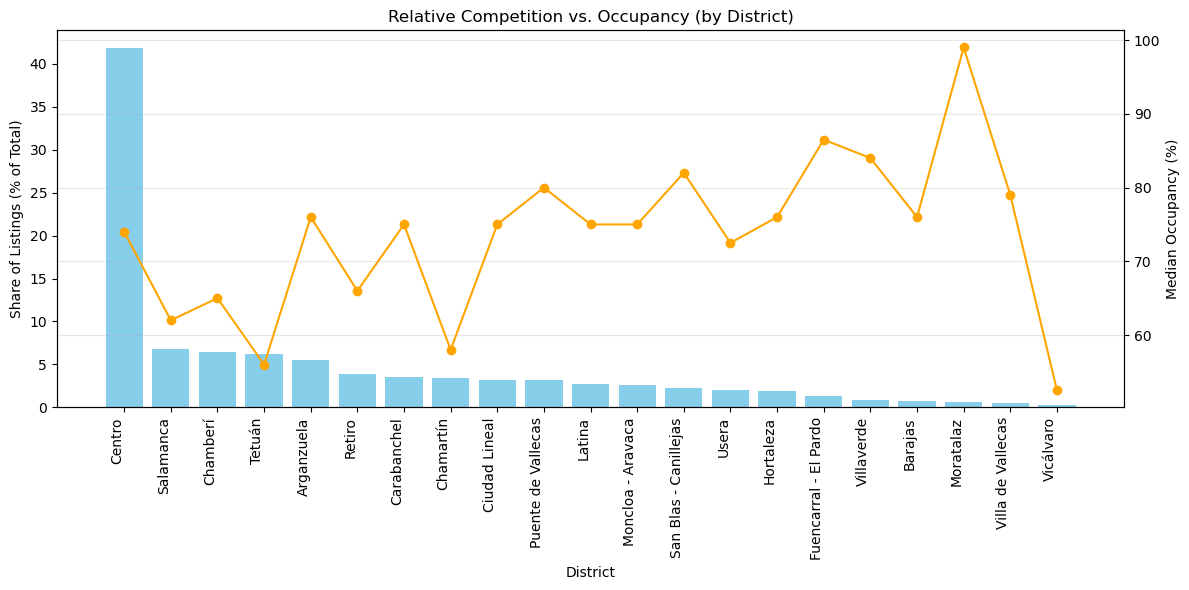

In [155]:
# Group by district: number of listings and median occupancy
competition_occupancy_district = df.groupby('district').agg(
    listings_count=('id', 'count'),
    median_occupancy=('occupancy', 'median')
).reset_index()

# Calculate relative share of listings
total_listings = competition_occupancy_district['listings_count'].sum()
competition_occupancy_district['relative_share'] = (
    competition_occupancy_district['listings_count'] / total_listings * 100
)

# Sort by relative competition
competition_occupancy_district = competition_occupancy_district.sort_values(
    'relative_share', ascending=False
).reset_index(drop=True)

# Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart: relative competition (% of total)
ax1.bar(competition_occupancy_district['district'],
        competition_occupancy_district['relative_share'],
        color='skyblue')
ax1.set_ylabel('Share of Listings (% of Total)')
ax1.set_xlabel('District')
ax1.set_xticks(range(len(competition_occupancy_district['district'])))
ax1.set_xticklabels(competition_occupancy_district['district'], rotation=90, ha='right')
ax1.set_title('Relative Competition vs. Occupancy (by District)')

# Line chart: median occupancy
ax2 = ax1.twinx()
ax2.plot(competition_occupancy_district['district'],
         competition_occupancy_district['median_occupancy'],
         color='orange', marker='o')
ax2.set_ylabel('Median Occupancy (%)')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The findings are consistent with those from the absolute approach.

💡 **Conclusion:** While competition (measured by the number of listings) is an important factor, **occupancy is heavily influenced by district-specific factors**, such as location appeal, pricing strategy, and unit quality. Some highly competitive districts like Centro and Arganzuela thrive due to strong demand that absorbs supply. Meanwhile, low-competition areas such as Vicálvaro or Chamartín struggle with relatively low occupancy, suggesting lower guest appeal despite little competition.

#### Geographic analysis on a map

Geographic analysis is a discipline in itself and quite complex.

However, fortunately, there is a Python alternative that makes it very simple and covers everything we need in a practical way for our purposes.

It’s a package called **Folium**, which is a Python implementation of the **Leaflet** technology.

All we need to use it are the **latitude and longitude coordinates**.

**Installation:**

conda install -c conda-forge folium

**Import:**

import folium

**Documentation:**

https://python-visualization.github.io/folium/index.html

In [156]:
import folium

With Folium, there's no need to install maps — they come included by default.  
To initialize a map, we simply provide starting coordinates and optionally a zoom level.

We’ll use the **coordinates of Puerta del Sol**, which we already had.

In [157]:
folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

For example, let’s visually analyze the insight about the **San Blas** district.

In [158]:
data = df[df.district == 'San Blas - Canillejas'].copy()

To display markers for all the listings, we need to create a loop to add them to the map one by one.

In [159]:
map = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for flat in range(0,len(data)):
   folium.Marker(
      location = [data.iloc[flat]['latitude'], data.iloc[flat]['longitude']],
      popup = data.iloc[flat]['total_price'],
   ).add_to(map)

map

This representation works, but we have to **click on each point** to see the price.

It would be easier if we had a **color-coded system** that visually indicates the price range.

To achieve this, we’ll create a **new discretized variable** and change the marker to a **colored circle**.

In [160]:
# Dracula Light-inspired color palette
dracula_colors = ['#f1fa8c',  # soft yellow
                  '#ff79c6',  # pink
                  '#8be9fd',  # cyan
                  '#bd93f9']  # purple

# Reassign colors based on total_price quartiles
data['total_price_disc'] = pd.qcut(data['total_price'], q=[0, .25, .5, .75, 1.],
                                   labels=dracula_colors)

In [161]:
map = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for flat in range(len(data)):
    folium.CircleMarker(
        location=[data.iloc[flat]['latitude'], data.iloc[flat]['longitude']],
        popup=f"Price: €{data.iloc[flat]['total_price']}",
        fill=True,
        color=data.iloc[flat]['total_price_disc'],
        fill_opacity=0.9,
        radius=5
    ).add_to(map)

map

**💡 Insight 21: There is still a high concentration of yellow and pink points (low- and mid-priced listings), suggesting the area has not yet fully capitalized on the pricing potential of sports events.**

The color distribution shows a strong presence of lower-priced listings (yellow, pink, and cyan), but also a visible cluster of premium-priced units (purple) around the stadium. This indicates that while many hosts are still operating at moderate price levels, others are successfully capturing peak demand value — pointing to an ongoing price differentiation trend and untapped potential for further revenue optimization through event-driven pricing strategies.